In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from testCases_v4 import *
from testCases import *
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/chat_data_nn.csv')

In [3]:
df.iloc[:,1:-1]

,Average of interaction_time_in_minutes,Average of resolution_time_in_minutes,Average of handle_time_in_minutes,Sum of message_count,Sum of avg_message_count_in_exchange,Sum of exchange_count,Gap between chat initiation,Last Chat Duration,Partial Chat Overlap?,Duration of break before chat,...,requester_requester90,requester_requester91,requester_requester92,requester_requester93,requester_requester94,requester_requester95,requester_requester96,requester_requester97,requester_requester98,requester_requester99
0,11.5333,13.7166,1.8500,4,2.000000,2,7.300000,3.700000,0,3.600000,...,0,0,0,0,0,0,0,0,0,0
1,7.6000,13.8166,3.0000,2,1.000000,2,14.283333,1.466667,0,12.816667,...,0,0,0,0,0,0,0,0,0,0
2,5.2500,7.8500,4.7666,3,1.500000,2,14.433333,1.816667,0,18.925000,...,0,0,0,0,0,0,0,0,0,0
3,2.2500,7.6333,1.4333,4,1.000000,4,109.066667,2.250000,0,160.225000,...,0,0,0,0,0,0,0,0,0,0
4,8.2166,14.3500,6.3333,3,1.500000,2,8.633333,1.033333,0,11.400000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,17.3833,22.4166,17.2166,13,1.444444,9,7.250000,4.300000,0,4.425000,...,0,0,0,0,0,0,0,0,0,0
1867,10.6166,11.2333,10.5333,11,1.571429,7,12.883333,17.100000,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
1868,1.6833,10.8500,0.4333,5,1.666667,3,15.950000,0.600000,0,23.025000,...,0,0,0,0,0,0,0,0,0,0
1869,21.1166,21.1833,20.4500,7,1.750000,4,13.583333,9.966667,0,5.425000,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = np.array(df.iloc[:,1:-1], dtype=np.float64)

In [5]:
y = np.array(df.iloc[:,-1],dtype=np.float64)

In [6]:
print(X.shape)
print(y.shape)

(1871, 223)
(1871,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# from sklearn.preprocessing import StandardScaler
# #Scaling across all variables


# scaling = StandardScaler().fit(X_train)
# X_train = scaling.transform(X_train)
# X_test = scaling.transform(X_test)


In [9]:
def load_dataset():
    train_X = X_train.T
    train_Y = y_train.reshape(1,-1)
    test_X = X_test.T
    test_Y = y_test.reshape(1,-1)
    return train_X,train_Y, test_X, test_Y

In [67]:
train_X,train_Y,test_X,test_Y = load_dataset()

In [11]:
# def load_dataset():
#     np.random.seed(3)
#     train_X,train_Y = sklearn.datasets.make_moons(n_samples=300,noise=.2)
#     plt.scatter(train_X[:,0],train_X[:,1],c=train_Y, s=40, cmap = plt.cm.Spectral)
#     train_X = train_X.T
#     train_Y = train_Y.reshape(1,-1)
#     return train_X,train_Y
# train_X,train_Y = load_dataset()

In [12]:
#He initialisation
def initialise_params_deep(layers_dims):
    L = len(layers_dims)
    params = {}
    np.random.seed(3)
    for l in range(1,L):
        #He initialisation to prevent exploding and vanishing gradients due to weights >1 or <1 in deeper networks
        params['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])  #*0.01
        params['b'+str(l)] = np.zeros((layers_dims[l],1))
        
        assert(params['W'+str(l)].shape==(layers_dims[l],layers_dims[l-1]))
        assert(params['b'+str(l)].shape==(layers_dims[l],1))
        
    
    return params

In [13]:
# Forward propagation, single instance
def linear_forward(A_prev,W,b):
    Z = np.dot(W, A_prev)+b
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))
    linear_cache = (A_prev,W,b)
    return Z,linear_cache

In [14]:
# Forward propagation, single instance, with dropout regularisation. Dropout = deactivate some nodes randomly to prevent
# over-fitting
def linear_forward_with_dropout(A_prev,W,b,keep_prob):
    Z = np.dot(W, A_prev)+b
    assert(Z.shape==(W.shape[0],A_prev.shape[1]))
    
    D = np.random.rand(Z.shape[0],Z.shape[1])
    D = D < keep_prob
    
    linear_cache = (A_prev,W,b,D)
    #print(Z.shape)
    return Z,linear_cache

In [15]:
# Use Sigmoid or Relu Activation functions. Relu for hidden layer units and Sigmoid for output layer for binary
# classification. Softmax for multi-class.
def linear_activation_forward(A_prev,W,b,activation):
    
    Z, linear_cache = linear_forward(A_prev,W,b)
    
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
    if activation == 'relu':
        A,activation_cache = relu(Z)
        
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
        
    cache = (linear_cache,activation_cache)
    
    return A, cache

In [16]:
# Same as above but for dropout
def linear_activation_forward_with_dropout(A_prev,W,b,activation,keep_prob):
    
    
    Z, linear_cache = linear_forward_with_dropout(A_prev,W,b,keep_prob)
    A_prev,W,b,D = linear_cache
    
    if activation == 'sigmoid':
        A, activation_cache = sigmoid(Z)
    if activation == 'relu':
        A,activation_cache = relu(Z)
        
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
    
    cache = (linear_cache,activation_cache)

    #print('A shape: {}'.format(str(A.shape)))
    #print('D shape: {}'.format(str(D.shape)))
    A = np.multiply(A,D)
    #print(A)
    A = A/keep_prob
    #print('THIS IS ONE PASS for A --------------------------------')
    #print(A)
    #print(A.shape)
    return A, cache

In [17]:
# Sigmoid Activation
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    Z = np.float64(Z)
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [18]:
# ReLU Activation
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [19]:
# Adapt forward propagation for multiple layers in a deep network
def L_model_forward(X, params):
    L = len(params)//2
    caches = []
    A = X
    
    for l in range(1,L):
        A, cache = linear_activation_forward(A,params['W'+str(l)],params['b'+str(l)],activation='relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A,params['W'+str(L)],params['b'+str(L)],activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape==(1,X.shape[1]))
    
    return AL, caches

In [20]:
# Sam as above but for dropout
def L_model_forward_with_dropout(X, params,keep_prob):
    L = len(params)//2
    caches = []
    A = X
    keep_prob = keep_prob
    
    for l in range(1,L):
        A, cache = linear_activation_forward_with_dropout(A,params['W'+str(l)],params['b'+str(l)],activation='relu',keep_prob=keep_prob)
        caches.append(cache)
        #print(A)
    AL, cache = linear_activation_forward(A,params['W'+str(L)],params['b'+str(L)],activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape==(1,X.shape[1]))
    
    return AL, caches

In [21]:
# Using cross entropy loss for classification
def compute_cost_with_regularisation(AL,Y,params,lambd,epsilon=1e-8):
    m = Y.shape[1]
    cross_entropy_cost = -float(np.dot(np.log(AL+epsilon),Y.T) + np.dot(np.log(1-AL+epsilon),(1-Y).T)) #/float(m)
    cross_entropy_cost= np.nansum(cross_entropy_cost)/float(m)
    L = len(params)//2
    frob_norm = np.sum(np.square(params['W1']))
    for l in range(2,L+1):
        frob_norm = np.sum((frob_norm,np.sum(np.square(params['W'+str(l)]))))
    
    # L2 regularisation  cost
    L2_regularisation_cost = np.multiply(1/m*lambd/2,frob_norm)
    
    # Total cost
    cost = cross_entropy_cost + L2_regularisation_cost
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    return cost

In [22]:
# Compute cost
def compute_cost(a3, Y):
    """
    Implement the cost function
    
    Arguments:
    a3 -- post-activation, output of forward propagation
    Y -- "true" labels vector, same shape as a3
    
    Returns:
    cost - value of the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost

In [23]:
A3, Y_assess, params = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularisation(A3, Y_assess, params, lambd = 0.1)))

cost = 1.7864857919498398


In [24]:
# Linear backpropagation
def linear_backward(dZ,linear_cache,lambd):
    A_prev,W,b = linear_cache
    m = A_prev.shape[1]   
    dW = np.dot(dZ,A_prev.T)/m + lambd/m*W
    db = np.sum(dZ,axis = 1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    assert(dA_prev.shape == A_prev.shape)
    
    
    return dA_prev,dW,db

In [25]:
# Linear backpropagation for dropout
def linear_backward_with_dropout(dZ,linear_cache,lambd,keep_prob=0.5):
    A_prev,W,b,D = linear_cache
    m = A_prev.shape[1]   
    dW = np.dot(dZ,A_prev.T)/m + lambd/m*W
    db = np.sum(dZ,axis = 1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    #print('dA_prev shape: {}'.format(str(dA_prev.shape)))
    #print('D shape: {}'.format(str(D.shape)))
    dA_prev = np.multiply(dA_prev,D)
    dA_prev = dA_prev/keep_prob
    
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    assert(dA_prev.shape == A_prev.shape)
    
    
    return dA_prev,dW,db

In [26]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache,0)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [27]:
# Backpropagation from dA
def linear_activation_backward(dA,cache,activation,lambd):
    
    linear_cache,activation_cache = cache
    
    if activation == 'sigmoid':
        dZ = sigmoid_backward(dA,activation_cache)
        
    if activation == 'relu':
        dZ = relu_backward(dA,activation_cache)
    
    dA_prev,dW,db = linear_backward(dZ, linear_cache,lambd)
    
    return dA_prev,dW,db

In [28]:
# Backpropagation from dA with dropout
def linear_activation_backward_with_dropout(dA,cache,activation,lambd,keep_prob):
    
    linear_cache,activation_cache = cache
    
    if activation == 'sigmoid':
        dZ = sigmoid_backward(dA,activation_cache)
        
    if activation == 'relu':
        dZ = relu_backward(dA,activation_cache)
    
    dA_prev,dW,db = linear_backward_with_dropout(dZ, linear_cache,lambd,keep_prob)
    
    return dA_prev,dW,db

In [29]:
#Sigmoid backprop
def sigmoid_backward(dA,activation_cache):
    Z = activation_cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s*(1-s)
    
    assert(dZ.shape == Z.shape)
    
    return dZ

In [30]:
#ReLU backprop
def relu_backward(dA,activation_cache):
    Z = activation_cache
    #dJ/dZ = dJ/dA * dA/dZ
    #dz = dA * dA/dZ
    dZ = np.array(dA, copy=True)
    
    dZ[Z<=0]=0
    
    assert(dZ.shape == Z.shape)
    
    return dZ

In [31]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid",lambd=0)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print(dA_prev.shape)
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu",lambd=0)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
(3, 2)
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [32]:
dAL

array([[-0.41675785, -0.05626683]])

In [33]:
# Backpropagation for multiple layers - deep neural net
def L_model_backward(AL,Y,caches,lambd,epsilon=1e-8):
    dAL = - (np.divide(Y, AL+epsilon) - np.divide(1 - Y, 1 - AL+epsilon))
    L = len(caches)
    grads = {}
    lambd=lambd
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward(dAL,current_cache,activation='sigmoid',lambd=lambd)
    
    for l in reversed(range(0,L-1)):
        current_cache = caches[l]
        grads['dA'+str(l)], grads['dW'+str(l+1)], grads['db'+str(l+1)] = linear_activation_backward(grads['dA'+str(l+1)],current_cache,activation='relu',lambd=lambd)
        #print(current_cache[0][2])
        
    return grads

In [34]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches,0)
print_grads(grads)

dW1 = [[0.41010001 0.07807203 0.13798443 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014126]
 [-0.14175655  0.48317295]
 [ 0.01663708 -0.05670697]]


In [35]:
AL, Y_assess, caches = L_model_backward_test_case()
len(caches)
lin,act=caches[0]
lin[:2]+lin[-1:]


(array([[ 0.09649747, -1.8634927 ],
        [-0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068],
        [-0.04381817, -0.47721803]]),
 array([[-1.31386475,  0.88462238,  0.88131804,  1.70957306],
        [ 0.05003364, -0.40467741, -0.54535995, -1.54647732],
        [ 0.98236743, -1.10106763, -1.18504653, -0.2056499 ]]),
 array([[ 1.48614836],
        [ 0.23671627],
        [-1.02378514]]))

In [36]:
# same as above but with dropout
def L_model_backward_with_dropout(AL,Y,caches,lambd,keep_prob,epsilon=1e-8):
    dAL = - (np.divide(Y, AL+epsilon) - np.divide(1 - Y, 1 - AL+epsilon))
    L = len(caches)
    grads = {}
    lambd=lambd
    keep_prob=keep_prob
    
    current_cache = caches[L-1]
    previous_cache = caches[L-2]
    linear_cache,activation_cache=current_cache
    prev_linear_cache,prev_activation_cache=previous_cache
    linear_cache = linear_cache[:3]+prev_linear_cache[-1:]
    current_cache = (linear_cache,activation_cache)
    
    #print('first pass')
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward_with_dropout(dAL,current_cache,activation='sigmoid',lambd=lambd,keep_prob=keep_prob)
    
    for l in reversed(range(0,L-1)):
        current_cache = caches[l]
        previous_cache = caches[l-1]
        linear_cache,activation_cache=current_cache
        prev_linear_cache,prev_activation_cache=previous_cache
        linear_cache = linear_cache[:3]+prev_linear_cache[-1:]
        current_cache = (linear_cache,activation_cache)
        
        #print('{}th pass'.format(l))
        grads['dA'+str(l)], grads['dW'+str(l+1)], grads['db'+str(l+1)] = linear_activation_backward_with_dropout(grads['dA'+str(l+1)],current_cache,activation='relu',lambd=lambd,keep_prob=keep_prob)
        
        
    return grads   

In [37]:
# Learning of parameters W & b
def update_params(params, grads, lr):
    L = len(params)//2
    for l in range(1,L+1):
        params['W'+str(l)] = params['W'+str(l)]-lr*grads['dW'+str(l)]
        params['b'+str(l)] = params['b'+str(l)]-lr*grads['db'+str(l)]
        
    return params

In [38]:
parameters, grads = update_parameters_test_case()
parameters = update_params(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.00617371  0.01710752]
 [-0.02320014  0.03207199]
 [-0.01688987 -0.01781181]
 [ 0.00944722 -0.05099214]]
b1 = [[-9.08080464e-07]
 [ 8.53743541e-06]
 [ 6.23826148e-07]
 [-2.60025378e-06]]
W2 = [[-0.01043014 -0.0405603   0.01619779  0.04465827]]
b2 = [[9.25846692e-05]]


In [39]:
# Set up mini batch gradient descent - better than batch gd due to performance and not having to hold all data in memory
# and better than SGD (consider one example at a time) due to fluctuations of cost and noise can take longer to achieve
# convergence
import math
def random_mini_batches(X,Y,mini_batch_size=64,seed=0):
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((1,m))
    
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0,num_complete_minibatches):
        mini_batch_X = shuffled_X[:,mini_batch_size*k:mini_batch_size*(k+1)]
        mini_batch_Y = shuffled_Y[:,mini_batch_size*k:mini_batch_size*(k+1)]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches*mini_batch_size:m-1]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches*mini_batch_size:m-1]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [40]:
#Momentum Optimisation Algorithm - accounts for exponentially weighted averages and can control velocity vs acceleration
def initialise_velocity(params):
    L = len(params)//2
    v = {}
    for l in range(L):
        v['dW'+str(l+1)] = np.zeros((params['W'+str(l+1)].shape[0],params['W'+str(l+1)].shape[1]))
        v['db'+str(l+1)] = np.zeros((params['b'+str(l+1)].shape[0],1))
        
    return v

In [41]:
def update_params_with_momentum(params,grads,lr,v,beta):
    L = len(params)//2
    for l in range(L):
        v['dW'+str(l+1)] = beta*v['dW'+str(l+1)] + (1-beta)*grads['dW'+str(l+1)]
        v['db'+str(l+1)] = beta*v['db'+str(l+1)] + (1-beta)*grads['db'+str(l+1)]
        
        params['W'+str(l+1)] = params['W'+str(l+1)] - lr*v['dW'+str(l+1)]
        params['b'+str(l+1)] = params['b'+str(l+1)] - lr*v['db'+str(l+1)]
        
    return params, v

In [42]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_params_with_momentum(parameters, grads, 0.01, v, beta = 0.9)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

parameters

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


{'W1': array([[ 1.62544598, -0.61290114, -0.52907334],
        [-1.07347112,  0.86450677, -2.30085497]]),
 'b1': array([[ 1.74493465],
        [-0.76027113]]),
 'W2': array([[ 0.31930698, -0.24990073,  1.4627996 ],
        [-2.05974396, -0.32173003, -0.38320915],
        [ 1.13444069, -1.0998786 , -0.1713109 ]]),
 'b2': array([[-0.87809283],
        [ 0.04055394],
        [ 0.58207317]])}

In [43]:
#RMSprop optimisation algorithm - based on momentum but uses root mean square
def initialise_rmsprop(params):
    L = len(params)//2
    s = {}
    for l in range(L):
        s['dW'+str(l+1)] = np.zeros((params['W'+str(l+1)].shape[0],params['W'+str(l+1)].shape[1]))
        s['db'+str(l+1)] = np.zeros((params['b'+str(l+1)].shape[0],1))
        
    return s

In [44]:
def update_params_with_rmsprop(params,grads,lr,s,beta_rms=0.999,epsilon = 1e-8,t=2):
    L = len(params)//2
    s_corrected = {}
    
    for l in range(L):
        s['dW'+str(l+1)] = beta_rms*s['dW'+str(l+1)] + (1-beta_rms)*(grads['dW'+str(l+1)]**2)
        s['db'+str(l+1)] = beta_rms*s['db'+str(l+1)] + (1-beta_rms)*(grads['db'+str(l+1)]**2)
        s_corrected['dW'+str(l+1)] = s['dW'+str(l+1)]/(1-beta_rms**t)
        s_corrected['db'+str(l+1)] = s['db'+str(l+1)]/(1-beta_rms**t)
        
        params['W'+str(l+1)] = params['W'+str(l+1)] - lr*grads['dW'+str(l+1)]/(np.sqrt(s_corrected['dW'+str(l+1)])+epsilon)
        params['b'+str(l+1)] = params['b'+str(l+1)] - lr*grads['db'+str(l+1)]/(np.sqrt(s_corrected['db'+str(l+1)])+epsilon)
        
    return params, s

In [45]:
#Adam optimisation algorithm - combination of momentum and RMSprop, typically better than these individually for faster 
#learning
def initialise_adam(params):
    L = len(params)//2
    v = {}
    s = {}
    for l in range(L):
        v['dW'+str(l+1)] = np.zeros((params['W'+str(l+1)].shape[0],params['W'+str(l+1)].shape[1]))
        v['db'+str(l+1)] = np.zeros((params['b'+str(l+1)].shape[0],1))
        s['dW'+str(l+1)] = np.zeros((params['W'+str(l+1)].shape[0],params['W'+str(l+1)].shape[1]))
        s['db'+str(l+1)] = np.zeros((params['b'+str(l+1)].shape[0],1))
        
    return v,s

In [46]:
def update_params_with_adam(params,grads,lr,v,s,beta1=0.9,beta2=0.999,epsilon=1e-8,t=2):
    L = len(params)//2
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v['dW'+str(l+1)] = beta1*v['dW'+str(l+1)] + (1-beta1)*grads['dW'+str(l+1)]
        v['db'+str(l+1)] = beta1*v['db'+str(l+1)] + (1-beta1)*grads['db'+str(l+1)]
        v_corrected['dW'+str(l+1)]=v['dW'+str(l+1)]/(1-beta1**t)
        v_corrected['db'+str(l+1)]=v['db'+str(l+1)]/(1-beta1**t)
        
        s['dW'+str(l+1)] = beta2*s['dW'+str(l+1)] + (1-beta2)*(grads['dW'+str(l+1)]**2)
        s['db'+str(l+1)] = beta2*s['db'+str(l+1)] + (1-beta2)*(grads['db'+str(l+1)]**2)
        s_corrected['dW'+str(l+1)]=s['dW'+str(l+1)]/(1-beta2**t)
        s_corrected['db'+str(l+1)]=s['db'+str(l+1)]/(1-beta2**t)        
        
        params['W'+str(l+1)] = params['W'+str(l+1)] - lr*v_corrected['dW'+str(l+1)]/(np.sqrt(s_corrected['dW'+str(l+1)])+epsilon)
        params['b'+str(l+1)] = params['b'+str(l+1)] - lr*v_corrected['db'+str(l+1)]/(np.sqrt(s_corrected['db'+str(l+1)])+epsilon)
        
    return params, v, s

In [47]:
# Putting all the componeents together
def model(X,Y,layers_dims, optimiser,mini_batch_size=64,beta=0.9,beta_rms=0.999,beta1=0.9,beta2=0.999,num_epochs=10000,lr=0.0007,lambd=0,epsilon = 1e-8,print_cost=True):
    seed = 10
    L = len(layers_dims)
    costs = []
    t = 0
    
    params = initialise_params_deep(layers_dims)
    
    if optimiser == 'gd':
        pass
    elif optimiser == 'momentum':
        v = initialise_velocity(params)
    elif optimiser == 'rmsprop':
        s = initialise_rmsprop(params)    
    elif optimiser == 'adam':
        v,s = initialise_adam(params)   

    for i in range(0,num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X,Y,mini_batch_size,seed)
        
        for minibatch in minibatches:
            (minibatch_X,minibatch_Y) = minibatch
  
            AL, caches = L_model_forward(minibatch_X, params)
            
            cost = compute_cost_with_regularisation(AL,minibatch_Y,params,lambd)
            
            grads = L_model_backward(AL,minibatch_Y,caches,lambd)
            
            if optimiser == 'gd':
                params = update_params(params,grads,lr)
            elif optimiser == 'momentum':
                params, v = update_params_with_momentum(params,grads,lr,v,beta)
            elif optimiser == 'rmsprop':
                t = t+1
                params, s = update_params_with_rmsprop(params,grads,lr,s,beta_rms,epsilon,t)    
            elif optimiser == 'adam':
                t = t+1
                params, v, s = update_params_with_adam(params,grads,lr,v,s,beta1,beta2,epsilon,t)
        
        if print_cost and i%1000 == 0:
            print('Cost after epoch %i: %f' %(i,cost))
        if print_cost and i%100 == 0:
            costs.append(cost)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title('Learning rate = '+str(lr))
    plt.show()
    
    return params

In [48]:
# Putting all the componeents together with dropout
def model_with_dropout(X,Y,layers_dims, optimiser,mini_batch_size=64,beta=0.9,beta_rms=0.999,beta1=0.9,beta2=0.999,num_epochs=10000,lr=0.0007,lambd=0,epsilon = 1e-8,print_cost=True,keep_prob=0.5):
    seed = 10
    L = len(layers_dims)
    costs = []
    t = 0
    
    params = initialise_params_deep(layers_dims)

    if optimiser == 'gd':
        pass
    elif optimiser == 'momentum':
        v = initialise_velocity(params)
    elif optimiser == 'rmsprop':
        s = initialise_rmsprop(params)    
    elif optimiser == 'adam':
        v,s = initialise_adam(params)   

    for i in range(0,num_epochs):
        seed = seed + 1
        minibatches = random_mini_batches(X,Y,mini_batch_size,seed)
        
        for minibatch in minibatches:
            (minibatch_X,minibatch_Y) = minibatch
            
            #if keep_prob == 1:
            #    AL, caches = L_model_forward(minibatch_X, params)
            #elif keep_prob <1:
            if keep_prob <=1:
                AL, caches = L_model_forward_with_dropout(minibatch_X, params, keep_prob)
            
            cost = compute_cost_with_regularisation(AL,minibatch_Y,params,lambd)
            
            #if keep_prob == 1:            
            #    grads = L_model_backward(AL,minibatch_Y,caches,lambd)
            #elif keep_prob <1:
            if keep_prob <=1:
                grads = L_model_backward_with_dropout(AL,minibatch_Y,caches,lambd,keep_prob)
                
            if optimiser == 'gd':
                params = update_params(params,grads,lr)
            elif optimiser == 'momentum':
                params, v = update_params_with_momentum(params,grads,lr,v,beta)
            elif optimiser == 'rmsprop':
                t = t+1
                params, s = update_params_with_rmsprop(params,grads,lr,s,beta_rms,epsilon,t)    
            elif optimiser == 'adam':
                t = t+1
                params, v, s = update_params_with_adam(params,grads,lr,v,s,beta1,beta2,epsilon,t)

        if print_cost and i%1000 == 0:
            print('Cost after epoch %i: %f' %(i,cost))
        if print_cost and i%100 == 0:
            costs.append(cost)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title('Learning rate = '+str(lr))
    plt.show()
    
    return params, cost

In [49]:
# For scores above 0.5 predict one class if not predict other class
def predict(X,y,params):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    AL, caches = L_model_forward(X, params)
    
    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    # print results

    #print ("predictions: " + str(p[0,:]))
    #print ("true labels: " + str(y[0,:]))
    print("Accuracy: "  + str(np.mean(p[0,:] == y[0,:])))
    
    return p

In [50]:
# To plot decision boundary
def predict_dec(params, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    AL, caches = L_model_forward(X, params)
    predictions = (AL > 0.5)
    return predictions

In [52]:
def plot_decision_boundary(model,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0,:].min()-1, X[0,:].max()+1
    y_min, y_max = X[1,:].min()-1, X[1,:].max()+1
    
    # Generate a grid of points with distance h between them
    h=0.01
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    print(xx.shape)
    print(yy.shape)
    print(np.c_[xx.ravel(),yy.ravel()].shape)
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(yy.shape)
    print(Z.shape)

    # Plot the contour and training examples
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:],X[1,:],c=y,cmap=plt.cm.Spectral)
    plt.show()

In [53]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
xx.shape

(1, 10)

In [54]:

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
xx.shape


(1, 100)

In [55]:
train_X.shape

(223, 1309)

Cost after epoch 0: 1.956723


<ipython-input-17-54df6454c732>:14: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
<ipython-input-29-467d93c9e83c>:4: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))


Cost after epoch 1000: 0.109967
Cost after epoch 2000: 0.193964
Cost after epoch 3000: 1.393236
Cost after epoch 4000: 0.862470
Cost after epoch 5000: 1.385705
Cost after epoch 6000: 0.123488
Cost after epoch 7000: 0.064908
Cost after epoch 8000: 0.832671
Cost after epoch 9000: 0.056945


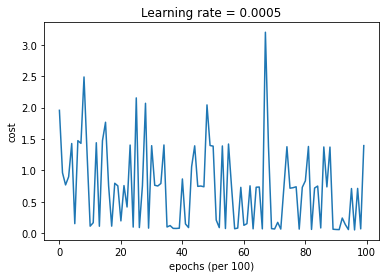

Accuracy: 0.9717341482047365


In [91]:
# train 3-layer model
layers_dims = [train_X.shape[0],50,20,1]
parameters,cost = model_with_dropout(train_X, train_Y, layers_dims, optimiser = "adam",num_epochs = 10000, lr= 0.0005, mini_batch_size=64,keep_prob=1,lambd=0.075)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
# plt.title("Model with Gradient Descent optimization")
# axes = plt.gca()
# axes.set_xlim([-1.5,2.5])
# axes.set_ylim([-1,1.5])
# plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [92]:
# Predict - find out accuracy on test set
predictions = predict(test_X, test_Y, parameters)

Accuracy: 0.9128113879003559


In [5071]:
# Quick-tune Hyperparams

def create_hyperparams_grid(train_X, train_Y,test_X, test_Y):
    layers_dims = [train_X.shape[0],50,20,1]
    graph_w = []
    graph_x = []
    graph_y = []
    graph_z = []
    for lr in np.arange(0.00050,0.0020,0.00025):
        for keep_prob in np.arange(0.9,1.05,0.1):
            graph_w_row = []
            graph_x_row = []
            graph_y_row = []
            graph_z_row = []
            for lambd in np.arange(0.050,0.11,0.025):
                print('\n\n------Next Set of Hyperparams------')
                hyperparams = (lr,keep_prob,lambd)
                parameters,cost = model_with_dropout(train_X, train_Y, layers_dims, optimiser = "adam",num_epochs = 10000, mini_batch_size=64,keep_prob=np.round(keep_prob,2),lambd=np.round(lambd,4),lr=np.round(lr,5))
                predictions = predict(test_X, test_Y, parameters)
                print("Learning Rate: " + str(lr))
                print("L2 Reg Lambd: " + str(lambd))
                print("Dropout: " + str(keep_prob))
                graph_w_row.append(lr)
                graph_x_row.append(keep_prob)
                graph_y_row.append(lambd)
                graph_z_row.append(cost)
            graph_w.append(graph_w_row)    
            graph_x.append(graph_x_row)
            graph_y.append(graph_y_row)
            graph_z.append(graph_z_row)
            print('')
    graph_w=np.array(graph_w)            
    graph_x=np.array(graph_x)
    graph_y=np.array(graph_y)
    graph_z=np.array(graph_z)
    min_z = np.min(graph_z)
    pos_min_z = np.argwhere(graph_z == np.min(graph_z))[0]
    print('\n\n------Optimal set of hyperparams------')
    print('Minimum cost: %.4f' %(min_z))
    print('Optimum learning rate: %f' %(graph_w[pos_min_z[0],pos_min_z[1]]))
    print('Optimum dropout: %f' %(graph_x[pos_min_z[0],pos_min_z[1]]))
    print('Optimum lambda: %f' %(graph_y[pos_min_z[0],pos_min_z[1]]))
    return graph_w,graph_x,graph_y,graph_z



------Next Set of Hyperparams------
Cost after epoch 0: 7.627272


<ipython-input-5030-54df6454c732>:14: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
<ipython-input-5042-467d93c9e83c>:4: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))


Cost after epoch 1000: 0.068057
Cost after epoch 2000: 0.789597
Cost after epoch 3000: 0.055039
Cost after epoch 4000: 0.775680
Cost after epoch 5000: 0.054681
Cost after epoch 6000: 0.056617
Cost after epoch 7000: 0.059776
Cost after epoch 8000: 0.782726
Cost after epoch 9000: 0.154773


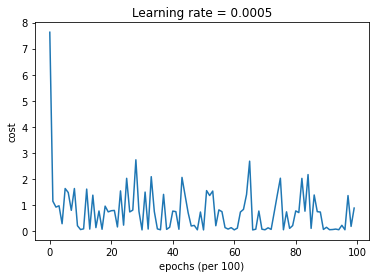

Accuracy: 0.9252669039145908
Learning Rate: 0.0005
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.684655
Cost after epoch 1000: 1.515771
Cost after epoch 2000: 0.199739
Cost after epoch 3000: 0.100668
Cost after epoch 4000: 0.764922
Cost after epoch 5000: 1.409018
Cost after epoch 6000: 1.532265
Cost after epoch 7000: 0.166868
Cost after epoch 8000: 0.778811
Cost after epoch 9000: 3.486020


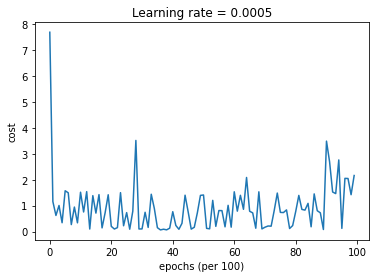

Accuracy: 0.8790035587188612
Learning Rate: 0.0005
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.741480
Cost after epoch 1000: 1.481008
Cost after epoch 2000: 0.282184
Cost after epoch 3000: 2.111004
Cost after epoch 4000: 0.758557
Cost after epoch 5000: 0.109655
Cost after epoch 6000: 1.413901
Cost after epoch 7000: 0.116480
Cost after epoch 8000: 2.725806
Cost after epoch 9000: 0.131855


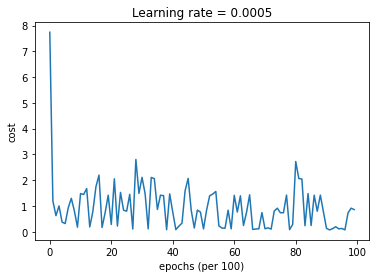

Accuracy: 0.9341637010676157
Learning Rate: 0.0005
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 1.898932
Cost after epoch 1000: 1.418209
Cost after epoch 2000: 2.057822
Cost after epoch 3000: 3.358286
Cost after epoch 4000: 0.733257
Cost after epoch 5000: 1.373375
Cost after epoch 6000: 0.065221
Cost after epoch 7000: 0.053223
Cost after epoch 8000: 0.707406
Cost after epoch 9000: 1.356686


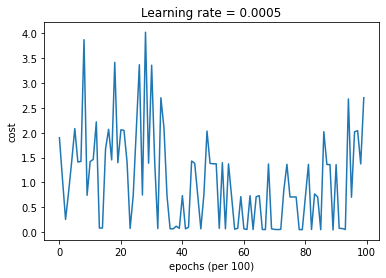

Accuracy: 0.8701067615658363
Learning Rate: 0.0005
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 1.956723
Cost after epoch 1000: 0.109967
Cost after epoch 2000: 0.193964
Cost after epoch 3000: 1.393236
Cost after epoch 4000: 0.862470
Cost after epoch 5000: 1.385705
Cost after epoch 6000: 0.123488
Cost after epoch 7000: 0.064908
Cost after epoch 8000: 0.832671
Cost after epoch 9000: 0.056945


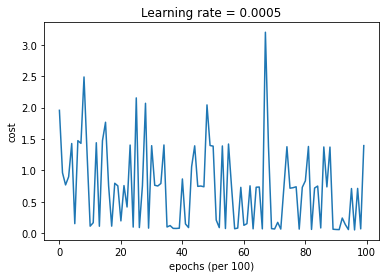

Accuracy: 0.9128113879003559
Learning Rate: 0.0005
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 2.013858
Cost after epoch 1000: 1.436805
Cost after epoch 2000: 0.115859
Cost after epoch 3000: 1.412771
Cost after epoch 4000: 0.874705
Cost after epoch 5000: 1.416572
Cost after epoch 6000: 0.116637
Cost after epoch 7000: 0.088587
Cost after epoch 8000: 0.788219
Cost after epoch 9000: 1.381878


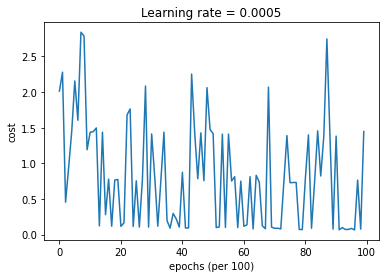

Accuracy: 0.9039145907473309
Learning Rate: 0.0005
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Next Set of Hyperparams------
Cost after epoch 0: 7.650247
Cost after epoch 1000: 0.772374
Cost after epoch 2000: 1.497423
Cost after epoch 3000: 3.414367
Cost after epoch 4000: 0.943518
Cost after epoch 5000: 0.131749
Cost after epoch 6000: 0.134230
Cost after epoch 7000: 1.423235
Cost after epoch 8000: 2.122373
Cost after epoch 9000: 1.569220


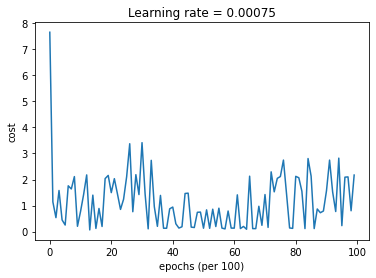

Accuracy: 0.8469750889679716
Learning Rate: 0.00075
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.705108
Cost after epoch 1000: 1.471573
Cost after epoch 2000: 0.850350
Cost after epoch 3000: 2.746432
Cost after epoch 4000: 0.851380
Cost after epoch 5000: 0.275099
Cost after epoch 6000: 1.443531
Cost after epoch 7000: 0.792001
Cost after epoch 8000: 1.458779
Cost after epoch 9000: 2.775402


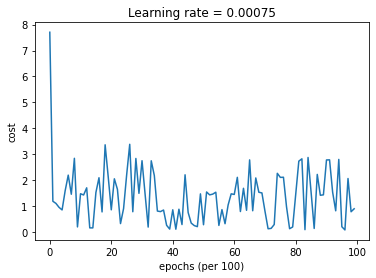

Accuracy: 0.9039145907473309
Learning Rate: 0.00075
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.759458
Cost after epoch 1000: 1.504163
Cost after epoch 2000: 2.181616
Cost after epoch 3000: 2.112915
Cost after epoch 4000: 1.437588
Cost after epoch 5000: 0.157984
Cost after epoch 6000: 0.141581
Cost after epoch 7000: 0.826692
Cost after epoch 8000: 1.472706
Cost after epoch 9000: 2.858267


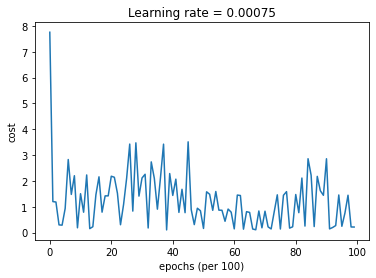

Accuracy: 0.9270462633451957
Learning Rate: 0.00075
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 5.295996
Cost after epoch 1000: 0.087176
Cost after epoch 2000: 0.738245
Cost after epoch 3000: 4.018114
Cost after epoch 4000: 0.801432
Cost after epoch 5000: 1.378209
Cost after epoch 6000: 0.095184
Cost after epoch 7000: 0.063538
Cost after epoch 8000: 1.418473
Cost after epoch 9000: 3.343042


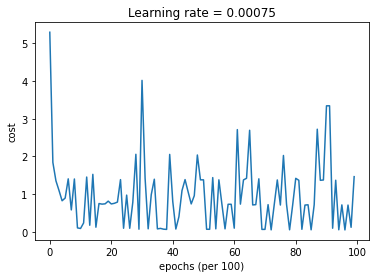

Accuracy: 0.9039145907473309
Learning Rate: 0.00075
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 5.400347
Cost after epoch 1000: 0.115799
Cost after epoch 2000: 2.372869
Cost after epoch 3000: 0.739634
Cost after epoch 4000: 0.746963
Cost after epoch 5000: 1.388300
Cost after epoch 6000: 0.106162
Cost after epoch 7000: 1.429397
Cost after epoch 8000: 2.042901
Cost after epoch 9000: 4.005955


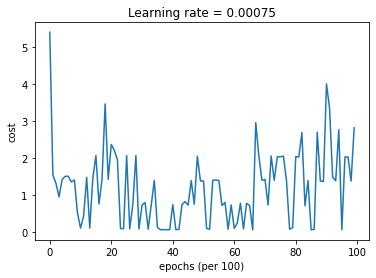

Accuracy: 0.8683274021352313
Learning Rate: 0.00075
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 5.486785
Cost after epoch 1000: 0.118698
Cost after epoch 2000: 2.092946
Cost after epoch 3000: 1.416037
Cost after epoch 4000: 0.795886
Cost after epoch 5000: 1.398691
Cost after epoch 6000: 0.124821
Cost after epoch 7000: 0.085572
Cost after epoch 8000: 0.736689
Cost after epoch 9000: 1.386235


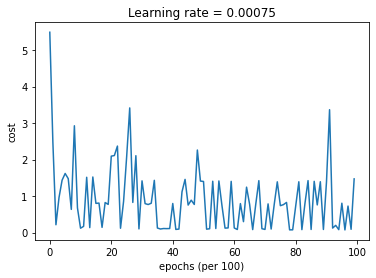

Accuracy: 0.9163701067615658
Learning Rate: 0.00075
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Next Set of Hyperparams------
Cost after epoch 0: 6.975600
Cost after epoch 1000: 0.160320
Cost after epoch 2000: 1.542541
Cost after epoch 3000: 2.102263
Cost after epoch 4000: 1.530738
Cost after epoch 5000: 0.136856
Cost after epoch 6000: 0.774657
Cost after epoch 7000: 0.090819
Cost after epoch 8000: 0.745994
Cost after epoch 9000: 0.831257


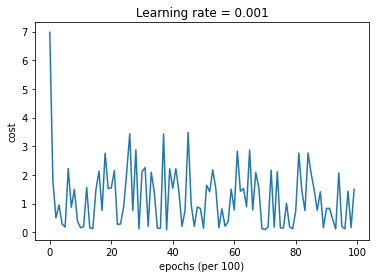

Accuracy: 0.9341637010676157
Learning Rate: 0.001
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.028948
Cost after epoch 1000: 1.587060
Cost after epoch 2000: 2.297201
Cost after epoch 3000: 1.463300
Cost after epoch 4000: 1.218229
Cost after epoch 5000: 1.473409
Cost after epoch 6000: 0.916493
Cost after epoch 7000: 0.874082
Cost after epoch 8000: 1.511065
Cost after epoch 9000: 1.475241


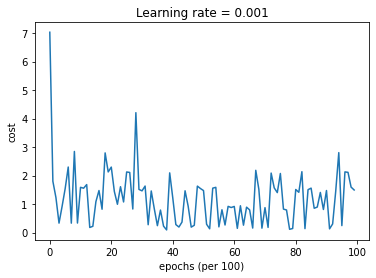

Accuracy: 0.902135231316726
Learning Rate: 0.001
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.080390
Cost after epoch 1000: 0.957110
Cost after epoch 2000: 1.557567
Cost after epoch 3000: 2.143229
Cost after epoch 4000: 0.926091
Cost after epoch 5000: 0.314039
Cost after epoch 6000: 0.947303
Cost after epoch 7000: 0.226554
Cost after epoch 8000: 0.820765
Cost after epoch 9000: 0.196081


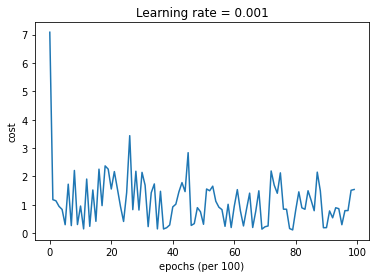

Accuracy: 0.8185053380782918
Learning Rate: 0.001
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 3.241235
Cost after epoch 1000: 1.455326
Cost after epoch 2000: 0.732734
Cost after epoch 3000: 4.017509
Cost after epoch 4000: 1.408027
Cost after epoch 5000: 0.061978
Cost after epoch 6000: 0.064704
Cost after epoch 7000: 1.566485
Cost after epoch 8000: 0.907403
Cost after epoch 9000: 0.713767


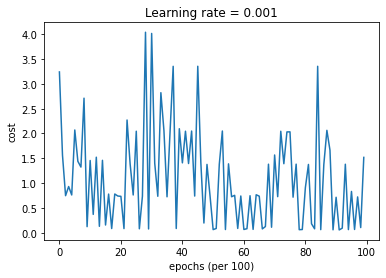

Accuracy: 0.9145907473309609
Learning Rate: 0.001
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 3.413556
Cost after epoch 1000: 0.130468
Cost after epoch 2000: 0.189275
Cost after epoch 3000: 4.042699
Cost after epoch 4000: 1.404836
Cost after epoch 5000: 1.389994
Cost after epoch 6000: 0.091070
Cost after epoch 7000: 0.082546
Cost after epoch 8000: 0.767328
Cost after epoch 9000: 1.379719


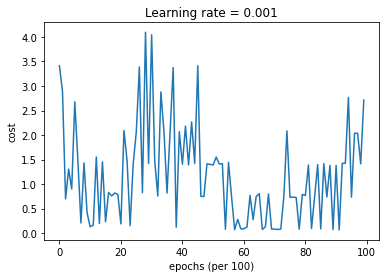

Accuracy: 0.8701067615658363
Learning Rate: 0.001
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 5.089423
Cost after epoch 1000: 1.438379
Cost after epoch 2000: 0.154843
Cost after epoch 3000: 1.426801
Cost after epoch 4000: 0.742778
Cost after epoch 5000: 1.402606
Cost after epoch 6000: 0.124938
Cost after epoch 7000: 0.103487
Cost after epoch 8000: 0.844775
Cost after epoch 9000: 1.394808


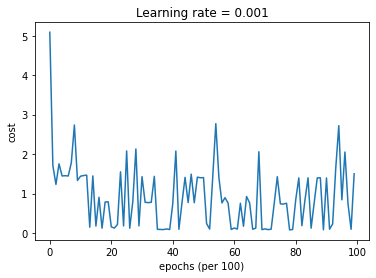

Accuracy: 0.9110320284697508
Learning Rate: 0.001
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Next Set of Hyperparams------
Cost after epoch 0: 7.010418
Cost after epoch 1000: 1.545700
Cost after epoch 2000: 2.189787
Cost after epoch 3000: 1.479640
Cost after epoch 4000: 0.959845
Cost after epoch 5000: 1.474200
Cost after epoch 6000: 1.562657
Cost after epoch 7000: 1.427120
Cost after epoch 8000: 0.832148
Cost after epoch 9000: 0.169162


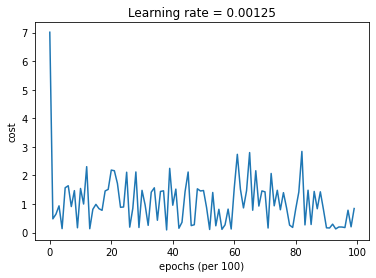

Accuracy: 0.9323843416370107
Learning Rate: 0.00125
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.060960
Cost after epoch 1000: 1.726817
Cost after epoch 2000: 1.755014
Cost after epoch 3000: 1.499903
Cost after epoch 4000: 0.867251
Cost after epoch 5000: 0.116031
Cost after epoch 6000: 0.235614
Cost after epoch 7000: 1.465020
Cost after epoch 8000: 0.854255
Cost after epoch 9000: 1.550512


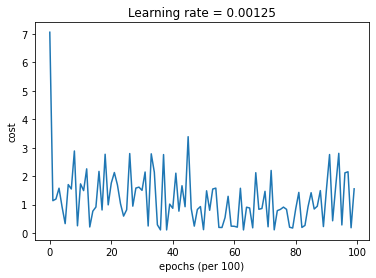

Accuracy: 0.8327402135231317
Learning Rate: 0.00125
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.109565
Cost after epoch 1000: 1.682730
Cost after epoch 2000: 0.348736
Cost after epoch 3000: 0.800411
Cost after epoch 4000: 1.649697
Cost after epoch 5000: 0.832729
Cost after epoch 6000: 0.935153
Cost after epoch 7000: 1.538137
Cost after epoch 8000: 2.241808
Cost after epoch 9000: 2.242803


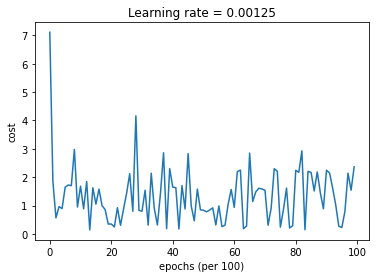

Accuracy: 0.8451957295373665
Learning Rate: 0.00125
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 5.605985
Cost after epoch 1000: 0.098807
Cost after epoch 2000: 0.728492
Cost after epoch 3000: 1.383587
Cost after epoch 4000: 0.752927
Cost after epoch 5000: 0.066356
Cost after epoch 6000: 1.390908
Cost after epoch 7000: 1.426940
Cost after epoch 8000: 2.038139
Cost after epoch 9000: 1.389118


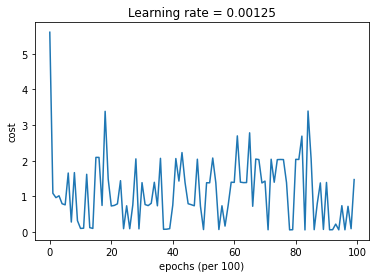

Accuracy: 0.9039145907473309
Learning Rate: 0.00125
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 5.657201
Cost after epoch 1000: 1.427045
Cost after epoch 2000: 2.743172
Cost after epoch 3000: 4.035250
Cost after epoch 4000: 0.783715
Cost after epoch 5000: 0.113294
Cost after epoch 6000: 0.101506
Cost after epoch 7000: 1.396574
Cost after epoch 8000: 2.062893
Cost after epoch 9000: 3.373645


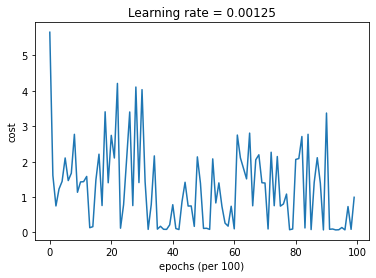

Accuracy: 0.896797153024911
Learning Rate: 0.00125
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 5.705657
Cost after epoch 1000: 1.488132
Cost after epoch 2000: 2.805659
Cost after epoch 3000: 4.077919
Cost after epoch 4000: 0.753298
Cost after epoch 5000: 1.409243
Cost after epoch 6000: 0.152492
Cost after epoch 7000: 1.414765
Cost after epoch 8000: 0.791431
Cost after epoch 9000: 1.395362


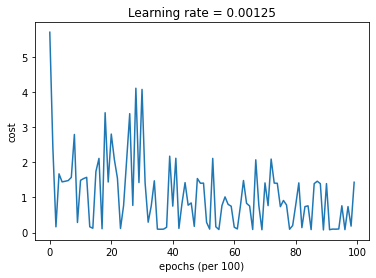

Accuracy: 0.902135231316726
Learning Rate: 0.00125
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Next Set of Hyperparams------
Cost after epoch 0: 6.998344
Cost after epoch 1000: 0.237103
Cost after epoch 2000: 0.350914
Cost after epoch 3000: 2.772488
Cost after epoch 4000: 0.938937
Cost after epoch 5000: 0.124101
Cost after epoch 6000: 0.785459
Cost after epoch 7000: 1.454157
Cost after epoch 8000: 1.482164
Cost after epoch 9000: 3.492550


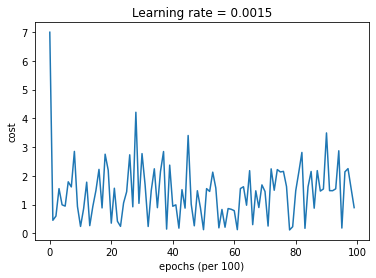

Accuracy: 0.8434163701067615
Learning Rate: 0.0015
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.046070
Cost after epoch 1000: 1.594202
Cost after epoch 2000: 0.960931
Cost after epoch 3000: 1.520858
Cost after epoch 4000: 1.639837
Cost after epoch 5000: 0.117138
Cost after epoch 6000: 0.924029
Cost after epoch 7000: 0.917098
Cost after epoch 8000: 0.842818
Cost after epoch 9000: 4.139806


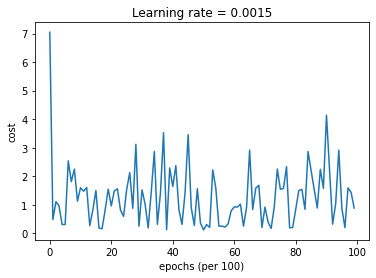

Accuracy: 0.8718861209964412
Learning Rate: 0.0015
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.093139
Cost after epoch 1000: 0.242011
Cost after epoch 2000: 2.323066
Cost after epoch 3000: 3.490172
Cost after epoch 4000: 1.552552
Cost after epoch 5000: 0.146232
Cost after epoch 6000: 1.526493
Cost after epoch 7000: 0.840528
Cost after epoch 8000: 2.150861
Cost after epoch 9000: 3.595725


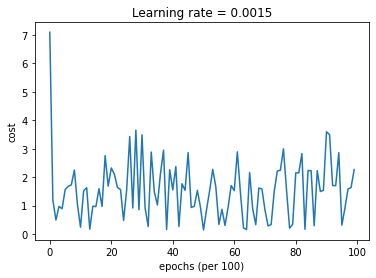

Accuracy: 0.8380782918149466
Learning Rate: 0.0015
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 1.627313
Cost after epoch 1000: 0.108591
Cost after epoch 2000: 2.164464
Cost after epoch 3000: 4.040474
Cost after epoch 4000: 1.387744
Cost after epoch 5000: 1.393340
Cost after epoch 6000: 1.426765
Cost after epoch 7000: 0.079070
Cost after epoch 8000: 0.760189
Cost after epoch 9000: 1.386798


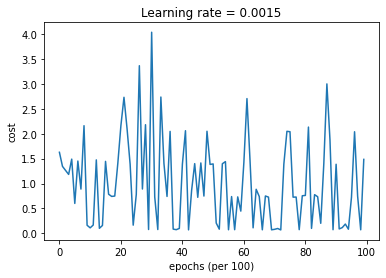

Accuracy: 0.9092526690391459
Learning Rate: 0.0015
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 1.697205
Cost after epoch 1000: 0.132003
Cost after epoch 2000: 0.118594
Cost after epoch 3000: 1.399903
Cost after epoch 4000: 1.507249
Cost after epoch 5000: 1.406822
Cost after epoch 6000: 0.095241
Cost after epoch 7000: 0.086335
Cost after epoch 8000: 1.569833
Cost after epoch 9000: 0.742669


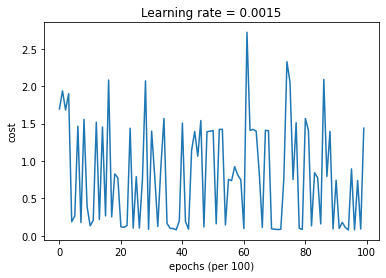

Accuracy: 0.8861209964412812
Learning Rate: 0.0015
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 4.452576
Cost after epoch 1000: 1.435788
Cost after epoch 2000: 2.907537
Cost after epoch 3000: 1.462183
Cost after epoch 4000: 1.619448
Cost after epoch 5000: 1.420962
Cost after epoch 6000: 1.466369
Cost after epoch 7000: 0.152108
Cost after epoch 8000: 0.808246
Cost after epoch 9000: 4.783861


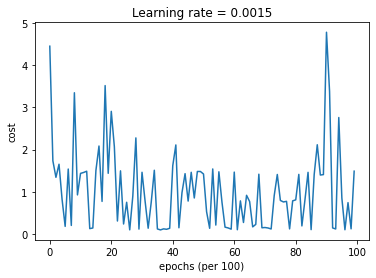

Accuracy: 0.9128113879003559
Learning Rate: 0.0015
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Next Set of Hyperparams------
Cost after epoch 0: 7.027151
Cost after epoch 1000: 1.632868
Cost after epoch 2000: 2.927366
Cost after epoch 3000: 2.174555
Cost after epoch 4000: 1.523897
Cost after epoch 5000: 1.503210
Cost after epoch 6000: 1.496508
Cost after epoch 7000: 1.501620
Cost after epoch 8000: 1.498206
Cost after epoch 9000: 3.463244


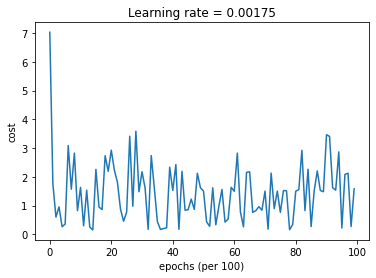

Accuracy: 0.896797153024911
Learning Rate: 0.00175
L2 Reg Lambd: 0.05
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.059919
Cost after epoch 1000: 1.553635
Cost after epoch 2000: 2.289447
Cost after epoch 3000: 0.980588
Cost after epoch 4000: 0.984245
Cost after epoch 5000: 0.209170
Cost after epoch 6000: 0.982335
Cost after epoch 7000: 0.322638
Cost after epoch 8000: 1.495993
Cost after epoch 9000: 1.517544


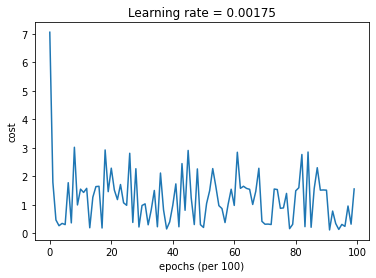

Accuracy: 0.8523131672597865
Learning Rate: 0.00175
L2 Reg Lambd: 0.07500000000000001
Dropout: 0.9


------Next Set of Hyperparams------
Cost after epoch 0: 7.103178
Cost after epoch 1000: 1.605171
Cost after epoch 2000: 1.605810
Cost after epoch 3000: 1.521387
Cost after epoch 4000: 1.104346
Cost after epoch 5000: 0.904277
Cost after epoch 6000: 1.561113
Cost after epoch 7000: 1.560451
Cost after epoch 8000: 2.246893
Cost after epoch 9000: 3.526855


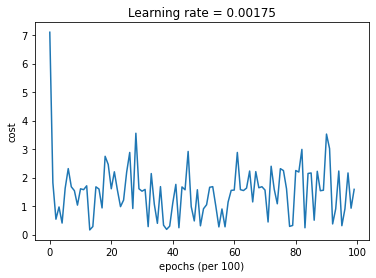

Accuracy: 0.8790035587188612
Learning Rate: 0.00175
L2 Reg Lambd: 0.10000000000000002
Dropout: 0.9



------Next Set of Hyperparams------
Cost after epoch 0: 4.648861
Cost after epoch 1000: 0.093497
Cost after epoch 2000: 0.825217
Cost after epoch 3000: 1.428693
Cost after epoch 4000: 1.523143
Cost after epoch 5000: 0.108069
Cost after epoch 6000: 0.094836
Cost after epoch 7000: 0.096190
Cost after epoch 8000: 2.134966
Cost after epoch 9000: 0.156038


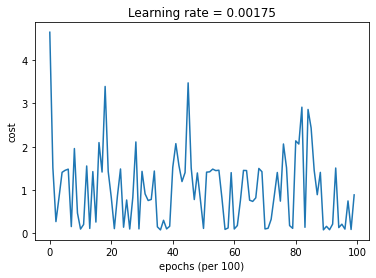

Accuracy: 0.896797153024911
Learning Rate: 0.00175
L2 Reg Lambd: 0.05
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 4.704218
Cost after epoch 1000: 1.451834
Cost after epoch 2000: 0.804109
Cost after epoch 3000: 1.400438
Cost after epoch 4000: 0.754716
Cost after epoch 5000: 1.425252
Cost after epoch 6000: 0.086284
Cost after epoch 7000: 0.134744
Cost after epoch 8000: 0.802332
Cost after epoch 9000: 1.400049


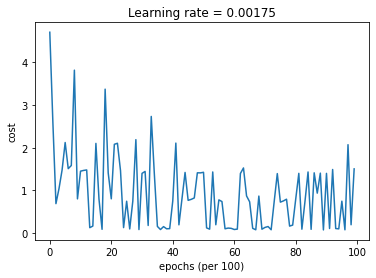

Accuracy: 0.9128113879003559
Learning Rate: 0.00175
L2 Reg Lambd: 0.07500000000000001
Dropout: 1.0


------Next Set of Hyperparams------
Cost after epoch 0: 3.733067
Cost after epoch 1000: 1.495065
Cost after epoch 2000: 2.777024
Cost after epoch 3000: 3.423782
Cost after epoch 4000: 1.418584
Cost after epoch 5000: 1.422363
Cost after epoch 6000: 0.239360
Cost after epoch 7000: 0.094798
Cost after epoch 8000: 2.133808
Cost after epoch 9000: 0.151887


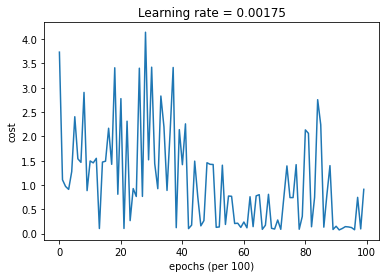

Accuracy: 0.8683274021352313
Learning Rate: 0.00175
L2 Reg Lambd: 0.10000000000000002
Dropout: 1.0



------Optimal set of hyperparams------
Minimum cost: 0.7110
Optimum learning rate: 0.000500
Optimum dropout: 1.000000
Optimum lambda: 0.075000


In [5072]:
graph_w,graph_x,graph_y,graph_z=create_hyperparams_grid(train_X, train_Y,test_X,test_Y)

In [75]:
# Using TF Keras API
from tensorflow import keras
import tensorflow as tf
import tensorflow.keras.layers as tfl

def nn_model():

    model = tf.keras.Sequential([
            tfl.Dense(units=50, input_dim=train_X.shape[0],activation='relu'),        
            tfl.Dense(units=20, activation='relu'),
            tfl.Dense(units=1, activation='sigmoid')
        ])
    
    return model

In [76]:
model = nn_model()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_Y.T)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_Y.T)).batch(64)
history = model.fit(train_dataset, epochs=10000, validation_data=test_dataset)

Epoch 1/10000
21/21 [==============================] - 1s 15ms/step - loss: 35732.4883 - accuracy: 0.5462 - val_loss: 12444.4551 - val_accuracy: 0.6335
Epoch 2/10000
21/21 [==============================] - 0s 3ms/step - loss: 5832.2710 - accuracy: 0.6218 - val_loss: 196.4762 - val_accuracy: 0.5979
Epoch 3/10000
21/21 [==============================] - 0s 3ms/step - loss: 3610.4221 - accuracy: 0.6241 - val_loss: 3037.1824 - val_accuracy: 0.6210
Epoch 4/10000
21/21 [==============================] - 0s 3ms/step - loss: 3734.8430 - accuracy: 0.6287 - val_loss: 4893.2075 - val_accuracy: 0.6388
Epoch 5/10000
21/21 [==============================] - 0s 3ms/step - loss: 4096.4131 - accuracy: 0.6471 - val_loss: 2066.5164 - val_accuracy: 0.6637
Epoch 6/10000
21/21 [==============================] - 0s 3ms/step - loss: 1866.0615 - accuracy: 0.6707 - val_loss: 599.3147 - val_accuracy: 0.6584
Epoch 7/10000
21/21 [==============================] - 0s 3ms/step - loss: 4588.1074 - accuracy: 0.6906 -

Epoch 56/10000
21/21 [==============================] - 0s 4ms/step - loss: 4894.4678 - accuracy: 0.7884 - val_loss: 13574.1787 - val_accuracy: 0.7687
Epoch 57/10000
21/21 [==============================] - 0s 4ms/step - loss: 3712.5049 - accuracy: 0.7960 - val_loss: 2544.1138 - val_accuracy: 0.7260
Epoch 58/10000
21/21 [==============================] - 0s 4ms/step - loss: 5594.8115 - accuracy: 0.7609 - val_loss: 5697.1084 - val_accuracy: 0.7616
Epoch 59/10000
21/21 [==============================] - 0s 5ms/step - loss: 3781.5554 - accuracy: 0.8021 - val_loss: 6519.1416 - val_accuracy: 0.7705
Epoch 60/10000
21/21 [==============================] - 0s 5ms/step - loss: 4313.3848 - accuracy: 0.7769 - val_loss: 2155.7925 - val_accuracy: 0.7705
Epoch 61/10000
21/21 [==============================] - 0s 4ms/step - loss: 1924.8252 - accuracy: 0.7884 - val_loss: 540.5679 - val_accuracy: 0.7669
Epoch 62/10000
21/21 [==============================] - 0s 4ms/step - loss: 4681.7983 - accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 4119.5571 - accuracy: 0.8304 - val_loss: 2843.6367 - val_accuracy: 0.7936
Epoch 111/10000
21/21 [==============================] - 0s 3ms/step - loss: 1676.1454 - accuracy: 0.8472 - val_loss: 703.0165 - val_accuracy: 0.8043
Epoch 112/10000
21/21 [==============================] - 0s 3ms/step - loss: 2490.1802 - accuracy: 0.8426 - val_loss: 900.6458 - val_accuracy: 0.7936
Epoch 113/10000
21/21 [==============================] - 0s 3ms/step - loss: 923.2557 - accuracy: 0.8640 - val_loss: 88.8665 - val_accuracy: 0.8078
Epoch 114/10000
21/21 [==============================] - 0s 3ms/step - loss: 2371.2002 - accuracy: 0.8602 - val_loss: 243.3538 - val_accuracy: 0.6673
Epoch 115/10000
21/21 [==============================] - 0s 3ms/step - loss: 1593.0511 - accuracy: 0.8319 - val_loss: 3043.4355 - val_accuracy: 0.8043
Epoch 116/10000
21/21 [==============================] - 0s 3ms/step - loss: 1536.9133 - accuracy: 0.8739 - val_loss

21/21 [==============================] - 0s 3ms/step - loss: 2390.6431 - accuracy: 0.8472 - val_loss: 944.9017 - val_accuracy: 0.8060
Epoch 165/10000
21/21 [==============================] - 0s 4ms/step - loss: 1317.4463 - accuracy: 0.8442 - val_loss: 2268.5186 - val_accuracy: 0.8060
Epoch 166/10000
21/21 [==============================] - 0s 4ms/step - loss: 2492.6873 - accuracy: 0.8816 - val_loss: 1319.1448 - val_accuracy: 0.7847
Epoch 167/10000
21/21 [==============================] - 0s 4ms/step - loss: 1610.5789 - accuracy: 0.8358 - val_loss: 1710.8748 - val_accuracy: 0.8185
Epoch 168/10000
21/21 [==============================] - 0s 5ms/step - loss: 1767.5721 - accuracy: 0.8732 - val_loss: 683.8778 - val_accuracy: 0.8310
Epoch 169/10000
21/21 [==============================] - 0s 5ms/step - loss: 1167.9238 - accuracy: 0.8549 - val_loss: 5573.9854 - val_accuracy: 0.7509
Epoch 170/10000
21/21 [==============================] - 0s 3ms/step - loss: 4346.4199 - accuracy: 0.8617 - val_

21/21 [==============================] - 0s 3ms/step - loss: 3333.0432 - accuracy: 0.8625 - val_loss: 1217.4877 - val_accuracy: 0.8167
Epoch 219/10000
21/21 [==============================] - 0s 3ms/step - loss: 2223.5310 - accuracy: 0.8503 - val_loss: 1141.4482 - val_accuracy: 0.8256
Epoch 220/10000
21/21 [==============================] - 0s 2ms/step - loss: 3438.1873 - accuracy: 0.8762 - val_loss: 3067.3074 - val_accuracy: 0.8203
Epoch 221/10000
21/21 [==============================] - 0s 3ms/step - loss: 4964.9395 - accuracy: 0.8747 - val_loss: 3980.6316 - val_accuracy: 0.8203
Epoch 222/10000
21/21 [==============================] - 0s 3ms/step - loss: 1617.6713 - accuracy: 0.8869 - val_loss: 189.8512 - val_accuracy: 0.8167
Epoch 223/10000
21/21 [==============================] - 0s 3ms/step - loss: 2703.3689 - accuracy: 0.8411 - val_loss: 2950.1619 - val_accuracy: 0.8203
Epoch 224/10000
21/21 [==============================] - 0s 2ms/step - loss: 1870.3802 - accuracy: 0.8808 - val

21/21 [==============================] - 0s 3ms/step - loss: 3664.0881 - accuracy: 0.9175 - val_loss: 7109.5986 - val_accuracy: 0.8185
Epoch 273/10000
21/21 [==============================] - 0s 3ms/step - loss: 2455.9280 - accuracy: 0.9068 - val_loss: 2217.5811 - val_accuracy: 0.8505
Epoch 274/10000
21/21 [==============================] - 0s 2ms/step - loss: 1164.6738 - accuracy: 0.8854 - val_loss: 1266.6279 - val_accuracy: 0.7758
Epoch 275/10000
21/21 [==============================] - 0s 2ms/step - loss: 1959.8129 - accuracy: 0.9236 - val_loss: 1449.9039 - val_accuracy: 0.7794
Epoch 276/10000
21/21 [==============================] - 0s 3ms/step - loss: 1762.8505 - accuracy: 0.8839 - val_loss: 2106.7302 - val_accuracy: 0.7669
Epoch 277/10000
21/21 [==============================] - 0s 2ms/step - loss: 1804.4398 - accuracy: 0.9099 - val_loss: 2114.4316 - val_accuracy: 0.7722
Epoch 278/10000
21/21 [==============================] - 0s 2ms/step - loss: 1811.4712 - accuracy: 0.8892 - va

21/21 [==============================] - 0s 3ms/step - loss: 555.6727 - accuracy: 0.9221 - val_loss: 448.5119 - val_accuracy: 0.8363
Epoch 327/10000
21/21 [==============================] - 0s 3ms/step - loss: 877.5470 - accuracy: 0.9152 - val_loss: 1184.2030 - val_accuracy: 0.7883
Epoch 328/10000
21/21 [==============================] - 0s 3ms/step - loss: 1018.3349 - accuracy: 0.9206 - val_loss: 360.0609 - val_accuracy: 0.7989
Epoch 329/10000
21/21 [==============================] - 0s 4ms/step - loss: 1638.6356 - accuracy: 0.9167 - val_loss: 715.6583 - val_accuracy: 0.7580
Epoch 330/10000
21/21 [==============================] - 0s 3ms/step - loss: 1390.9829 - accuracy: 0.9076 - val_loss: 580.3013 - val_accuracy: 0.7847
Epoch 331/10000
21/21 [==============================] - 0s 3ms/step - loss: 1368.0709 - accuracy: 0.9160 - val_loss: 2272.9429 - val_accuracy: 0.7972
Epoch 332/10000
21/21 [==============================] - 0s 3ms/step - loss: 682.0158 - accuracy: 0.9228 - val_loss:

21/21 [==============================] - 0s 5ms/step - loss: 2302.4907 - accuracy: 0.9290 - val_loss: 2357.8020 - val_accuracy: 0.8505
Epoch 381/10000
21/21 [==============================] - 0s 5ms/step - loss: 1422.8126 - accuracy: 0.9060 - val_loss: 2677.1582 - val_accuracy: 0.7972
Epoch 382/10000
21/21 [==============================] - 0s 5ms/step - loss: 2286.3369 - accuracy: 0.9144 - val_loss: 2424.3289 - val_accuracy: 0.8594
Epoch 383/10000
21/21 [==============================] - 0s 4ms/step - loss: 2080.5925 - accuracy: 0.9198 - val_loss: 3697.0549 - val_accuracy: 0.8470
Epoch 384/10000
21/21 [==============================] - 0s 4ms/step - loss: 2122.7051 - accuracy: 0.9083 - val_loss: 2239.4490 - val_accuracy: 0.8310
Epoch 385/10000
21/21 [==============================] - 0s 4ms/step - loss: 1296.1713 - accuracy: 0.9175 - val_loss: 94.1175 - val_accuracy: 0.7972
Epoch 386/10000
21/21 [==============================] - 0s 6ms/step - loss: 2999.1152 - accuracy: 0.9076 - val_

21/21 [==============================] - 0s 2ms/step - loss: 3282.5127 - accuracy: 0.9206 - val_loss: 6801.0161 - val_accuracy: 0.7883
Epoch 435/10000
21/21 [==============================] - 0s 2ms/step - loss: 4235.8921 - accuracy: 0.9458 - val_loss: 1731.7644 - val_accuracy: 0.8505
Epoch 436/10000
21/21 [==============================] - 0s 2ms/step - loss: 806.9042 - accuracy: 0.9374 - val_loss: 1638.7252 - val_accuracy: 0.8345
Epoch 437/10000
21/21 [==============================] - 0s 2ms/step - loss: 1979.3677 - accuracy: 0.9236 - val_loss: 3669.3987 - val_accuracy: 0.7847
Epoch 438/10000
21/21 [==============================] - 0s 3ms/step - loss: 2072.2495 - accuracy: 0.9206 - val_loss: 758.8311 - val_accuracy: 0.8025
Epoch 439/10000
21/21 [==============================] - 0s 2ms/step - loss: 1239.5282 - accuracy: 0.9442 - val_loss: 666.0059 - val_accuracy: 0.8523
Epoch 440/10000
21/21 [==============================] - 0s 2ms/step - loss: 1141.0941 - accuracy: 0.9481 - val_l

21/21 [==============================] - 0s 2ms/step - loss: 2848.0637 - accuracy: 0.9175 - val_loss: 2202.0164 - val_accuracy: 0.8221
Epoch 489/10000
21/21 [==============================] - 0s 3ms/step - loss: 1148.9440 - accuracy: 0.9190 - val_loss: 414.1815 - val_accuracy: 0.8488
Epoch 490/10000
21/21 [==============================] - 0s 4ms/step - loss: 2251.1655 - accuracy: 0.9282 - val_loss: 2568.3289 - val_accuracy: 0.8452
Epoch 491/10000
21/21 [==============================] - 0s 3ms/step - loss: 1574.3064 - accuracy: 0.9259 - val_loss: 682.7991 - val_accuracy: 0.8025
Epoch 492/10000
21/21 [==============================] - 0s 3ms/step - loss: 2306.6169 - accuracy: 0.9427 - val_loss: 1462.2189 - val_accuracy: 0.8399
Epoch 493/10000
21/21 [==============================] - 0s 2ms/step - loss: 1694.1643 - accuracy: 0.9351 - val_loss: 945.0455 - val_accuracy: 0.8488
Epoch 494/10000
21/21 [==============================] - 0s 3ms/step - loss: 801.5749 - accuracy: 0.9389 - val_lo

21/21 [==============================] - 0s 2ms/step - loss: 2395.1875 - accuracy: 0.9389 - val_loss: 2539.1792 - val_accuracy: 0.8470
Epoch 543/10000
21/21 [==============================] - 0s 2ms/step - loss: 1495.6305 - accuracy: 0.9129 - val_loss: 2644.0491 - val_accuracy: 0.8043
Epoch 544/10000
21/21 [==============================] - 0s 2ms/step - loss: 2380.5071 - accuracy: 0.9305 - val_loss: 2554.9832 - val_accuracy: 0.8470
Epoch 545/10000
21/21 [==============================] - 0s 2ms/step - loss: 1491.5963 - accuracy: 0.9366 - val_loss: 2549.3013 - val_accuracy: 0.7847
Epoch 546/10000
21/21 [==============================] - 0s 2ms/step - loss: 2365.9717 - accuracy: 0.9435 - val_loss: 2570.9783 - val_accuracy: 0.8292
Epoch 547/10000
21/21 [==============================] - 0s 2ms/step - loss: 1125.3448 - accuracy: 0.9389 - val_loss: 4169.4727 - val_accuracy: 0.7954
Epoch 548/10000
21/21 [==============================] - 0s 2ms/step - loss: 2872.3364 - accuracy: 0.9396 - va

21/21 [==============================] - 0s 2ms/step - loss: 1968.7244 - accuracy: 0.9587 - val_loss: 1055.6284 - val_accuracy: 0.8594
Epoch 597/10000
21/21 [==============================] - 0s 2ms/step - loss: 2270.4717 - accuracy: 0.9366 - val_loss: 4235.9326 - val_accuracy: 0.8416
Epoch 598/10000
21/21 [==============================] - 0s 2ms/step - loss: 1321.4005 - accuracy: 0.9328 - val_loss: 315.7087 - val_accuracy: 0.8577
Epoch 599/10000
21/21 [==============================] - 0s 2ms/step - loss: 1213.8928 - accuracy: 0.9144 - val_loss: 1522.9136 - val_accuracy: 0.8541
Epoch 600/10000
21/21 [==============================] - 0s 2ms/step - loss: 1855.2081 - accuracy: 0.9228 - val_loss: 2518.8638 - val_accuracy: 0.8452
Epoch 601/10000
21/21 [==============================] - 0s 2ms/step - loss: 2435.7769 - accuracy: 0.9267 - val_loss: 4952.0825 - val_accuracy: 0.8007
Epoch 602/10000
21/21 [==============================] - 0s 2ms/step - loss: 3145.1106 - accuracy: 0.9427 - val

21/21 [==============================] - 0s 2ms/step - loss: 1368.9761 - accuracy: 0.9106 - val_loss: 2630.4270 - val_accuracy: 0.7847
Epoch 651/10000
21/21 [==============================] - 0s 2ms/step - loss: 1172.7593 - accuracy: 0.9465 - val_loss: 2657.7302 - val_accuracy: 0.8007
Epoch 652/10000
21/21 [==============================] - 0s 2ms/step - loss: 1452.3551 - accuracy: 0.9412 - val_loss: 24.4871 - val_accuracy: 0.8559
Epoch 653/10000
21/21 [==============================] - 0s 2ms/step - loss: 1371.8141 - accuracy: 0.9328 - val_loss: 4364.4824 - val_accuracy: 0.8523
Epoch 654/10000
21/21 [==============================] - 0s 2ms/step - loss: 1266.2854 - accuracy: 0.9351 - val_loss: 72.1557 - val_accuracy: 0.7829
Epoch 655/10000
21/21 [==============================] - 0s 2ms/step - loss: 969.1326 - accuracy: 0.9435 - val_loss: 3497.0850 - val_accuracy: 0.7883
Epoch 656/10000
21/21 [==============================] - 0s 2ms/step - loss: 2027.7709 - accuracy: 0.9450 - val_los

21/21 [==============================] - 0s 2ms/step - loss: 674.1565 - accuracy: 0.9519 - val_loss: 477.0871 - val_accuracy: 0.8559
Epoch 705/10000
21/21 [==============================] - 0s 2ms/step - loss: 1894.3870 - accuracy: 0.9526 - val_loss: 4878.4370 - val_accuracy: 0.8523
Epoch 706/10000
21/21 [==============================] - 0s 2ms/step - loss: 1272.0289 - accuracy: 0.9427 - val_loss: 367.9805 - val_accuracy: 0.8452
Epoch 707/10000
21/21 [==============================] - 0s 2ms/step - loss: 1026.2628 - accuracy: 0.9427 - val_loss: 134.1908 - val_accuracy: 0.8577
Epoch 708/10000
21/21 [==============================] - 0s 2ms/step - loss: 1044.6575 - accuracy: 0.9458 - val_loss: 54.6713 - val_accuracy: 0.8488
Epoch 709/10000
21/21 [==============================] - 0s 2ms/step - loss: 646.0909 - accuracy: 0.9633 - val_loss: 633.8870 - val_accuracy: 0.8505
Epoch 710/10000
21/21 [==============================] - 0s 2ms/step - loss: 619.6734 - accuracy: 0.9580 - val_loss: 1

21/21 [==============================] - 0s 2ms/step - loss: 1775.1340 - accuracy: 0.9542 - val_loss: 1622.5132 - val_accuracy: 0.8612
Epoch 759/10000
21/21 [==============================] - 0s 3ms/step - loss: 1522.3656 - accuracy: 0.9542 - val_loss: 2453.2024 - val_accuracy: 0.8630
Epoch 760/10000
21/21 [==============================] - 0s 2ms/step - loss: 1681.0889 - accuracy: 0.9565 - val_loss: 537.1002 - val_accuracy: 0.8559
Epoch 761/10000
21/21 [==============================] - 0s 3ms/step - loss: 1042.0629 - accuracy: 0.9519 - val_loss: 655.3706 - val_accuracy: 0.8416
Epoch 762/10000
21/21 [==============================] - 0s 3ms/step - loss: 763.0010 - accuracy: 0.9228 - val_loss: 611.1871 - val_accuracy: 0.8505
Epoch 763/10000
21/21 [==============================] - 0s 2ms/step - loss: 799.3813 - accuracy: 0.9526 - val_loss: 385.0055 - val_accuracy: 0.8559
Epoch 764/10000
21/21 [==============================] - 0s 3ms/step - loss: 1023.9765 - accuracy: 0.9595 - val_loss

21/21 [==============================] - 0s 3ms/step - loss: 1679.1962 - accuracy: 0.9542 - val_loss: 3285.3389 - val_accuracy: 0.8612
Epoch 813/10000
21/21 [==============================] - 0s 3ms/step - loss: 1035.3358 - accuracy: 0.9534 - val_loss: 1242.6063 - val_accuracy: 0.8078
Epoch 814/10000
21/21 [==============================] - 0s 3ms/step - loss: 1382.1771 - accuracy: 0.9549 - val_loss: 1394.4354 - val_accuracy: 0.8665
Epoch 815/10000
21/21 [==============================] - 0s 3ms/step - loss: 1050.8784 - accuracy: 0.9465 - val_loss: 118.8122 - val_accuracy: 0.8683
Epoch 816/10000
21/21 [==============================] - 0s 2ms/step - loss: 864.4893 - accuracy: 0.9488 - val_loss: 803.7662 - val_accuracy: 0.7900
Epoch 817/10000
21/21 [==============================] - 0s 2ms/step - loss: 881.3530 - accuracy: 0.9435 - val_loss: 1970.6361 - val_accuracy: 0.8132
Epoch 818/10000
21/21 [==============================] - 0s 2ms/step - loss: 1486.0775 - accuracy: 0.9228 - val_lo

21/21 [==============================] - 0s 3ms/step - loss: 1192.6318 - accuracy: 0.9297 - val_loss: 773.4216 - val_accuracy: 0.8060
Epoch 867/10000
21/21 [==============================] - 0s 3ms/step - loss: 1659.2288 - accuracy: 0.9549 - val_loss: 1820.6819 - val_accuracy: 0.8523
Epoch 868/10000
21/21 [==============================] - 0s 3ms/step - loss: 819.7233 - accuracy: 0.9526 - val_loss: 2729.8213 - val_accuracy: 0.8060
Epoch 869/10000
21/21 [==============================] - 0s 3ms/step - loss: 2130.0569 - accuracy: 0.9618 - val_loss: 2781.2363 - val_accuracy: 0.8594
Epoch 870/10000
21/21 [==============================] - 0s 2ms/step - loss: 959.1823 - accuracy: 0.9603 - val_loss: 1158.3768 - val_accuracy: 0.8043
Epoch 871/10000
21/21 [==============================] - 0s 2ms/step - loss: 1707.2787 - accuracy: 0.9603 - val_loss: 2879.4817 - val_accuracy: 0.8648
Epoch 872/10000
21/21 [==============================] - 0s 2ms/step - loss: 1634.8278 - accuracy: 0.9427 - val_l

Epoch 921/10000
21/21 [==============================] - 0s 2ms/step - loss: 1063.3083 - accuracy: 0.9542 - val_loss: 1485.7017 - val_accuracy: 0.8025
Epoch 922/10000
21/21 [==============================] - 0s 2ms/step - loss: 700.9305 - accuracy: 0.9641 - val_loss: 185.6362 - val_accuracy: 0.8559
Epoch 923/10000
21/21 [==============================] - 0s 2ms/step - loss: 547.8937 - accuracy: 0.9565 - val_loss: 695.9522 - val_accuracy: 0.8559
Epoch 924/10000
21/21 [==============================] - 0s 2ms/step - loss: 812.6292 - accuracy: 0.9641 - val_loss: 1031.0172 - val_accuracy: 0.7883
Epoch 925/10000
21/21 [==============================] - 0s 2ms/step - loss: 2150.1003 - accuracy: 0.9519 - val_loss: 2531.4832 - val_accuracy: 0.8541
Epoch 926/10000
21/21 [==============================] - 0s 2ms/step - loss: 1042.7922 - accuracy: 0.9496 - val_loss: 1309.9723 - val_accuracy: 0.8007
Epoch 927/10000
21/21 [==============================] - 0s 2ms/step - loss: 658.8179 - accuracy: 0

21/21 [==============================] - 0s 2ms/step - loss: 696.9370 - accuracy: 0.9595 - val_loss: 1836.8163 - val_accuracy: 0.7972
Epoch 976/10000
21/21 [==============================] - 0s 3ms/step - loss: 863.0201 - accuracy: 0.9610 - val_loss: 1265.2698 - val_accuracy: 0.7989
Epoch 977/10000
21/21 [==============================] - 0s 3ms/step - loss: 953.3434 - accuracy: 0.9610 - val_loss: 2137.2402 - val_accuracy: 0.8007
Epoch 978/10000
21/21 [==============================] - 0s 2ms/step - loss: 1471.8579 - accuracy: 0.9580 - val_loss: 2067.4885 - val_accuracy: 0.8470
Epoch 979/10000
21/21 [==============================] - 0s 2ms/step - loss: 513.6934 - accuracy: 0.9580 - val_loss: 274.3477 - val_accuracy: 0.8470
Epoch 980/10000
21/21 [==============================] - 0s 2ms/step - loss: 534.7613 - accuracy: 0.9603 - val_loss: 625.7648 - val_accuracy: 0.7918
Epoch 981/10000
21/21 [==============================] - 0s 2ms/step - loss: 1004.6641 - accuracy: 0.9664 - val_loss:

21/21 [==============================] - 0s 2ms/step - loss: 519.1780 - accuracy: 0.9534 - val_loss: 664.2087 - val_accuracy: 0.7954
Epoch 1030/10000
21/21 [==============================] - 0s 2ms/step - loss: 553.6297 - accuracy: 0.9610 - val_loss: 1100.4156 - val_accuracy: 0.7883
Epoch 1031/10000
21/21 [==============================] - 0s 2ms/step - loss: 1764.1853 - accuracy: 0.9274 - val_loss: 1724.8928 - val_accuracy: 0.8541
Epoch 1032/10000
21/21 [==============================] - 0s 2ms/step - loss: 516.6933 - accuracy: 0.9427 - val_loss: 380.1184 - val_accuracy: 0.8434
Epoch 1033/10000
21/21 [==============================] - 0s 2ms/step - loss: 1517.0487 - accuracy: 0.9557 - val_loss: 3978.6504 - val_accuracy: 0.8505
Epoch 1034/10000
21/21 [==============================] - 0s 2ms/step - loss: 1014.0497 - accuracy: 0.9503 - val_loss: 42.4457 - val_accuracy: 0.8221
Epoch 1035/10000
21/21 [==============================] - 0s 2ms/step - loss: 514.1058 - accuracy: 0.9374 - val_

21/21 [==============================] - 0s 2ms/step - loss: 263.1044 - accuracy: 0.9496 - val_loss: 252.1518 - val_accuracy: 0.8470
Epoch 1084/10000
21/21 [==============================] - 0s 2ms/step - loss: 256.9584 - accuracy: 0.9557 - val_loss: 262.5297 - val_accuracy: 0.8434
Epoch 1085/10000
21/21 [==============================] - 0s 2ms/step - loss: 254.7203 - accuracy: 0.9572 - val_loss: 281.2972 - val_accuracy: 0.8434
Epoch 1086/10000
21/21 [==============================] - 0s 2ms/step - loss: 253.2067 - accuracy: 0.9587 - val_loss: 301.0409 - val_accuracy: 0.8381
Epoch 1087/10000
21/21 [==============================] - 0s 2ms/step - loss: 410.8341 - accuracy: 0.9404 - val_loss: 2528.0168 - val_accuracy: 0.7989
Epoch 1088/10000
21/21 [==============================] - 0s 2ms/step - loss: 1665.1235 - accuracy: 0.9549 - val_loss: 2051.5647 - val_accuracy: 0.8523
Epoch 1089/10000
21/21 [==============================] - 0s 2ms/step - loss: 863.5485 - accuracy: 0.9610 - val_lo

21/21 [==============================] - 0s 2ms/step - loss: 723.0217 - accuracy: 0.9343 - val_loss: 445.3382 - val_accuracy: 0.7989
Epoch 1138/10000
21/21 [==============================] - 0s 2ms/step - loss: 733.7075 - accuracy: 0.9496 - val_loss: 364.9600 - val_accuracy: 0.8114
Epoch 1139/10000
21/21 [==============================] - 0s 2ms/step - loss: 735.6055 - accuracy: 0.9595 - val_loss: 266.7423 - val_accuracy: 0.7989
Epoch 1140/10000
21/21 [==============================] - 0s 2ms/step - loss: 736.6438 - accuracy: 0.9526 - val_loss: 166.2287 - val_accuracy: 0.7972
Epoch 1141/10000
21/21 [==============================] - 0s 2ms/step - loss: 737.4453 - accuracy: 0.9549 - val_loss: 65.7553 - val_accuracy: 0.7936
Epoch 1142/10000
21/21 [==============================] - 0s 2ms/step - loss: 564.5131 - accuracy: 0.9419 - val_loss: 2052.1829 - val_accuracy: 0.8025
Epoch 1143/10000
21/21 [==============================] - 0s 2ms/step - loss: 1269.6748 - accuracy: 0.9565 - val_loss

21/21 [==============================] - 0s 2ms/step - loss: 610.9958 - accuracy: 0.9228 - val_loss: 1182.7699 - val_accuracy: 0.8025
Epoch 1192/10000
21/21 [==============================] - 0s 2ms/step - loss: 766.7025 - accuracy: 0.9519 - val_loss: 543.2066 - val_accuracy: 0.8043
Epoch 1193/10000
21/21 [==============================] - 0s 2ms/step - loss: 694.8997 - accuracy: 0.9626 - val_loss: 660.9175 - val_accuracy: 0.7954
Epoch 1194/10000
21/21 [==============================] - 0s 2ms/step - loss: 707.0781 - accuracy: 0.9511 - val_loss: 589.8753 - val_accuracy: 0.7972
Epoch 1195/10000
21/21 [==============================] - 0s 2ms/step - loss: 708.9297 - accuracy: 0.9595 - val_loss: 497.6986 - val_accuracy: 0.8007
Epoch 1196/10000
21/21 [==============================] - 0s 2ms/step - loss: 709.7916 - accuracy: 0.9458 - val_loss: 402.8438 - val_accuracy: 0.7972
Epoch 1197/10000
21/21 [==============================] - 0s 2ms/step - loss: 710.3694 - accuracy: 0.9526 - val_loss

21/21 [==============================] - 0s 2ms/step - loss: 574.6689 - accuracy: 0.9144 - val_loss: 543.1158 - val_accuracy: 0.7989
Epoch 1246/10000
21/21 [==============================] - 0s 3ms/step - loss: 586.3658 - accuracy: 0.9542 - val_loss: 1267.0596 - val_accuracy: 0.7972
Epoch 1247/10000
21/21 [==============================] - 0s 2ms/step - loss: 563.4041 - accuracy: 0.9526 - val_loss: 1782.8721 - val_accuracy: 0.8096
Epoch 1248/10000
21/21 [==============================] - 0s 2ms/step - loss: 1129.7155 - accuracy: 0.9633 - val_loss: 1018.8722 - val_accuracy: 0.8559
Epoch 1249/10000
21/21 [==============================] - 0s 2ms/step - loss: 968.0179 - accuracy: 0.9458 - val_loss: 1588.9760 - val_accuracy: 0.8505
Epoch 1250/10000
21/21 [==============================] - 0s 2ms/step - loss: 1060.5901 - accuracy: 0.9572 - val_loss: 402.4089 - val_accuracy: 0.8399
Epoch 1251/10000
21/21 [==============================] - 0s 2ms/step - loss: 275.4699 - accuracy: 0.9465 - val

21/21 [==============================] - 0s 2ms/step - loss: 429.9729 - accuracy: 0.9557 - val_loss: 253.0178 - val_accuracy: 0.8541
Epoch 1300/10000
21/21 [==============================] - 0s 2ms/step - loss: 296.0073 - accuracy: 0.9610 - val_loss: 550.3095 - val_accuracy: 0.8399
Epoch 1301/10000
21/21 [==============================] - 0s 2ms/step - loss: 329.4543 - accuracy: 0.9419 - val_loss: 421.4194 - val_accuracy: 0.8452
Epoch 1302/10000
21/21 [==============================] - 0s 2ms/step - loss: 621.6318 - accuracy: 0.9534 - val_loss: 24.8893 - val_accuracy: 0.8434
Epoch 1303/10000
21/21 [==============================] - 0s 2ms/step - loss: 600.3430 - accuracy: 0.9183 - val_loss: 171.3138 - val_accuracy: 0.8541
Epoch 1304/10000
21/21 [==============================] - 0s 2ms/step - loss: 589.0220 - accuracy: 0.9404 - val_loss: 620.9823 - val_accuracy: 0.8007
Epoch 1305/10000
21/21 [==============================] - 0s 2ms/step - loss: 590.3381 - accuracy: 0.9557 - val_loss: 

21/21 [==============================] - 0s 2ms/step - loss: 1039.0708 - accuracy: 0.9320 - val_loss: 1669.3947 - val_accuracy: 0.8381
Epoch 1354/10000
21/21 [==============================] - 0s 2ms/step - loss: 375.5934 - accuracy: 0.9565 - val_loss: 324.4092 - val_accuracy: 0.8488
Epoch 1355/10000
21/21 [==============================] - 0s 2ms/step - loss: 539.4267 - accuracy: 0.9442 - val_loss: 562.8872 - val_accuracy: 0.7918
Epoch 1356/10000
21/21 [==============================] - 0s 2ms/step - loss: 474.6555 - accuracy: 0.9587 - val_loss: 1184.4580 - val_accuracy: 0.7865
Epoch 1357/10000
21/21 [==============================] - 0s 2ms/step - loss: 884.4651 - accuracy: 0.9458 - val_loss: 969.2679 - val_accuracy: 0.8452
Epoch 1358/10000
21/21 [==============================] - 0s 2ms/step - loss: 364.8760 - accuracy: 0.9610 - val_loss: 590.8160 - val_accuracy: 0.7936
Epoch 1359/10000
21/21 [==============================] - 0s 2ms/step - loss: 773.9285 - accuracy: 0.9442 - val_lo

21/21 [==============================] - 0s 19ms/step - loss: 534.5416 - accuracy: 0.9572 - val_loss: 201.9250 - val_accuracy: 0.7989
Epoch 1408/10000
21/21 [==============================] - 0s 18ms/step - loss: 534.8871 - accuracy: 0.9481 - val_loss: 190.3401 - val_accuracy: 0.7936
Epoch 1409/10000
21/21 [==============================] - 0s 18ms/step - loss: 534.9534 - accuracy: 0.9595 - val_loss: 178.4275 - val_accuracy: 0.8025
Epoch 1410/10000
21/21 [==============================] - 0s 18ms/step - loss: 535.2748 - accuracy: 0.9458 - val_loss: 166.6539 - val_accuracy: 0.7865
Epoch 1411/10000
21/21 [==============================] - 0s 20ms/step - loss: 535.3058 - accuracy: 0.9587 - val_loss: 154.4657 - val_accuracy: 0.8025
Epoch 1412/10000
21/21 [==============================] - 0s 18ms/step - loss: 535.5410 - accuracy: 0.9503 - val_loss: 142.4461 - val_accuracy: 0.7989
Epoch 1413/10000
21/21 [==============================] - 0s 14ms/step - loss: 535.5901 - accuracy: 0.9580 - va

21/21 [==============================] - 0s 10ms/step - loss: 793.9617 - accuracy: 0.9534 - val_loss: 578.2965 - val_accuracy: 0.8523
Epoch 1462/10000
21/21 [==============================] - 0s 10ms/step - loss: 331.0066 - accuracy: 0.9496 - val_loss: 167.1135 - val_accuracy: 0.8505
Epoch 1463/10000
21/21 [==============================] - 0s 10ms/step - loss: 477.1942 - accuracy: 0.9587 - val_loss: 1304.0555 - val_accuracy: 0.7936
Epoch 1464/10000
21/21 [==============================] - 0s 9ms/step - loss: 735.2377 - accuracy: 0.9534 - val_loss: 602.8516 - val_accuracy: 0.8488
Epoch 1465/10000
21/21 [==============================] - 0s 10ms/step - loss: 696.4102 - accuracy: 0.9557 - val_loss: 149.7547 - val_accuracy: 0.7954
Epoch 1466/10000
21/21 [==============================] - 0s 9ms/step - loss: 247.5540 - accuracy: 0.9649 - val_loss: 1066.2332 - val_accuracy: 0.7865
Epoch 1467/10000
21/21 [==============================] - 0s 9ms/step - loss: 470.2703 - accuracy: 0.9626 - val

21/21 [==============================] - 0s 4ms/step - loss: 626.7224 - accuracy: 0.9595 - val_loss: 238.9751 - val_accuracy: 0.8488
Epoch 1516/10000
21/21 [==============================] - 0s 4ms/step - loss: 426.6020 - accuracy: 0.9572 - val_loss: 382.8275 - val_accuracy: 0.7954
Epoch 1517/10000
21/21 [==============================] - 0s 3ms/step - loss: 665.4820 - accuracy: 0.9633 - val_loss: 694.3672 - val_accuracy: 0.8399
Epoch 1518/10000
21/21 [==============================] - 0s 4ms/step - loss: 500.2356 - accuracy: 0.9458 - val_loss: 405.1696 - val_accuracy: 0.7954
Epoch 1519/10000
21/21 [==============================] - 0s 3ms/step - loss: 633.9811 - accuracy: 0.9580 - val_loss: 477.2108 - val_accuracy: 0.8434
Epoch 1520/10000
21/21 [==============================] - 0s 4ms/step - loss: 749.9473 - accuracy: 0.9320 - val_loss: 1375.5674 - val_accuracy: 0.8452
Epoch 1521/10000
21/21 [==============================] - 0s 3ms/step - loss: 514.4775 - accuracy: 0.9419 - val_loss

Epoch 1570/10000
21/21 [==============================] - 0s 3ms/step - loss: 499.4222 - accuracy: 0.9580 - val_loss: 613.7615 - val_accuracy: 0.7918
Epoch 1571/10000
21/21 [==============================] - 0s 3ms/step - loss: 611.4239 - accuracy: 0.9633 - val_loss: 758.1661 - val_accuracy: 0.8399
Epoch 1572/10000
21/21 [==============================] - 0s 3ms/step - loss: 454.4752 - accuracy: 0.9572 - val_loss: 699.0357 - val_accuracy: 0.7900
Epoch 1573/10000
21/21 [==============================] - 0s 3ms/step - loss: 467.4592 - accuracy: 0.9488 - val_loss: 586.2405 - val_accuracy: 0.7900
Epoch 1574/10000
21/21 [==============================] - 0s 3ms/step - loss: 438.3915 - accuracy: 0.9610 - val_loss: 521.8041 - val_accuracy: 0.7918
Epoch 1575/10000
21/21 [==============================] - 0s 3ms/step - loss: 580.5264 - accuracy: 0.9488 - val_loss: 554.3245 - val_accuracy: 0.8434
Epoch 1576/10000
21/21 [==============================] - 0s 3ms/step - loss: 479.8670 - accuracy: 0

21/21 [==============================] - 0s 3ms/step - loss: 131.9630 - accuracy: 0.9526 - val_loss: 158.8556 - val_accuracy: 0.8434
Epoch 1625/10000
21/21 [==============================] - 0s 3ms/step - loss: 149.1281 - accuracy: 0.9450 - val_loss: 229.2180 - val_accuracy: 0.8505
Epoch 1626/10000
21/21 [==============================] - 0s 2ms/step - loss: 386.1892 - accuracy: 0.9473 - val_loss: 800.9221 - val_accuracy: 0.8007
Epoch 1627/10000
21/21 [==============================] - 0s 2ms/step - loss: 472.2448 - accuracy: 0.9481 - val_loss: 578.9106 - val_accuracy: 0.7865
Epoch 1628/10000
21/21 [==============================] - 0s 2ms/step - loss: 407.5225 - accuracy: 0.9565 - val_loss: 659.4310 - val_accuracy: 0.7883
Epoch 1629/10000
21/21 [==============================] - 0s 2ms/step - loss: 686.9065 - accuracy: 0.9442 - val_loss: 1175.2859 - val_accuracy: 0.8523
Epoch 1630/10000
21/21 [==============================] - 0s 2ms/step - loss: 289.8967 - accuracy: 0.9610 - val_loss

Epoch 1679/10000
21/21 [==============================] - 0s 4ms/step - loss: 398.6648 - accuracy: 0.9481 - val_loss: 288.3745 - val_accuracy: 0.7811
Epoch 1680/10000
21/21 [==============================] - 0s 3ms/step - loss: 379.6748 - accuracy: 0.9396 - val_loss: 769.3973 - val_accuracy: 0.7883
Epoch 1681/10000
21/21 [==============================] - 0s 3ms/step - loss: 579.0412 - accuracy: 0.9427 - val_loss: 762.8877 - val_accuracy: 0.8594
Epoch 1682/10000
21/21 [==============================] - 0s 3ms/step - loss: 271.6256 - accuracy: 0.9244 - val_loss: 217.8382 - val_accuracy: 0.8488
Epoch 1683/10000
21/21 [==============================] - 0s 3ms/step - loss: 326.1359 - accuracy: 0.9465 - val_loss: 1312.0046 - val_accuracy: 0.7776
Epoch 1684/10000
21/21 [==============================] - 0s 3ms/step - loss: 468.7321 - accuracy: 0.9312 - val_loss: 446.6183 - val_accuracy: 0.7883
Epoch 1685/10000
21/21 [==============================] - 0s 2ms/step - loss: 521.2663 - accuracy: 

21/21 [==============================] - 0s 2ms/step - loss: 252.1954 - accuracy: 0.9450 - val_loss: 205.2306 - val_accuracy: 0.8345
Epoch 1734/10000
21/21 [==============================] - 0s 2ms/step - loss: 193.0377 - accuracy: 0.9343 - val_loss: 44.7472 - val_accuracy: 0.8399
Epoch 1735/10000
21/21 [==============================] - 0s 2ms/step - loss: 353.9642 - accuracy: 0.9328 - val_loss: 262.3939 - val_accuracy: 0.7758
Epoch 1736/10000
21/21 [==============================] - 0s 2ms/step - loss: 531.0659 - accuracy: 0.9412 - val_loss: 577.4851 - val_accuracy: 0.8310
Epoch 1737/10000
21/21 [==============================] - 0s 2ms/step - loss: 263.3922 - accuracy: 0.9305 - val_loss: 910.2759 - val_accuracy: 0.7776
Epoch 1738/10000
21/21 [==============================] - 0s 2ms/step - loss: 687.5109 - accuracy: 0.9351 - val_loss: 876.4111 - val_accuracy: 0.8327
Epoch 1739/10000
21/21 [==============================] - 0s 2ms/step - loss: 361.2383 - accuracy: 0.9328 - val_loss: 

Epoch 1788/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4688 - accuracy: 0.9488 - val_loss: 298.5136 - val_accuracy: 0.7705
Epoch 1789/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4615 - accuracy: 0.9526 - val_loss: 304.6499 - val_accuracy: 0.7829
Epoch 1790/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4232 - accuracy: 0.9511 - val_loss: 310.8789 - val_accuracy: 0.7829
Epoch 1791/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4520 - accuracy: 0.9511 - val_loss: 317.1269 - val_accuracy: 0.7829
Epoch 1792/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4287 - accuracy: 0.9496 - val_loss: 323.5099 - val_accuracy: 0.7705
Epoch 1793/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.4117 - accuracy: 0.9503 - val_loss: 329.7175 - val_accuracy: 0.7740
Epoch 1794/10000
21/21 [==============================] - 0s 2ms/step - loss: 355.3946 - accuracy: 0

21/21 [==============================] - 0s 2ms/step - loss: 224.5623 - accuracy: 0.9488 - val_loss: 706.3755 - val_accuracy: 0.7580
Epoch 1843/10000
21/21 [==============================] - 0s 2ms/step - loss: 574.5273 - accuracy: 0.9465 - val_loss: 873.5616 - val_accuracy: 0.8327
Epoch 1844/10000
21/21 [==============================] - 0s 2ms/step - loss: 342.2384 - accuracy: 0.9473 - val_loss: 492.9590 - val_accuracy: 0.7811
Epoch 1845/10000
21/21 [==============================] - 0s 2ms/step - loss: 265.3708 - accuracy: 0.9503 - val_loss: 481.1136 - val_accuracy: 0.7829
Epoch 1846/10000
21/21 [==============================] - 0s 2ms/step - loss: 227.3146 - accuracy: 0.9580 - val_loss: 115.2854 - val_accuracy: 0.8363
Epoch 1847/10000
21/21 [==============================] - 0s 2ms/step - loss: 332.8775 - accuracy: 0.9435 - val_loss: 464.5085 - val_accuracy: 0.7865
Epoch 1848/10000
21/21 [==============================] - 0s 2ms/step - loss: 320.2138 - accuracy: 0.9519 - val_loss:

Epoch 1897/10000
21/21 [==============================] - 0s 2ms/step - loss: 309.8077 - accuracy: 0.9526 - val_loss: 534.0338 - val_accuracy: 0.7900
Epoch 1898/10000
21/21 [==============================] - 0s 2ms/step - loss: 490.8650 - accuracy: 0.9557 - val_loss: 527.8253 - val_accuracy: 0.8416
Epoch 1899/10000
21/21 [==============================] - 0s 2ms/step - loss: 307.6630 - accuracy: 0.9526 - val_loss: 556.5441 - val_accuracy: 0.7900
Epoch 1900/10000
21/21 [==============================] - 0s 2ms/step - loss: 489.9609 - accuracy: 0.9557 - val_loss: 517.3184 - val_accuracy: 0.8434
Epoch 1901/10000
21/21 [==============================] - 0s 2ms/step - loss: 305.5265 - accuracy: 0.9542 - val_loss: 580.0212 - val_accuracy: 0.7936
Epoch 1902/10000
21/21 [==============================] - 0s 2ms/step - loss: 489.1691 - accuracy: 0.9565 - val_loss: 506.5689 - val_accuracy: 0.8416
Epoch 1903/10000
21/21 [==============================] - 0s 2ms/step - loss: 303.3848 - accuracy: 0

Epoch 1952/10000
21/21 [==============================] - 0s 2ms/step - loss: 630.4587 - accuracy: 0.9442 - val_loss: 1061.2157 - val_accuracy: 0.8470
Epoch 1953/10000
21/21 [==============================] - 0s 2ms/step - loss: 323.3632 - accuracy: 0.9503 - val_loss: 344.5918 - val_accuracy: 0.7847
Epoch 1954/10000
21/21 [==============================] - 0s 2ms/step - loss: 291.6138 - accuracy: 0.9450 - val_loss: 206.6731 - val_accuracy: 0.7865
Epoch 1955/10000
21/21 [==============================] - 0s 2ms/step - loss: 281.3674 - accuracy: 0.9435 - val_loss: 237.3385 - val_accuracy: 0.7954
Epoch 1956/10000
21/21 [==============================] - 0s 2ms/step - loss: 282.6945 - accuracy: 0.9549 - val_loss: 254.0399 - val_accuracy: 0.7954
Epoch 1957/10000
21/21 [==============================] - 0s 2ms/step - loss: 283.4544 - accuracy: 0.9450 - val_loss: 269.2462 - val_accuracy: 0.7883
Epoch 1958/10000
21/21 [==============================] - 0s 2ms/step - loss: 284.6118 - accuracy: 

21/21 [==============================] - 0s 2ms/step - loss: 267.0770 - accuracy: 0.9610 - val_loss: 863.4387 - val_accuracy: 0.7900
Epoch 2007/10000
21/21 [==============================] - 0s 2ms/step - loss: 606.2504 - accuracy: 0.9595 - val_loss: 251.3228 - val_accuracy: 0.8452
Epoch 2008/10000
21/21 [==============================] - 0s 2ms/step - loss: 196.9818 - accuracy: 0.9565 - val_loss: 141.8470 - val_accuracy: 0.8363
Epoch 2009/10000
21/21 [==============================] - 0s 2ms/step - loss: 264.6870 - accuracy: 0.9580 - val_loss: 97.6393 - val_accuracy: 0.7829
Epoch 2010/10000
21/21 [==============================] - 0s 2ms/step - loss: 258.2340 - accuracy: 0.9603 - val_loss: 389.9535 - val_accuracy: 0.7847
Epoch 2011/10000
21/21 [==============================] - 0s 2ms/step - loss: 125.1185 - accuracy: 0.9595 - val_loss: 387.4171 - val_accuracy: 0.7847
Epoch 2012/10000
21/21 [==============================] - 0s 2ms/step - loss: 261.3038 - accuracy: 0.9572 - val_loss: 

Epoch 2061/10000
21/21 [==============================] - 0s 2ms/step - loss: 395.1252 - accuracy: 0.9633 - val_loss: 413.4780 - val_accuracy: 0.8363
Epoch 2062/10000
21/21 [==============================] - 0s 2ms/step - loss: 323.0160 - accuracy: 0.9610 - val_loss: 462.9705 - val_accuracy: 0.7865
Epoch 2063/10000
21/21 [==============================] - 0s 2ms/step - loss: 314.8642 - accuracy: 0.9687 - val_loss: 97.1498 - val_accuracy: 0.7847
Epoch 2064/10000
21/21 [==============================] - 0s 2ms/step - loss: 274.7723 - accuracy: 0.9672 - val_loss: 184.6617 - val_accuracy: 0.7865
Epoch 2065/10000
21/21 [==============================] - 0s 2ms/step - loss: 278.7136 - accuracy: 0.9672 - val_loss: 213.4833 - val_accuracy: 0.7847
Epoch 2066/10000
21/21 [==============================] - 0s 3ms/step - loss: 279.4859 - accuracy: 0.9672 - val_loss: 235.9635 - val_accuracy: 0.7847
Epoch 2067/10000
21/21 [==============================] - 0s 2ms/step - loss: 279.9043 - accuracy: 0.

Epoch 2116/10000
21/21 [==============================] - 0s 2ms/step - loss: 388.8787 - accuracy: 0.9572 - val_loss: 506.3241 - val_accuracy: 0.8470
Epoch 2117/10000
21/21 [==============================] - 0s 2ms/step - loss: 200.0215 - accuracy: 0.9656 - val_loss: 486.5896 - val_accuracy: 0.7936
Epoch 2118/10000
21/21 [==============================] - 0s 2ms/step - loss: 257.7300 - accuracy: 0.9603 - val_loss: 302.3421 - val_accuracy: 0.7900
Epoch 2119/10000
21/21 [==============================] - 0s 2ms/step - loss: 232.0097 - accuracy: 0.9610 - val_loss: 708.4395 - val_accuracy: 0.8025
Epoch 2120/10000
21/21 [==============================] - 0s 2ms/step - loss: 469.0402 - accuracy: 0.9549 - val_loss: 456.4819 - val_accuracy: 0.8363
Epoch 2121/10000
21/21 [==============================] - 0s 2ms/step - loss: 271.6436 - accuracy: 0.9442 - val_loss: 26.8688 - val_accuracy: 0.8452
Epoch 2122/10000
21/21 [==============================] - 0s 2ms/step - loss: 254.7996 - accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 441.9554 - accuracy: 0.9343 - val_loss: 333.0450 - val_accuracy: 0.8256
Epoch 2171/10000
21/21 [==============================] - 0s 2ms/step - loss: 591.0594 - accuracy: 0.9389 - val_loss: 1082.2974 - val_accuracy: 0.8185
Epoch 2172/10000
21/21 [==============================] - 0s 2ms/step - loss: 282.3399 - accuracy: 0.9152 - val_loss: 554.8008 - val_accuracy: 0.7580
Epoch 2173/10000
21/21 [==============================] - 0s 3ms/step - loss: 281.6066 - accuracy: 0.9305 - val_loss: 321.0295 - val_accuracy: 0.7456
Epoch 2174/10000
21/21 [==============================] - 0s 2ms/step - loss: 368.0309 - accuracy: 0.9320 - val_loss: 355.0736 - val_accuracy: 0.8060
Epoch 2175/10000
21/21 [==============================] - 0s 2ms/step - loss: 332.1807 - accuracy: 0.9297 - val_loss: 111.8613 - val_accuracy: 0.7491
Epoch 2176/10000
21/21 [==============================] - 0s 2ms/step - loss: 93.5708 - accuracy: 0.9358 - val_loss:

Epoch 2225/10000
21/21 [==============================] - 0s 2ms/step - loss: 230.9641 - accuracy: 0.9672 - val_loss: 237.4630 - val_accuracy: 0.7989
Epoch 2226/10000
21/21 [==============================] - 0s 2ms/step - loss: 232.8778 - accuracy: 0.9633 - val_loss: 589.1943 - val_accuracy: 0.7918
Epoch 2227/10000
21/21 [==============================] - 0s 2ms/step - loss: 323.1826 - accuracy: 0.9626 - val_loss: 32.3931 - val_accuracy: 0.8363
Epoch 2228/10000
21/21 [==============================] - 0s 2ms/step - loss: 120.4631 - accuracy: 0.9572 - val_loss: 283.2471 - val_accuracy: 0.8416
Epoch 2229/10000
21/21 [==============================] - 0s 2ms/step - loss: 119.2208 - accuracy: 0.9427 - val_loss: 13.7862 - val_accuracy: 0.8292
Epoch 2230/10000
21/21 [==============================] - 0s 2ms/step - loss: 139.1490 - accuracy: 0.9458 - val_loss: 74.6687 - val_accuracy: 0.7883
Epoch 2231/10000
21/21 [==============================] - 0s 2ms/step - loss: 525.7106 - accuracy: 0.94

21/21 [==============================] - 0s 2ms/step - loss: 278.3652 - accuracy: 0.9595 - val_loss: 93.3676 - val_accuracy: 0.7954
Epoch 2280/10000
21/21 [==============================] - 0s 2ms/step - loss: 361.1087 - accuracy: 0.9672 - val_loss: 207.4788 - val_accuracy: 0.8470
Epoch 2281/10000
21/21 [==============================] - 0s 2ms/step - loss: 382.0269 - accuracy: 0.9603 - val_loss: 134.9219 - val_accuracy: 0.7972
Epoch 2282/10000
21/21 [==============================] - 0s 2ms/step - loss: 131.3761 - accuracy: 0.9664 - val_loss: 599.8315 - val_accuracy: 0.7972
Epoch 2283/10000
21/21 [==============================] - 0s 2ms/step - loss: 436.6014 - accuracy: 0.9679 - val_loss: 387.0799 - val_accuracy: 0.8470
Epoch 2284/10000
21/21 [==============================] - 0s 2ms/step - loss: 176.1682 - accuracy: 0.9633 - val_loss: 94.7890 - val_accuracy: 0.8488
Epoch 2285/10000
21/21 [==============================] - 0s 2ms/step - loss: 264.9950 - accuracy: 0.9618 - val_loss: 2

Epoch 2334/10000
21/21 [==============================] - 0s 2ms/step - loss: 256.9750 - accuracy: 0.9381 - val_loss: 578.6829 - val_accuracy: 0.7740
Epoch 2335/10000
21/21 [==============================] - 0s 2ms/step - loss: 420.1327 - accuracy: 0.9343 - val_loss: 397.1020 - val_accuracy: 0.8025
Epoch 2336/10000
21/21 [==============================] - 0s 2ms/step - loss: 236.3759 - accuracy: 0.9282 - val_loss: 309.5734 - val_accuracy: 0.7722
Epoch 2337/10000
21/21 [==============================] - 0s 2ms/step - loss: 367.0238 - accuracy: 0.9427 - val_loss: 286.0026 - val_accuracy: 0.8007
Epoch 2338/10000
21/21 [==============================] - 0s 2ms/step - loss: 431.2838 - accuracy: 0.9343 - val_loss: 792.7977 - val_accuracy: 0.8132
Epoch 2339/10000
21/21 [==============================] - 0s 2ms/step - loss: 307.4000 - accuracy: 0.9450 - val_loss: 219.0515 - val_accuracy: 0.8310
Epoch 2340/10000
21/21 [==============================] - 0s 2ms/step - loss: 349.1649 - accuracy: 0

Epoch 2389/10000
21/21 [==============================] - 0s 2ms/step - loss: 177.7263 - accuracy: 0.9717 - val_loss: 106.7085 - val_accuracy: 0.8470
Epoch 2390/10000
21/21 [==============================] - 0s 2ms/step - loss: 166.6077 - accuracy: 0.9702 - val_loss: 213.9788 - val_accuracy: 0.7936
Epoch 2391/10000
21/21 [==============================] - 0s 2ms/step - loss: 177.4454 - accuracy: 0.9694 - val_loss: 160.6902 - val_accuracy: 0.8470
Epoch 2392/10000
21/21 [==============================] - 0s 2ms/step - loss: 367.3935 - accuracy: 0.9603 - val_loss: 79.1716 - val_accuracy: 0.7936
Epoch 2393/10000
21/21 [==============================] - 0s 2ms/step - loss: 128.0538 - accuracy: 0.9679 - val_loss: 523.1935 - val_accuracy: 0.7936
Epoch 2394/10000
21/21 [==============================] - 0s 2ms/step - loss: 200.8335 - accuracy: 0.9702 - val_loss: 902.6053 - val_accuracy: 0.7918
Epoch 2395/10000
21/21 [==============================] - 0s 2ms/step - loss: 454.8354 - accuracy: 0.

21/21 [==============================] - 0s 4ms/step - loss: 208.3197 - accuracy: 0.9580 - val_loss: 932.9106 - val_accuracy: 0.7811
Epoch 2444/10000
21/21 [==============================] - 0s 4ms/step - loss: 461.9943 - accuracy: 0.9503 - val_loss: 721.3246 - val_accuracy: 0.8416
Epoch 2445/10000
21/21 [==============================] - 0s 4ms/step - loss: 272.0224 - accuracy: 0.9511 - val_loss: 182.5064 - val_accuracy: 0.7918
Epoch 2446/10000
21/21 [==============================] - 0s 3ms/step - loss: 197.8799 - accuracy: 0.9481 - val_loss: 364.9773 - val_accuracy: 0.7865
Epoch 2447/10000
21/21 [==============================] - 0s 4ms/step - loss: 189.4138 - accuracy: 0.9595 - val_loss: 293.9714 - val_accuracy: 0.8452
Epoch 2448/10000
21/21 [==============================] - 0s 4ms/step - loss: 167.5109 - accuracy: 0.9427 - val_loss: 59.9396 - val_accuracy: 0.8523
Epoch 2449/10000
21/21 [==============================] - 0s 4ms/step - loss: 158.0911 - accuracy: 0.9496 - val_loss: 

Epoch 2498/10000
21/21 [==============================] - 0s 6ms/step - loss: 316.4735 - accuracy: 0.9672 - val_loss: 250.0910 - val_accuracy: 0.7883
Epoch 2499/10000
21/21 [==============================] - 0s 5ms/step - loss: 360.6237 - accuracy: 0.9679 - val_loss: 313.5416 - val_accuracy: 0.8381
Epoch 2500/10000
21/21 [==============================] - 0s 5ms/step - loss: 412.3908 - accuracy: 0.9610 - val_loss: 806.8739 - val_accuracy: 0.8363
Epoch 2501/10000
21/21 [==============================] - 0s 5ms/step - loss: 245.6025 - accuracy: 0.9679 - val_loss: 46.5550 - val_accuracy: 0.8399
Epoch 2502/10000
21/21 [==============================] - 0s 5ms/step - loss: 86.2596 - accuracy: 0.9656 - val_loss: 92.2762 - val_accuracy: 0.8416
Epoch 2503/10000
21/21 [==============================] - 0s 5ms/step - loss: 196.2695 - accuracy: 0.9710 - val_loss: 306.4217 - val_accuracy: 0.8434
Epoch 2504/10000
21/21 [==============================] - 0s 5ms/step - loss: 145.6574 - accuracy: 0.97

21/21 [==============================] - 0s 5ms/step - loss: 337.1776 - accuracy: 0.9679 - val_loss: 204.2350 - val_accuracy: 0.8399
Epoch 2553/10000
21/21 [==============================] - 0s 3ms/step - loss: 364.3389 - accuracy: 0.9618 - val_loss: 105.8585 - val_accuracy: 0.8399
Epoch 2554/10000
21/21 [==============================] - 0s 4ms/step - loss: 130.2004 - accuracy: 0.9649 - val_loss: 164.2182 - val_accuracy: 0.7883
Epoch 2555/10000
21/21 [==============================] - 0s 4ms/step - loss: 252.7594 - accuracy: 0.9710 - val_loss: 241.7881 - val_accuracy: 0.7883
Epoch 2556/10000
21/21 [==============================] - 0s 4ms/step - loss: 328.2713 - accuracy: 0.9656 - val_loss: 321.7371 - val_accuracy: 0.8399
Epoch 2557/10000
21/21 [==============================] - 0s 4ms/step - loss: 298.0164 - accuracy: 0.9656 - val_loss: 92.3322 - val_accuracy: 0.7900
Epoch 2558/10000
21/21 [==============================] - 0s 5ms/step - loss: 84.0968 - accuracy: 0.9664 - val_loss: 1

21/21 [==============================] - 0s 3ms/step - loss: 396.4170 - accuracy: 0.9610 - val_loss: 764.9076 - val_accuracy: 0.8416
Epoch 2607/10000
21/21 [==============================] - 0s 3ms/step - loss: 267.6822 - accuracy: 0.9656 - val_loss: 18.5371 - val_accuracy: 0.8221
Epoch 2608/10000
21/21 [==============================] - 0s 3ms/step - loss: 77.4670 - accuracy: 0.9649 - val_loss: 195.8635 - val_accuracy: 0.8399
Epoch 2609/10000
21/21 [==============================] - 0s 3ms/step - loss: 247.6485 - accuracy: 0.9710 - val_loss: 129.7082 - val_accuracy: 0.7936
Epoch 2610/10000
21/21 [==============================] - 0s 5ms/step - loss: 240.4736 - accuracy: 0.9679 - val_loss: 345.8465 - val_accuracy: 0.7936
Epoch 2611/10000
21/21 [==============================] - 0s 4ms/step - loss: 400.2728 - accuracy: 0.9626 - val_loss: 688.6835 - val_accuracy: 0.8416
Epoch 2612/10000
21/21 [==============================] - 0s 4ms/step - loss: 172.0421 - accuracy: 0.9603 - val_loss: 1

Epoch 2661/10000
21/21 [==============================] - 0s 3ms/step - loss: 111.5316 - accuracy: 0.9633 - val_loss: 11.1009 - val_accuracy: 0.8399
Epoch 2662/10000
21/21 [==============================] - 0s 3ms/step - loss: 162.3701 - accuracy: 0.9656 - val_loss: 118.6615 - val_accuracy: 0.8345
Epoch 2663/10000
21/21 [==============================] - 0s 3ms/step - loss: 182.9259 - accuracy: 0.9687 - val_loss: 645.5851 - val_accuracy: 0.7900
Epoch 2664/10000
21/21 [==============================] - 0s 3ms/step - loss: 396.4940 - accuracy: 0.9679 - val_loss: 327.4843 - val_accuracy: 0.8416
Epoch 2665/10000
21/21 [==============================] - 0s 3ms/step - loss: 263.5474 - accuracy: 0.9656 - val_loss: 103.3550 - val_accuracy: 0.8399
Epoch 2666/10000
21/21 [==============================] - 0s 3ms/step - loss: 251.1448 - accuracy: 0.9603 - val_loss: 71.0374 - val_accuracy: 0.7883
Epoch 2667/10000
21/21 [==============================] - 0s 3ms/step - loss: 326.6245 - accuracy: 0.9

Epoch 2716/10000
21/21 [==============================] - 0s 2ms/step - loss: 443.4849 - accuracy: 0.9679 - val_loss: 550.9096 - val_accuracy: 0.8416
Epoch 2717/10000
21/21 [==============================] - 0s 3ms/step - loss: 229.1060 - accuracy: 0.9664 - val_loss: 255.9087 - val_accuracy: 0.7900
Epoch 2718/10000
21/21 [==============================] - 0s 3ms/step - loss: 142.3055 - accuracy: 0.9702 - val_loss: 152.9216 - val_accuracy: 0.8434
Epoch 2719/10000
21/21 [==============================] - 0s 3ms/step - loss: 199.6817 - accuracy: 0.9717 - val_loss: 829.3148 - val_accuracy: 0.7900
Epoch 2720/10000
21/21 [==============================] - 0s 2ms/step - loss: 417.6320 - accuracy: 0.9679 - val_loss: 651.6920 - val_accuracy: 0.8434
Epoch 2721/10000
21/21 [==============================] - 0s 3ms/step - loss: 246.2702 - accuracy: 0.9656 - val_loss: 174.4173 - val_accuracy: 0.7918
Epoch 2722/10000
21/21 [==============================] - 0s 2ms/step - loss: 179.7174 - accuracy: 0

Epoch 2771/10000
21/21 [==============================] - 0s 3ms/step - loss: 241.1670 - accuracy: 0.9603 - val_loss: 11.0127 - val_accuracy: 0.8363
Epoch 2772/10000
21/21 [==============================] - 0s 2ms/step - loss: 187.7112 - accuracy: 0.9458 - val_loss: 123.9646 - val_accuracy: 0.8488
Epoch 2773/10000
21/21 [==============================] - 0s 3ms/step - loss: 231.3979 - accuracy: 0.9549 - val_loss: 114.2859 - val_accuracy: 0.7811
Epoch 2774/10000
21/21 [==============================] - 0s 2ms/step - loss: 190.8232 - accuracy: 0.9580 - val_loss: 576.2834 - val_accuracy: 0.7811
Epoch 2775/10000
21/21 [==============================] - 0s 3ms/step - loss: 445.3508 - accuracy: 0.9610 - val_loss: 622.9409 - val_accuracy: 0.8363
Epoch 2776/10000
21/21 [==============================] - 0s 2ms/step - loss: 286.5031 - accuracy: 0.9626 - val_loss: 209.7521 - val_accuracy: 0.8310
Epoch 2777/10000
21/21 [==============================] - 0s 3ms/step - loss: 122.0250 - accuracy: 0.

Epoch 2826/10000
21/21 [==============================] - 0s 2ms/step - loss: 379.6199 - accuracy: 0.9679 - val_loss: 377.5903 - val_accuracy: 0.8434
Epoch 2827/10000
21/21 [==============================] - 0s 2ms/step - loss: 221.9209 - accuracy: 0.9610 - val_loss: 23.0166 - val_accuracy: 0.8452
Epoch 2828/10000
21/21 [==============================] - 0s 2ms/step - loss: 208.1643 - accuracy: 0.9618 - val_loss: 120.3206 - val_accuracy: 0.7900
Epoch 2829/10000
21/21 [==============================] - 0s 2ms/step - loss: 157.6085 - accuracy: 0.9717 - val_loss: 94.0839 - val_accuracy: 0.8434
Epoch 2830/10000
21/21 [==============================] - 0s 2ms/step - loss: 148.1199 - accuracy: 0.9702 - val_loss: 178.0972 - val_accuracy: 0.7918
Epoch 2831/10000
21/21 [==============================] - 0s 2ms/step - loss: 127.0226 - accuracy: 0.9694 - val_loss: 284.0232 - val_accuracy: 0.7918
Epoch 2832/10000
21/21 [==============================] - 0s 2ms/step - loss: 166.1648 - accuracy: 0.9

Epoch 2881/10000
21/21 [==============================] - 0s 2ms/step - loss: 202.6884 - accuracy: 0.9694 - val_loss: 14.5222 - val_accuracy: 0.8238
Epoch 2882/10000
21/21 [==============================] - 0s 2ms/step - loss: 143.5802 - accuracy: 0.9656 - val_loss: 331.3626 - val_accuracy: 0.8381
Epoch 2883/10000
21/21 [==============================] - 0s 2ms/step - loss: 180.1959 - accuracy: 0.9633 - val_loss: 189.3890 - val_accuracy: 0.8381
Epoch 2884/10000
21/21 [==============================] - 0s 2ms/step - loss: 232.8888 - accuracy: 0.9710 - val_loss: 96.8203 - val_accuracy: 0.7847
Epoch 2885/10000
21/21 [==============================] - 0s 2ms/step - loss: 225.4343 - accuracy: 0.9710 - val_loss: 298.9911 - val_accuracy: 0.7865
Epoch 2886/10000
21/21 [==============================] - 0s 2ms/step - loss: 371.3940 - accuracy: 0.9649 - val_loss: 648.9809 - val_accuracy: 0.8416
Epoch 2887/10000
21/21 [==============================] - 0s 2ms/step - loss: 159.7930 - accuracy: 0.9

Epoch 2936/10000
21/21 [==============================] - 0s 2ms/step - loss: 373.2042 - accuracy: 0.9511 - val_loss: 617.7584 - val_accuracy: 0.8167
Epoch 2937/10000
21/21 [==============================] - 0s 2ms/step - loss: 235.0835 - accuracy: 0.9511 - val_loss: 170.9186 - val_accuracy: 0.7811
Epoch 2938/10000
21/21 [==============================] - 0s 2ms/step - loss: 153.5752 - accuracy: 0.9511 - val_loss: 722.0471 - val_accuracy: 0.7722
Epoch 2939/10000
21/21 [==============================] - 0s 2ms/step - loss: 361.5343 - accuracy: 0.9396 - val_loss: 242.1437 - val_accuracy: 0.8292
Epoch 2940/10000
21/21 [==============================] - 0s 2ms/step - loss: 311.2491 - accuracy: 0.9381 - val_loss: 60.8444 - val_accuracy: 0.8345
Epoch 2941/10000
21/21 [==============================] - 0s 2ms/step - loss: 203.2801 - accuracy: 0.9404 - val_loss: 196.3342 - val_accuracy: 0.7900
Epoch 2942/10000
21/21 [==============================] - 0s 2ms/step - loss: 211.6347 - accuracy: 0.

Epoch 2991/10000
21/21 [==============================] - 0s 2ms/step - loss: 142.0161 - accuracy: 0.9595 - val_loss: 97.7606 - val_accuracy: 0.8470
Epoch 2992/10000
21/21 [==============================] - 0s 2ms/step - loss: 194.3611 - accuracy: 0.9610 - val_loss: 496.0131 - val_accuracy: 0.7705
Epoch 2993/10000
21/21 [==============================] - 0s 2ms/step - loss: 361.0613 - accuracy: 0.9488 - val_loss: 352.6318 - val_accuracy: 0.8381
Epoch 2994/10000
21/21 [==============================] - 0s 2ms/step - loss: 210.0397 - accuracy: 0.9534 - val_loss: 16.4522 - val_accuracy: 0.8452
Epoch 2995/10000
21/21 [==============================] - 0s 2ms/step - loss: 170.9268 - accuracy: 0.9603 - val_loss: 105.8379 - val_accuracy: 0.8416
Epoch 2996/10000
21/21 [==============================] - 0s 2ms/step - loss: 215.2995 - accuracy: 0.9526 - val_loss: 160.0616 - val_accuracy: 0.7651
Epoch 2997/10000
21/21 [==============================] - 0s 2ms/step - loss: 150.0599 - accuracy: 0.9

Epoch 3046/10000
21/21 [==============================] - 0s 2ms/step - loss: 338.3411 - accuracy: 0.9649 - val_loss: 328.7439 - val_accuracy: 0.8452
Epoch 3047/10000
21/21 [==============================] - 0s 2ms/step - loss: 206.0604 - accuracy: 0.9610 - val_loss: 26.7002 - val_accuracy: 0.8505
Epoch 3048/10000
21/21 [==============================] - 0s 2ms/step - loss: 193.5663 - accuracy: 0.9618 - val_loss: 88.7504 - val_accuracy: 0.7954
Epoch 3049/10000
21/21 [==============================] - 0s 2ms/step - loss: 194.9493 - accuracy: 0.9717 - val_loss: 546.1335 - val_accuracy: 0.7954
Epoch 3050/10000
21/21 [==============================] - 0s 2ms/step - loss: 307.7754 - accuracy: 0.9649 - val_loss: 236.1792 - val_accuracy: 0.8470
Epoch 3051/10000
21/21 [==============================] - 0s 2ms/step - loss: 291.3576 - accuracy: 0.9595 - val_loss: 15.7804 - val_accuracy: 0.8310
Epoch 3052/10000
21/21 [==============================] - 0s 2ms/step - loss: 103.3080 - accuracy: 0.96

Epoch 3101/10000
21/21 [==============================] - 0s 2ms/step - loss: 69.6169 - accuracy: 0.9496 - val_loss: 171.9680 - val_accuracy: 0.8399
Epoch 3102/10000
21/21 [==============================] - 0s 2ms/step - loss: 215.3018 - accuracy: 0.9435 - val_loss: 108.9182 - val_accuracy: 0.7794
Epoch 3103/10000
21/21 [==============================] - 0s 2ms/step - loss: 209.6880 - accuracy: 0.9335 - val_loss: 298.8674 - val_accuracy: 0.7669
Epoch 3104/10000
21/21 [==============================] - 0s 2ms/step - loss: 346.6017 - accuracy: 0.9320 - val_loss: 596.6641 - val_accuracy: 0.8434
Epoch 3105/10000
21/21 [==============================] - 0s 2ms/step - loss: 149.1574 - accuracy: 0.9427 - val_loss: 141.0408 - val_accuracy: 0.8399
Epoch 3106/10000
21/21 [==============================] - 0s 2ms/step - loss: 190.3475 - accuracy: 0.9511 - val_loss: 560.7308 - val_accuracy: 0.8007
Epoch 3107/10000
21/21 [==============================] - 0s 2ms/step - loss: 347.6455 - accuracy: 0.

Epoch 3156/10000
21/21 [==============================] - 0s 2ms/step - loss: 191.9171 - accuracy: 0.9710 - val_loss: 206.8165 - val_accuracy: 0.8025
Epoch 3157/10000
21/21 [==============================] - 0s 2ms/step - loss: 171.7237 - accuracy: 0.9694 - val_loss: 449.7134 - val_accuracy: 0.8025
Epoch 3158/10000
21/21 [==============================] - 0s 2ms/step - loss: 283.7769 - accuracy: 0.9687 - val_loss: 150.4795 - val_accuracy: 0.8025
Epoch 3159/10000
21/21 [==============================] - 0s 2ms/step - loss: 199.8878 - accuracy: 0.9702 - val_loss: 94.6555 - val_accuracy: 0.8007
Epoch 3160/10000
21/21 [==============================] - 0s 2ms/step - loss: 193.6298 - accuracy: 0.9694 - val_loss: 132.4236 - val_accuracy: 0.8007
Epoch 3161/10000
21/21 [==============================] - 0s 2ms/step - loss: 194.7321 - accuracy: 0.9694 - val_loss: 157.9852 - val_accuracy: 0.8025
Epoch 3162/10000
21/21 [==============================] - 0s 2ms/step - loss: 195.1677 - accuracy: 0.

Epoch 3211/10000
21/21 [==============================] - 0s 2ms/step - loss: 333.2704 - accuracy: 0.9656 - val_loss: 175.3230 - val_accuracy: 0.8559
Epoch 3212/10000
21/21 [==============================] - 0s 2ms/step - loss: 156.3976 - accuracy: 0.9717 - val_loss: 449.1832 - val_accuracy: 0.8025
Epoch 3213/10000
21/21 [==============================] - 0s 2ms/step - loss: 227.4300 - accuracy: 0.9626 - val_loss: 282.0064 - val_accuracy: 0.8025
Epoch 3214/10000
21/21 [==============================] - 0s 2ms/step - loss: 204.6261 - accuracy: 0.9710 - val_loss: 243.1213 - val_accuracy: 0.8043
Epoch 3215/10000
21/21 [==============================] - 0s 2ms/step - loss: 268.9818 - accuracy: 0.9656 - val_loss: 251.4540 - val_accuracy: 0.8577
Epoch 3216/10000
21/21 [==============================] - 0s 2ms/step - loss: 312.6583 - accuracy: 0.9618 - val_loss: 557.8128 - val_accuracy: 0.8577
Epoch 3217/10000
21/21 [==============================] - 0s 2ms/step - loss: 250.6605 - accuracy: 0

Epoch 3266/10000
21/21 [==============================] - 0s 2ms/step - loss: 230.2902 - accuracy: 0.9717 - val_loss: 52.6079 - val_accuracy: 0.8007
Epoch 3267/10000
21/21 [==============================] - 0s 2ms/step - loss: 389.8050 - accuracy: 0.9687 - val_loss: 447.4200 - val_accuracy: 0.8523
Epoch 3268/10000
21/21 [==============================] - 0s 2ms/step - loss: 183.7229 - accuracy: 0.9664 - val_loss: 345.1881 - val_accuracy: 0.8007
Epoch 3269/10000
21/21 [==============================] - 0s 2ms/step - loss: 309.8151 - accuracy: 0.9649 - val_loss: 359.3479 - val_accuracy: 0.8541
Epoch 3270/10000
21/21 [==============================] - 0s 2ms/step - loss: 133.7329 - accuracy: 0.9672 - val_loss: 54.3263 - val_accuracy: 0.8541
Epoch 3271/10000
21/21 [==============================] - 0s 2ms/step - loss: 122.9800 - accuracy: 0.9702 - val_loss: 110.5505 - val_accuracy: 0.8025
Epoch 3272/10000
21/21 [==============================] - 0s 2ms/step - loss: 175.3024 - accuracy: 0.9

Epoch 3321/10000
21/21 [==============================] - 0s 2ms/step - loss: 312.4186 - accuracy: 0.9610 - val_loss: 579.2103 - val_accuracy: 0.8505
Epoch 3322/10000
21/21 [==============================] - 0s 2ms/step - loss: 223.3500 - accuracy: 0.9641 - val_loss: 159.7834 - val_accuracy: 0.8523
Epoch 3323/10000
21/21 [==============================] - 0s 2ms/step - loss: 253.4654 - accuracy: 0.9626 - val_loss: 354.3171 - val_accuracy: 0.8523
Epoch 3324/10000
21/21 [==============================] - 0s 2ms/step - loss: 134.2802 - accuracy: 0.9664 - val_loss: 96.9827 - val_accuracy: 0.8505
Epoch 3325/10000
21/21 [==============================] - 0s 2ms/step - loss: 155.7746 - accuracy: 0.9717 - val_loss: 695.0518 - val_accuracy: 0.7989
Epoch 3326/10000
21/21 [==============================] - 0s 2ms/step - loss: 365.3416 - accuracy: 0.9672 - val_loss: 451.8737 - val_accuracy: 0.8523
Epoch 3327/10000
21/21 [==============================] - 0s 2ms/step - loss: 187.9601 - accuracy: 0.

Epoch 3376/10000
21/21 [==============================] - 0s 2ms/step - loss: 128.3241 - accuracy: 0.9503 - val_loss: 68.4978 - val_accuracy: 0.8381
Epoch 3377/10000
21/21 [==============================] - 0s 2ms/step - loss: 117.8206 - accuracy: 0.9526 - val_loss: 181.0369 - val_accuracy: 0.7918
Epoch 3378/10000
21/21 [==============================] - 0s 2ms/step - loss: 127.0677 - accuracy: 0.9610 - val_loss: 105.4530 - val_accuracy: 0.8541
Epoch 3379/10000
21/21 [==============================] - 0s 2ms/step - loss: 137.7495 - accuracy: 0.9626 - val_loss: 116.2465 - val_accuracy: 0.8488
Epoch 3380/10000
21/21 [==============================] - 0s 2ms/step - loss: 292.8895 - accuracy: 0.9656 - val_loss: 209.4082 - val_accuracy: 0.8488
Epoch 3381/10000
21/21 [==============================] - 0s 2ms/step - loss: 171.4936 - accuracy: 0.9717 - val_loss: 663.2299 - val_accuracy: 0.8007
Epoch 3382/10000
21/21 [==============================] - 0s 2ms/step - loss: 357.5957 - accuracy: 0.

Epoch 3431/10000
21/21 [==============================] - 0s 3ms/step - loss: 113.8884 - accuracy: 0.9633 - val_loss: 130.9692 - val_accuracy: 0.8434
Epoch 3432/10000
21/21 [==============================] - 0s 3ms/step - loss: 108.8340 - accuracy: 0.9626 - val_loss: 89.8300 - val_accuracy: 0.8488
Epoch 3433/10000
21/21 [==============================] - 0s 3ms/step - loss: 102.1282 - accuracy: 0.9618 - val_loss: 11.3601 - val_accuracy: 0.8399
Epoch 3434/10000
21/21 [==============================] - 0s 3ms/step - loss: 268.6422 - accuracy: 0.9603 - val_loss: 342.4009 - val_accuracy: 0.8470
Epoch 3435/10000
21/21 [==============================] - 0s 3ms/step - loss: 121.6199 - accuracy: 0.9488 - val_loss: 137.8152 - val_accuracy: 0.7918
Epoch 3436/10000
21/21 [==============================] - 0s 3ms/step - loss: 268.1080 - accuracy: 0.9503 - val_loss: 303.9820 - val_accuracy: 0.8416
Epoch 3437/10000
21/21 [==============================] - 0s 3ms/step - loss: 99.3585 - accuracy: 0.93

21/21 [==============================] - 0s 11ms/step - loss: 318.0949 - accuracy: 0.9679 - val_loss: 496.2852 - val_accuracy: 0.8541
Epoch 3486/10000
21/21 [==============================] - 0s 9ms/step - loss: 187.0206 - accuracy: 0.9656 - val_loss: 144.4010 - val_accuracy: 0.7989
Epoch 3487/10000
21/21 [==============================] - 0s 7ms/step - loss: 122.5949 - accuracy: 0.9694 - val_loss: 584.9733 - val_accuracy: 0.7989
Epoch 3488/10000
21/21 [==============================] - 0s 11ms/step - loss: 288.9741 - accuracy: 0.9687 - val_loss: 193.3040 - val_accuracy: 0.8523
Epoch 3489/10000
21/21 [==============================] - 0s 6ms/step - loss: 249.3891 - accuracy: 0.9610 - val_loss: 48.9991 - val_accuracy: 0.8523
Epoch 3490/10000
21/21 [==============================] - 0s 11ms/step - loss: 163.0778 - accuracy: 0.9694 - val_loss: 157.6568 - val_accuracy: 0.8007
Epoch 3491/10000
21/21 [==============================] - 0s 8ms/step - loss: 169.8482 - accuracy: 0.9694 - val_los

Epoch 3540/10000
21/21 [==============================] - 0s 4ms/step - loss: 278.4668 - accuracy: 0.9679 - val_loss: 204.6304 - val_accuracy: 0.8541
Epoch 3541/10000
21/21 [==============================] - 0s 6ms/step - loss: 370.4450 - accuracy: 0.9687 - val_loss: 672.1649 - val_accuracy: 0.8577
Epoch 3542/10000
21/21 [==============================] - 0s 5ms/step - loss: 215.3092 - accuracy: 0.9656 - val_loss: 129.0023 - val_accuracy: 0.8559
Epoch 3543/10000
21/21 [==============================] - 0s 7ms/step - loss: 128.1746 - accuracy: 0.9656 - val_loss: 296.5287 - val_accuracy: 0.8025
Epoch 3544/10000
21/21 [==============================] - 0s 5ms/step - loss: 157.0529 - accuracy: 0.9694 - val_loss: 206.0903 - val_accuracy: 0.8025
Epoch 3545/10000
21/21 [==============================] - 0s 6ms/step - loss: 171.5177 - accuracy: 0.9710 - val_loss: 405.6930 - val_accuracy: 0.8025
Epoch 3546/10000
21/21 [==============================] - 0s 6ms/step - loss: 262.0582 - accuracy: 0

Epoch 3595/10000
21/21 [==============================] - 0s 3ms/step - loss: 275.8973 - accuracy: 0.9679 - val_loss: 215.0722 - val_accuracy: 0.8541
Epoch 3596/10000
21/21 [==============================] - 0s 3ms/step - loss: 181.5016 - accuracy: 0.9656 - val_loss: 55.9587 - val_accuracy: 0.8523
Epoch 3597/10000
21/21 [==============================] - 0s 2ms/step - loss: 157.2074 - accuracy: 0.9618 - val_loss: 154.6724 - val_accuracy: 0.8505
Epoch 3598/10000
21/21 [==============================] - 0s 2ms/step - loss: 176.5013 - accuracy: 0.9710 - val_loss: 40.2647 - val_accuracy: 0.7989
Epoch 3599/10000
21/21 [==============================] - 0s 2ms/step - loss: 169.0485 - accuracy: 0.9710 - val_loss: 196.3304 - val_accuracy: 0.8007
Epoch 3600/10000
21/21 [==============================] - 0s 3ms/step - loss: 222.9252 - accuracy: 0.9656 - val_loss: 202.7930 - val_accuracy: 0.8505
Epoch 3601/10000
21/21 [==============================] - 0s 2ms/step - loss: 272.7932 - accuracy: 0.9

Epoch 3650/10000
21/21 [==============================] - 0s 3ms/step - loss: 170.3240 - accuracy: 0.9435 - val_loss: 280.8343 - val_accuracy: 0.7972
Epoch 3651/10000
21/21 [==============================] - 0s 3ms/step - loss: 262.2117 - accuracy: 0.9419 - val_loss: 292.8389 - val_accuracy: 0.8416
Epoch 3652/10000
21/21 [==============================] - 0s 3ms/step - loss: 163.6404 - accuracy: 0.9236 - val_loss: 288.5695 - val_accuracy: 0.7972
Epoch 3653/10000
21/21 [==============================] - 0s 3ms/step - loss: 259.8262 - accuracy: 0.9305 - val_loss: 271.0648 - val_accuracy: 0.8221
Epoch 3654/10000
21/21 [==============================] - 0s 2ms/step - loss: 160.3873 - accuracy: 0.9351 - val_loss: 353.3616 - val_accuracy: 0.7883
Epoch 3655/10000
21/21 [==============================] - 0s 2ms/step - loss: 261.4526 - accuracy: 0.9496 - val_loss: 247.6142 - val_accuracy: 0.8523
Epoch 3656/10000
21/21 [==============================] - 0s 2ms/step - loss: 149.0395 - accuracy: 0

Epoch 3705/10000
21/21 [==============================] - 0s 1ms/step - loss: 159.7685 - accuracy: 0.9687 - val_loss: 353.1927 - val_accuracy: 0.8025
Epoch 3706/10000
21/21 [==============================] - 0s 2ms/step - loss: 244.5790 - accuracy: 0.9649 - val_loss: 176.1635 - val_accuracy: 0.8523
Epoch 3707/10000
21/21 [==============================] - 0s 2ms/step - loss: 116.1130 - accuracy: 0.9656 - val_loss: 281.8237 - val_accuracy: 0.8025
Epoch 3708/10000
21/21 [==============================] - 0s 3ms/step - loss: 142.7115 - accuracy: 0.9694 - val_loss: 218.9793 - val_accuracy: 0.8043
Epoch 3709/10000
21/21 [==============================] - 0s 3ms/step - loss: 67.8973 - accuracy: 0.9672 - val_loss: 192.7276 - val_accuracy: 0.8541
Epoch 3710/10000
21/21 [==============================] - 0s 3ms/step - loss: 131.2066 - accuracy: 0.9687 - val_loss: 271.4164 - val_accuracy: 0.8060
Epoch 3711/10000
21/21 [==============================] - 0s 3ms/step - loss: 162.8830 - accuracy: 0.

Epoch 3760/10000
21/21 [==============================] - 0s 2ms/step - loss: 215.4801 - accuracy: 0.9603 - val_loss: 63.0867 - val_accuracy: 0.8060
Epoch 3761/10000
21/21 [==============================] - 0s 2ms/step - loss: 77.4636 - accuracy: 0.9679 - val_loss: 306.4242 - val_accuracy: 0.8078
Epoch 3762/10000
21/21 [==============================] - 0s 1ms/step - loss: 74.0965 - accuracy: 0.9694 - val_loss: 173.6172 - val_accuracy: 0.8078
Epoch 3763/10000
21/21 [==============================] - 0s 1ms/step - loss: 216.7027 - accuracy: 0.9679 - val_loss: 163.2976 - val_accuracy: 0.8594
Epoch 3764/10000
21/21 [==============================] - 0s 1ms/step - loss: 260.3146 - accuracy: 0.9603 - val_loss: 577.8590 - val_accuracy: 0.8559
Epoch 3765/10000
21/21 [==============================] - 0s 2ms/step - loss: 161.2872 - accuracy: 0.9694 - val_loss: 96.2760 - val_accuracy: 0.8577
Epoch 3766/10000
21/21 [==============================] - 0s 1ms/step - loss: 74.2306 - accuracy: 0.9717

Epoch 3815/10000
21/21 [==============================] - 0s 2ms/step - loss: 150.8246 - accuracy: 0.9610 - val_loss: 155.6154 - val_accuracy: 0.8025
Epoch 3816/10000
21/21 [==============================] - 0s 2ms/step - loss: 137.5664 - accuracy: 0.9702 - val_loss: 134.0288 - val_accuracy: 0.8025
Epoch 3817/10000
21/21 [==============================] - 0s 2ms/step - loss: 80.6361 - accuracy: 0.9679 - val_loss: 236.1260 - val_accuracy: 0.8025
Epoch 3818/10000
21/21 [==============================] - 0s 2ms/step - loss: 121.3813 - accuracy: 0.9702 - val_loss: 492.1747 - val_accuracy: 0.8007
Epoch 3819/10000
21/21 [==============================] - 0s 2ms/step - loss: 268.8754 - accuracy: 0.9679 - val_loss: 421.5146 - val_accuracy: 0.8541
Epoch 3820/10000
21/21 [==============================] - 0s 2ms/step - loss: 158.4220 - accuracy: 0.9656 - val_loss: 140.5948 - val_accuracy: 0.8025
Epoch 3821/10000
21/21 [==============================] - 0s 2ms/step - loss: 102.2818 - accuracy: 0.

Epoch 3870/10000
21/21 [==============================] - 0s 1ms/step - loss: 246.9651 - accuracy: 0.9679 - val_loss: 203.0898 - val_accuracy: 0.8577
Epoch 3871/10000
21/21 [==============================] - 0s 2ms/step - loss: 161.6909 - accuracy: 0.9656 - val_loss: 62.5053 - val_accuracy: 0.8577
Epoch 3872/10000
21/21 [==============================] - 0s 2ms/step - loss: 154.1329 - accuracy: 0.9603 - val_loss: 64.5480 - val_accuracy: 0.8078
Epoch 3873/10000
21/21 [==============================] - 0s 1ms/step - loss: 200.2047 - accuracy: 0.9679 - val_loss: 110.2874 - val_accuracy: 0.8594
Epoch 3874/10000
21/21 [==============================] - 0s 1ms/step - loss: 256.8479 - accuracy: 0.9618 - val_loss: 674.7988 - val_accuracy: 0.8577
Epoch 3875/10000
21/21 [==============================] - 0s 2ms/step - loss: 168.9113 - accuracy: 0.9710 - val_loss: 35.4398 - val_accuracy: 0.8078
Epoch 3876/10000
21/21 [==============================] - 0s 2ms/step - loss: 71.4225 - accuracy: 0.969

Epoch 3925/10000
21/21 [==============================] - 0s 2ms/step - loss: 96.8242 - accuracy: 0.9626 - val_loss: 50.8727 - val_accuracy: 0.8559
Epoch 3926/10000
21/21 [==============================] - 0s 2ms/step - loss: 141.3214 - accuracy: 0.9549 - val_loss: 212.9436 - val_accuracy: 0.8149
Epoch 3927/10000
21/21 [==============================] - 0s 2ms/step - loss: 135.3057 - accuracy: 0.9633 - val_loss: 315.2652 - val_accuracy: 0.7989
Epoch 3928/10000
21/21 [==============================] - 0s 2ms/step - loss: 167.2820 - accuracy: 0.9542 - val_loss: 44.7292 - val_accuracy: 0.7989
Epoch 3929/10000
21/21 [==============================] - 0s 2ms/step - loss: 98.6731 - accuracy: 0.9633 - val_loss: 54.9989 - val_accuracy: 0.8488
Epoch 3930/10000
21/21 [==============================] - 0s 1ms/step - loss: 90.7246 - accuracy: 0.9595 - val_loss: 139.7692 - val_accuracy: 0.8025
Epoch 3931/10000
21/21 [==============================] - 0s 2ms/step - loss: 97.6391 - accuracy: 0.9595 -

Epoch 3980/10000
21/21 [==============================] - 0s 2ms/step - loss: 238.0275 - accuracy: 0.9710 - val_loss: 160.4716 - val_accuracy: 0.8594
Epoch 3981/10000
21/21 [==============================] - 0s 2ms/step - loss: 120.3169 - accuracy: 0.9672 - val_loss: 379.1290 - val_accuracy: 0.8078
Epoch 3982/10000
21/21 [==============================] - 0s 1ms/step - loss: 103.1507 - accuracy: 0.9694 - val_loss: 218.0045 - val_accuracy: 0.8612
Epoch 3983/10000
21/21 [==============================] - 0s 2ms/step - loss: 203.4446 - accuracy: 0.9656 - val_loss: 140.6232 - val_accuracy: 0.8096
Epoch 3984/10000
21/21 [==============================] - 0s 2ms/step - loss: 60.5337 - accuracy: 0.9672 - val_loss: 86.8773 - val_accuracy: 0.8594
Epoch 3985/10000
21/21 [==============================] - 0s 2ms/step - loss: 103.9957 - accuracy: 0.9664 - val_loss: 43.3819 - val_accuracy: 0.8594
Epoch 3986/10000
21/21 [==============================] - 0s 2ms/step - loss: 240.0270 - accuracy: 0.96

21/21 [==============================] - 0s 2ms/step - loss: 59.4742 - accuracy: 0.9702 - val_loss: 85.6149 - val_accuracy: 0.8594
Epoch 4035/10000
21/21 [==============================] - 0s 2ms/step - loss: 73.8553 - accuracy: 0.9710 - val_loss: 48.7405 - val_accuracy: 0.8559
Epoch 4036/10000
21/21 [==============================] - 0s 1ms/step - loss: 126.0775 - accuracy: 0.9710 - val_loss: 592.9673 - val_accuracy: 0.8078
Epoch 4037/10000
21/21 [==============================] - 0s 1ms/step - loss: 308.8222 - accuracy: 0.9664 - val_loss: 382.5105 - val_accuracy: 0.8559
Epoch 4038/10000
21/21 [==============================] - 0s 2ms/step - loss: 158.2985 - accuracy: 0.9633 - val_loss: 120.3294 - val_accuracy: 0.8007
Epoch 4039/10000
21/21 [==============================] - 0s 2ms/step - loss: 106.6889 - accuracy: 0.9481 - val_loss: 402.0828 - val_accuracy: 0.8078
Epoch 4040/10000
21/21 [==============================] - 0s 2ms/step - loss: 314.2916 - accuracy: 0.8992 - val_loss: 336

21/21 [==============================] - 0s 2ms/step - loss: 44.7241 - accuracy: 0.9694 - val_loss: 28.5825 - val_accuracy: 0.8612
Epoch 4089/10000
21/21 [==============================] - 0s 2ms/step - loss: 129.8500 - accuracy: 0.9656 - val_loss: 47.2475 - val_accuracy: 0.8594
Epoch 4090/10000
21/21 [==============================] - 0s 2ms/step - loss: 132.5398 - accuracy: 0.9694 - val_loss: 161.1028 - val_accuracy: 0.8096
Epoch 4091/10000
21/21 [==============================] - 0s 2ms/step - loss: 196.6418 - accuracy: 0.9656 - val_loss: 208.8980 - val_accuracy: 0.8612
Epoch 4092/10000
21/21 [==============================] - 0s 2ms/step - loss: 160.0242 - accuracy: 0.9633 - val_loss: 142.9826 - val_accuracy: 0.8096
Epoch 4093/10000
21/21 [==============================] - 0s 2ms/step - loss: 201.6410 - accuracy: 0.9679 - val_loss: 143.9571 - val_accuracy: 0.8594
Epoch 4094/10000
21/21 [==============================] - 0s 1ms/step - loss: 174.3093 - accuracy: 0.9641 - val_loss: 73

Epoch 4143/10000
21/21 [==============================] - 0s 2ms/step - loss: 94.8325 - accuracy: 0.9694 - val_loss: 92.0648 - val_accuracy: 0.8630
Epoch 4144/10000
21/21 [==============================] - 0s 2ms/step - loss: 121.5658 - accuracy: 0.9717 - val_loss: 355.7869 - val_accuracy: 0.8078
Epoch 4145/10000
21/21 [==============================] - 0s 2ms/step - loss: 221.5003 - accuracy: 0.9679 - val_loss: 195.5450 - val_accuracy: 0.8594
Epoch 4146/10000
21/21 [==============================] - 0s 2ms/step - loss: 88.1105 - accuracy: 0.9641 - val_loss: 51.0597 - val_accuracy: 0.8612
Epoch 4147/10000
21/21 [==============================] - 0s 2ms/step - loss: 86.7031 - accuracy: 0.9672 - val_loss: 61.4493 - val_accuracy: 0.8612
Epoch 4148/10000
21/21 [==============================] - 0s 1ms/step - loss: 119.1988 - accuracy: 0.9717 - val_loss: 304.8603 - val_accuracy: 0.8078
Epoch 4149/10000
21/21 [==============================] - 0s 1ms/step - loss: 221.2763 - accuracy: 0.9679 

Epoch 4198/10000
21/21 [==============================] - 0s 2ms/step - loss: 83.1586 - accuracy: 0.9664 - val_loss: 60.6943 - val_accuracy: 0.8612
Epoch 4199/10000
21/21 [==============================] - 0s 2ms/step - loss: 64.2030 - accuracy: 0.9679 - val_loss: 333.2654 - val_accuracy: 0.8096
Epoch 4200/10000
21/21 [==============================] - 0s 2ms/step - loss: 240.1847 - accuracy: 0.9679 - val_loss: 294.4776 - val_accuracy: 0.8648
Epoch 4201/10000
21/21 [==============================] - 0s 2ms/step - loss: 122.2477 - accuracy: 0.9664 - val_loss: 146.3101 - val_accuracy: 0.8096
Epoch 4202/10000
21/21 [==============================] - 0s 3ms/step - loss: 76.5358 - accuracy: 0.9702 - val_loss: 79.4587 - val_accuracy: 0.8648
Epoch 4203/10000
21/21 [==============================] - 0s 2ms/step - loss: 105.6490 - accuracy: 0.9717 - val_loss: 456.6956 - val_accuracy: 0.8114
Epoch 4204/10000
21/21 [==============================] - 0s 2ms/step - loss: 223.3434 - accuracy: 0.9679

Epoch 4253/10000
21/21 [==============================] - 0s 1ms/step - loss: 139.0099 - accuracy: 0.9717 - val_loss: 66.1143 - val_accuracy: 0.8132
Epoch 4254/10000
21/21 [==============================] - 0s 2ms/step - loss: 100.8017 - accuracy: 0.9672 - val_loss: 152.8811 - val_accuracy: 0.8648
Epoch 4255/10000
21/21 [==============================] - 0s 2ms/step - loss: 269.5506 - accuracy: 0.9511 - val_loss: 555.0385 - val_accuracy: 0.8577
Epoch 4256/10000
21/21 [==============================] - 0s 2ms/step - loss: 119.1056 - accuracy: 0.9465 - val_loss: 81.1490 - val_accuracy: 0.8488
Epoch 4257/10000
21/21 [==============================] - 0s 2ms/step - loss: 57.0147 - accuracy: 0.9450 - val_loss: 77.5013 - val_accuracy: 0.8327
Epoch 4258/10000
21/21 [==============================] - 0s 2ms/step - loss: 70.8237 - accuracy: 0.9213 - val_loss: 294.1892 - val_accuracy: 0.7900
Epoch 4259/10000
21/21 [==============================] - 0s 2ms/step - loss: 233.0180 - accuracy: 0.9503

Epoch 4308/10000
21/21 [==============================] - 0s 2ms/step - loss: 96.8521 - accuracy: 0.9694 - val_loss: 162.3631 - val_accuracy: 0.8096
Epoch 4309/10000
21/21 [==============================] - 0s 2ms/step - loss: 42.5729 - accuracy: 0.9694 - val_loss: 73.3205 - val_accuracy: 0.8630
Epoch 4310/10000
21/21 [==============================] - 0s 2ms/step - loss: 57.7034 - accuracy: 0.9733 - val_loss: 38.2642 - val_accuracy: 0.8612
Epoch 4311/10000
21/21 [==============================] - 0s 2ms/step - loss: 36.8789 - accuracy: 0.9679 - val_loss: 84.1396 - val_accuracy: 0.8612
Epoch 4312/10000
21/21 [==============================] - 0s 2ms/step - loss: 112.4790 - accuracy: 0.9710 - val_loss: 57.5348 - val_accuracy: 0.8096
Epoch 4313/10000
21/21 [==============================] - 0s 2ms/step - loss: 110.3983 - accuracy: 0.9710 - val_loss: 157.6040 - val_accuracy: 0.8078
Epoch 4314/10000
21/21 [==============================] - 0s 2ms/step - loss: 182.6972 - accuracy: 0.9649 - 

21/21 [==============================] - 0s 2ms/step - loss: 69.8810 - accuracy: 0.9702 - val_loss: 90.2177 - val_accuracy: 0.8149
Epoch 4364/10000
21/21 [==============================] - 0s 2ms/step - loss: 72.3728 - accuracy: 0.9694 - val_loss: 63.9393 - val_accuracy: 0.8665
Epoch 4365/10000
21/21 [==============================] - 0s 2ms/step - loss: 120.6383 - accuracy: 0.9656 - val_loss: 59.3436 - val_accuracy: 0.8665
Epoch 4366/10000
21/21 [==============================] - 0s 2ms/step - loss: 149.3091 - accuracy: 0.9633 - val_loss: 179.3045 - val_accuracy: 0.8648
Epoch 4367/10000
21/21 [==============================] - 0s 1ms/step - loss: 106.3942 - accuracy: 0.9633 - val_loss: 146.3456 - val_accuracy: 0.8132
Epoch 4368/10000
21/21 [==============================] - 0s 2ms/step - loss: 76.1786 - accuracy: 0.9694 - val_loss: 330.5105 - val_accuracy: 0.8114
Epoch 4369/10000
21/21 [==============================] - 0s 2ms/step - loss: 171.1143 - accuracy: 0.9656 - val_loss: 185.7

21/21 [==============================] - 0s 2ms/step - loss: 158.0457 - accuracy: 0.9649 - val_loss: 161.0265 - val_accuracy: 0.8630
Epoch 4419/10000
21/21 [==============================] - 0s 2ms/step - loss: 96.4777 - accuracy: 0.9633 - val_loss: 228.7344 - val_accuracy: 0.8114
Epoch 4420/10000
21/21 [==============================] - 0s 2ms/step - loss: 158.9676 - accuracy: 0.9649 - val_loss: 146.0504 - val_accuracy: 0.8630
Epoch 4421/10000
21/21 [==============================] - 0s 2ms/step - loss: 102.5172 - accuracy: 0.9641 - val_loss: 102.1334 - val_accuracy: 0.8096
Epoch 4422/10000
21/21 [==============================] - 0s 2ms/step - loss: 94.4856 - accuracy: 0.9702 - val_loss: 107.3250 - val_accuracy: 0.8149
Epoch 4423/10000
21/21 [==============================] - 0s 2ms/step - loss: 92.9358 - accuracy: 0.9694 - val_loss: 131.5408 - val_accuracy: 0.8114
Epoch 4424/10000
21/21 [==============================] - 0s 2ms/step - loss: 179.8607 - accuracy: 0.9633 - val_loss: 42

Epoch 4473/10000
21/21 [==============================] - 0s 2ms/step - loss: 102.4733 - accuracy: 0.9473 - val_loss: 103.6877 - val_accuracy: 0.7811
Epoch 4474/10000
21/21 [==============================] - 0s 1ms/step - loss: 128.2451 - accuracy: 0.9557 - val_loss: 89.5816 - val_accuracy: 0.8434
Epoch 4475/10000
21/21 [==============================] - 0s 1ms/step - loss: 97.5124 - accuracy: 0.9458 - val_loss: 85.2616 - val_accuracy: 0.7989
Epoch 4476/10000
21/21 [==============================] - 0s 2ms/step - loss: 136.5777 - accuracy: 0.9503 - val_loss: 156.8546 - val_accuracy: 0.8577
Epoch 4477/10000
21/21 [==============================] - 0s 2ms/step - loss: 49.4925 - accuracy: 0.9610 - val_loss: 76.8124 - val_accuracy: 0.7954
Epoch 4478/10000
21/21 [==============================] - 0s 2ms/step - loss: 128.9438 - accuracy: 0.9587 - val_loss: 104.7431 - val_accuracy: 0.8505
Epoch 4479/10000
21/21 [==============================] - 0s 2ms/step - loss: 150.5944 - accuracy: 0.9488

Epoch 4528/10000
21/21 [==============================] - 0s 2ms/step - loss: 43.4384 - accuracy: 0.9694 - val_loss: 184.0585 - val_accuracy: 0.8078
Epoch 4529/10000
21/21 [==============================] - 0s 2ms/step - loss: 79.7897 - accuracy: 0.9710 - val_loss: 187.9547 - val_accuracy: 0.8078
Epoch 4530/10000
21/21 [==============================] - 0s 2ms/step - loss: 98.9100 - accuracy: 0.9626 - val_loss: 13.5729 - val_accuracy: 0.8078
Epoch 4531/10000
21/21 [==============================] - 0s 2ms/step - loss: 120.7116 - accuracy: 0.9672 - val_loss: 143.1163 - val_accuracy: 0.8594
Epoch 4532/10000
21/21 [==============================] - 0s 3ms/step - loss: 87.5509 - accuracy: 0.9626 - val_loss: 119.0985 - val_accuracy: 0.8060
Epoch 4533/10000
21/21 [==============================] - 0s 3ms/step - loss: 86.6818 - accuracy: 0.9694 - val_loss: 6.3702 - val_accuracy: 0.8399
Epoch 4534/10000
21/21 [==============================] - 0s 3ms/step - loss: 80.9420 - accuracy: 0.9694 - v

Epoch 4583/10000
21/21 [==============================] - 0s 9ms/step - loss: 160.0263 - accuracy: 0.9656 - val_loss: 171.4559 - val_accuracy: 0.8594
Epoch 4584/10000
21/21 [==============================] - 0s 7ms/step - loss: 84.1487 - accuracy: 0.9710 - val_loss: 301.5164 - val_accuracy: 0.8043
Epoch 4585/10000
21/21 [==============================] - 0s 8ms/step - loss: 144.3098 - accuracy: 0.9679 - val_loss: 224.6830 - val_accuracy: 0.8594
Epoch 4586/10000
21/21 [==============================] - 0s 10ms/step - loss: 57.6159 - accuracy: 0.9694 - val_loss: 44.9988 - val_accuracy: 0.8577
Epoch 4587/10000
21/21 [==============================] - 0s 9ms/step - loss: 69.6745 - accuracy: 0.9717 - val_loss: 246.5358 - val_accuracy: 0.8043
Epoch 4588/10000
21/21 [==============================] - 0s 7ms/step - loss: 133.0755 - accuracy: 0.9679 - val_loss: 107.5881 - val_accuracy: 0.8559
Epoch 4589/10000
21/21 [==============================] - 0s 6ms/step - loss: 86.7759 - accuracy: 0.965

Epoch 4638/10000
21/21 [==============================] - 0s 4ms/step - loss: 45.2720 - accuracy: 0.9672 - val_loss: 14.5521 - val_accuracy: 0.8577
Epoch 4639/10000
21/21 [==============================] - ETA: 0s - loss: 17.8756 - accuracy: 0.968 - 0s 3ms/step - loss: 127.9545 - accuracy: 0.9618 - val_loss: 346.9721 - val_accuracy: 0.8577
Epoch 4640/10000
21/21 [==============================] - 0s 3ms/step - loss: 86.5684 - accuracy: 0.9710 - val_loss: 9.6213 - val_accuracy: 0.8149
Epoch 4641/10000
21/21 [==============================] - 0s 3ms/step - loss: 43.5288 - accuracy: 0.9702 - val_loss: 197.4381 - val_accuracy: 0.8060
Epoch 4642/10000
21/21 [==============================] - 0s 3ms/step - loss: 139.0976 - accuracy: 0.9633 - val_loss: 292.0424 - val_accuracy: 0.8577
Epoch 4643/10000
21/21 [==============================] - 0s 3ms/step - loss: 84.7616 - accuracy: 0.9694 - val_loss: 68.7724 - val_accuracy: 0.8078
Epoch 4644/10000
21/21 [==============================] - 0s 3ms

Epoch 4693/10000
21/21 [==============================] - 0s 3ms/step - loss: 47.9979 - accuracy: 0.9641 - val_loss: 25.7349 - val_accuracy: 0.8648
Epoch 4694/10000
21/21 [==============================] - 0s 2ms/step - loss: 93.9290 - accuracy: 0.9603 - val_loss: 114.0281 - val_accuracy: 0.8630
Epoch 4695/10000
21/21 [==============================] - 0s 3ms/step - loss: 65.7144 - accuracy: 0.9618 - val_loss: 28.8952 - val_accuracy: 0.8114
Epoch 4696/10000
21/21 [==============================] - 0s 3ms/step - loss: 96.9168 - accuracy: 0.9679 - val_loss: 59.8053 - val_accuracy: 0.8630
Epoch 4697/10000
21/21 [==============================] - 0s 3ms/step - loss: 99.4113 - accuracy: 0.9580 - val_loss: 134.4311 - val_accuracy: 0.8630
Epoch 4698/10000
21/21 [==============================] - 0s 3ms/step - loss: 128.5152 - accuracy: 0.9694 - val_loss: 273.1798 - val_accuracy: 0.8114
Epoch 4699/10000
21/21 [==============================] - 0s 2ms/step - loss: 167.1581 - accuracy: 0.9717 - 

21/21 [==============================] - 0s 1ms/step - loss: 85.5415 - accuracy: 0.9656 - val_loss: 113.3874 - val_accuracy: 0.8612
Epoch 4749/10000
21/21 [==============================] - 0s 2ms/step - loss: 64.2735 - accuracy: 0.9618 - val_loss: 107.0398 - val_accuracy: 0.8096
Epoch 4750/10000
21/21 [==============================] - 0s 2ms/step - loss: 91.0541 - accuracy: 0.9664 - val_loss: 108.8769 - val_accuracy: 0.8594
Epoch 4751/10000
21/21 [==============================] - 0s 2ms/step - loss: 38.8512 - accuracy: 0.9641 - val_loss: 29.5065 - val_accuracy: 0.8612
Epoch 4752/10000
21/21 [==============================] - 0s 3ms/step - loss: 109.6683 - accuracy: 0.9618 - val_loss: 283.0647 - val_accuracy: 0.8612
Epoch 4753/10000
21/21 [==============================] - 0s 2ms/step - loss: 81.3670 - accuracy: 0.9710 - val_loss: 23.3600 - val_accuracy: 0.8114
Epoch 4754/10000
21/21 [==============================] - 0s 2ms/step - loss: 131.0838 - accuracy: 0.9687 - val_loss: 168.23

21/21 [==============================] - 0s 2ms/step - loss: 54.6038 - accuracy: 0.9717 - val_loss: 160.8121 - val_accuracy: 0.8114
Epoch 4804/10000
21/21 [==============================] - 0s 2ms/step - loss: 99.2024 - accuracy: 0.9679 - val_loss: 88.4672 - val_accuracy: 0.8648
Epoch 4805/10000
21/21 [==============================] - 0s 2ms/step - loss: 39.5484 - accuracy: 0.9641 - val_loss: 24.1580 - val_accuracy: 0.8648
Epoch 4806/10000
21/21 [==============================] - 0s 2ms/step - loss: 38.5238 - accuracy: 0.9672 - val_loss: 28.7263 - val_accuracy: 0.8648
Epoch 4807/10000
21/21 [==============================] - 0s 3ms/step - loss: 53.4659 - accuracy: 0.9717 - val_loss: 137.4056 - val_accuracy: 0.8114
Epoch 4808/10000
21/21 [==============================] - 0s 2ms/step - loss: 98.8564 - accuracy: 0.9679 - val_loss: 97.7910 - val_accuracy: 0.8630
Epoch 4809/10000
21/21 [==============================] - 0s 2ms/step - loss: 56.9256 - accuracy: 0.9610 - val_loss: 5.4211 - v

21/21 [==============================] - 0s 2ms/step - loss: 72.4294 - accuracy: 0.9580 - val_loss: 97.7442 - val_accuracy: 0.8701
Epoch 4859/10000
21/21 [==============================] - 0s 3ms/step - loss: 93.4009 - accuracy: 0.9694 - val_loss: 202.2206 - val_accuracy: 0.8114
Epoch 4860/10000
21/21 [==============================] - 0s 3ms/step - loss: 121.3664 - accuracy: 0.9717 - val_loss: 43.7159 - val_accuracy: 0.8683
Epoch 4861/10000
21/21 [==============================] - 0s 3ms/step - loss: 32.7953 - accuracy: 0.9679 - val_loss: 58.1291 - val_accuracy: 0.8719
Epoch 4862/10000
21/21 [==============================] - 0s 3ms/step - loss: 29.5150 - accuracy: 0.9649 - val_loss: 21.8383 - val_accuracy: 0.8719
Epoch 4863/10000
21/21 [==============================] - 0s 3ms/step - loss: 57.3442 - accuracy: 0.9633 - val_loss: 43.4352 - val_accuracy: 0.8701
Epoch 4864/10000
21/21 [==============================] - 0s 3ms/step - loss: 70.8612 - accuracy: 0.9610 - val_loss: 14.8962 - 

21/21 [==============================] - 0s 1ms/step - loss: 57.8372 - accuracy: 0.9664 - val_loss: 54.1789 - val_accuracy: 0.8665
Epoch 4914/10000
21/21 [==============================] - 0s 2ms/step - loss: 69.8032 - accuracy: 0.9610 - val_loss: 143.1493 - val_accuracy: 0.8594
Epoch 4915/10000
21/21 [==============================] - 0s 2ms/step - loss: 42.4982 - accuracy: 0.9702 - val_loss: 81.9737 - val_accuracy: 0.8096
Epoch 4916/10000
21/21 [==============================] - 0s 1ms/step - loss: 78.6684 - accuracy: 0.9641 - val_loss: 170.8458 - val_accuracy: 0.8612
Epoch 4917/10000
21/21 [==============================] - 0s 1ms/step - loss: 44.7011 - accuracy: 0.9702 - val_loss: 86.7792 - val_accuracy: 0.8114
Epoch 4918/10000
21/21 [==============================] - 0s 2ms/step - loss: 76.0426 - accuracy: 0.9649 - val_loss: 96.4474 - val_accuracy: 0.8648
Epoch 4919/10000
21/21 [==============================] - 0s 2ms/step - loss: 40.7923 - accuracy: 0.9664 - val_loss: 46.7512 - 

21/21 [==============================] - 0s 2ms/step - loss: 46.3830 - accuracy: 0.9580 - val_loss: 62.3724 - val_accuracy: 0.8523
Epoch 4969/10000
21/21 [==============================] - 0s 2ms/step - loss: 34.7122 - accuracy: 0.9626 - val_loss: 20.4078 - val_accuracy: 0.8505
Epoch 4970/10000
21/21 [==============================] - 0s 2ms/step - loss: 54.8971 - accuracy: 0.9626 - val_loss: 55.9444 - val_accuracy: 0.8505
Epoch 4971/10000
21/21 [==============================] - 0s 2ms/step - loss: 81.2654 - accuracy: 0.9687 - val_loss: 67.0324 - val_accuracy: 0.8505
Epoch 4972/10000
21/21 [==============================] - 0s 2ms/step - loss: 25.8591 - accuracy: 0.9672 - val_loss: 4.0193 - val_accuracy: 0.8505
Epoch 4973/10000
21/21 [==============================] - 0s 2ms/step - loss: 48.5708 - accuracy: 0.9633 - val_loss: 70.9046 - val_accuracy: 0.8505
Epoch 4974/10000
21/21 [==============================] - 0s 2ms/step - loss: 62.2798 - accuracy: 0.9687 - val_loss: 46.3304 - val

21/21 [==============================] - 0s 1ms/step - loss: 13.5766 - accuracy: 0.9679 - val_loss: 49.7638 - val_accuracy: 0.7989
Epoch 5024/10000
21/21 [==============================] - 0s 2ms/step - loss: 34.9460 - accuracy: 0.9649 - val_loss: 29.4084 - val_accuracy: 0.8505
Epoch 5025/10000
21/21 [==============================] - 0s 2ms/step - loss: 14.7688 - accuracy: 0.9641 - val_loss: 8.2964 - val_accuracy: 0.8505
Epoch 5026/10000
21/21 [==============================] - 0s 2ms/step - loss: 28.6787 - accuracy: 0.9603 - val_loss: 35.2205 - val_accuracy: 0.8505
Epoch 5027/10000
21/21 [==============================] - 0s 2ms/step - loss: 19.8735 - accuracy: 0.9618 - val_loss: 12.3467 - val_accuracy: 0.7989
Epoch 5028/10000
21/21 [==============================] - 0s 1ms/step - loss: 28.9438 - accuracy: 0.9679 - val_loss: 19.4038 - val_accuracy: 0.8505
Epoch 5029/10000
21/21 [==============================] - 0s 2ms/step - loss: 29.6091 - accuracy: 0.9580 - val_loss: 41.6062 - val

21/21 [==============================] - 0s 2ms/step - loss: 7.0277 - accuracy: 0.9618 - val_loss: 3.6389 - val_accuracy: 0.8488
Epoch 5079/10000
21/21 [==============================] - 0s 1ms/step - loss: 16.0597 - accuracy: 0.9572 - val_loss: 23.4597 - val_accuracy: 0.8594
Epoch 5080/10000
21/21 [==============================] - ETA: 0s - loss: 25.3063 - accuracy: 0.968 - 0s 1ms/step - loss: 18.6762 - accuracy: 0.9565 - val_loss: 50.6727 - val_accuracy: 0.8505
Epoch 5081/10000
21/21 [==============================] - 0s 2ms/step - loss: 35.9504 - accuracy: 0.9626 - val_loss: 20.0976 - val_accuracy: 0.8505
Epoch 5082/10000
21/21 [==============================] - 0s 2ms/step - loss: 85.7977 - accuracy: 0.9664 - val_loss: 91.1135 - val_accuracy: 0.8541
Epoch 5083/10000
21/21 [==============================] - 0s 2ms/step - loss: 52.0330 - accuracy: 0.9649 - val_loss: 18.3255 - val_accuracy: 0.8541
Epoch 5084/10000
21/21 [==============================] - 0s 2ms/step - loss: 27.9680 -

21/21 [==============================] - 0s 3ms/step - loss: 16.5676 - accuracy: 0.9679 - val_loss: 22.3553 - val_accuracy: 0.8648
Epoch 5134/10000
21/21 [==============================] - 0s 2ms/step - loss: 27.6437 - accuracy: 0.9610 - val_loss: 52.9105 - val_accuracy: 0.8630
Epoch 5135/10000
21/21 [==============================] - 0s 2ms/step - loss: 16.2094 - accuracy: 0.9702 - val_loss: 23.5600 - val_accuracy: 0.8114
Epoch 5136/10000
21/21 [==============================] - 0s 2ms/step - loss: 16.8896 - accuracy: 0.9702 - val_loss: 4.0341 - val_accuracy: 0.8612
Epoch 5137/10000
21/21 [==============================] - 0s 1ms/step - loss: 28.2887 - accuracy: 0.9633 - val_loss: 35.7064 - val_accuracy: 0.8648
Epoch 5138/10000
21/21 [==============================] - 0s 2ms/step - loss: 11.2717 - accuracy: 0.9672 - val_loss: 8.5408 - val_accuracy: 0.8648
Epoch 5139/10000
21/21 [==============================] - 0s 2ms/step - loss: 12.0050 - accuracy: 0.9717 - val_loss: 34.9427 - val_

Epoch 5189/10000
21/21 [==============================] - 0s 2ms/step - loss: 3.1117 - accuracy: 0.9672 - val_loss: 5.0164 - val_accuracy: 0.8594
Epoch 5190/10000
21/21 [==============================] - 0s 2ms/step - loss: 1.8127 - accuracy: 0.9618 - val_loss: 4.0964 - val_accuracy: 0.8078
Epoch 5191/10000
21/21 [==============================] - 0s 2ms/step - loss: 2.6734 - accuracy: 0.9679 - val_loss: 3.9942 - val_accuracy: 0.8594
Epoch 5192/10000
21/21 [==============================] - 0s 2ms/step - loss: 1.9412 - accuracy: 0.9633 - val_loss: 1.9868 - val_accuracy: 0.8096
Epoch 5193/10000
21/21 [==============================] - 0s 2ms/step - loss: 2.2000 - accuracy: 0.9679 - val_loss: 2.9987 - val_accuracy: 0.8594
Epoch 5194/10000
21/21 [==============================] - 0s 2ms/step - loss: 2.1954 - accuracy: 0.9610 - val_loss: 1.7181 - val_accuracy: 0.8648
Epoch 5195/10000
21/21 [==============================] - 0s 2ms/step - loss: 1.3423 - accuracy: 0.9687 - val_loss: 1.7307 -

Epoch 5245/10000
21/21 [==============================] - 0s 2ms/step - loss: 1.0028 - accuracy: 0.9580 - val_loss: 3.0558 - val_accuracy: 0.7972
Epoch 5246/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.9649 - val_loss: 3.0791 - val_accuracy: 0.7936
Epoch 5247/10000
21/21 [==============================] - 0s 2ms/step - loss: 1.0209 - accuracy: 0.9549 - val_loss: 3.1992 - val_accuracy: 0.8523
Epoch 5248/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.9419 - val_loss: 2.1872 - val_accuracy: 0.8025
Epoch 5249/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9656 - val_loss: 1.8628 - val_accuracy: 0.8541
Epoch 5250/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9687 - val_loss: 2.2387 - val_accuracy: 0.7989
Epoch 5251/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.9710 - val_loss: 2.0480 -

21/21 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7499 - val_accuracy: 0.8470
Epoch 5302/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9710 - val_loss: 1.7891 - val_accuracy: 0.7954
Epoch 5303/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9687 - val_loss: 1.7866 - val_accuracy: 0.7954
Epoch 5304/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9649 - val_loss: 1.7828 - val_accuracy: 0.8470
Epoch 5305/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9786 - val_loss: 1.7518 - val_accuracy: 0.8470
Epoch 5306/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9786 - val_loss: 1.7513 - val_accuracy: 0.8470
Epoch 5307/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9786 - val_loss: 1.7506 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7704 - val_accuracy: 0.8488
Epoch 5358/10000
21/21 [==============================] - 0s 2ms/step - loss: 45.5787 - accuracy: 0.9786 - val_loss: 1.8460 - val_accuracy: 0.8470
Epoch 5359/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9778 - val_loss: 1.6783 - val_accuracy: 0.8577
Epoch 5360/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9740 - val_loss: 1.9126 - val_accuracy: 0.8452
Epoch 5361/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9534 - val_loss: 2.2888 - val_accuracy: 0.8149
Epoch 5362/10000
21/21 [==============================] - 0s 2ms/step - loss: 4.4768 - accuracy: 0.9312 - val_loss: 1.6938 - val_accuracy: 0.8470
Epoch 5363/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9183 - val_loss: 2.0458 - val_accuracy: 0

21/21 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9756 - val_loss: 1.9449 - val_accuracy: 0.8505
Epoch 5414/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9763 - val_loss: 1.9194 - val_accuracy: 0.8523
Epoch 5415/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9763 - val_loss: 1.8983 - val_accuracy: 0.8505
Epoch 5416/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9763 - val_loss: 1.9220 - val_accuracy: 0.8559
Epoch 5417/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9763 - val_loss: 1.8953 - val_accuracy: 0.8559
Epoch 5418/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9763 - val_loss: 1.9147 - val_accuracy: 0.8559
Epoch 5419/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9763 - val_loss: 1.8927 - val_accuracy: 0.

21/21 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9786 - val_loss: 1.7736 - val_accuracy: 0.8612
Epoch 5470/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9786 - val_loss: 1.7796 - val_accuracy: 0.8648
Epoch 5471/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9786 - val_loss: 1.7776 - val_accuracy: 0.8612
Epoch 5472/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9786 - val_loss: 1.7852 - val_accuracy: 0.8612
Epoch 5473/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9786 - val_loss: 1.7834 - val_accuracy: 0.8630
Epoch 5474/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9786 - val_loss: 1.7769 - val_accuracy: 0.8630
Epoch 5475/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9786 - val_loss: 1.7762 - val_accuracy: 0.

Epoch 5525/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7390 - val_accuracy: 0.8683
Epoch 5526/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7408 - val_accuracy: 0.8665
Epoch 5527/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7381 - val_accuracy: 0.8665
Epoch 5528/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7400 - val_accuracy: 0.8665
Epoch 5529/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7433 - val_accuracy: 0.8630
Epoch 5530/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7464 - val_accuracy: 0.8648
Epoch 5531/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 1.7417 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7163 - val_accuracy: 0.8648
Epoch 5582/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7169 - val_accuracy: 0.8648
Epoch 5583/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7205 - val_accuracy: 0.8648
Epoch 5584/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7182 - val_accuracy: 0.8648
Epoch 5585/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7193 - val_accuracy: 0.8630
Epoch 5586/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7227 - val_accuracy: 0.8648
Epoch 5587/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.7194 - val_accuracy: 0.

21/21 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7355 - val_accuracy: 0.8577
Epoch 5638/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7418 - val_accuracy: 0.8577
Epoch 5639/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7421 - val_accuracy: 0.8577
Epoch 5640/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7462 - val_accuracy: 0.8577
Epoch 5641/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7454 - val_accuracy: 0.8577
Epoch 5642/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7444 - val_accuracy: 0.8577
Epoch 5643/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.7523 - val_accuracy: 0.

21/21 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8008 - val_accuracy: 0.8577
Epoch 5694/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.7981 - val_accuracy: 0.8594
Epoch 5695/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.7965 - val_accuracy: 0.8577
Epoch 5696/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.7987 - val_accuracy: 0.8577
Epoch 5697/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8025 - val_accuracy: 0.8577
Epoch 5698/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8064 - val_accuracy: 0.8577
Epoch 5699/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8029 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8695 - val_accuracy: 0.8594
Epoch 5750/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8590 - val_accuracy: 0.8612
Epoch 5751/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8667 - val_accuracy: 0.8594
Epoch 5752/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8787 - val_accuracy: 0.8612
Epoch 5753/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8674 - val_accuracy: 0.8612
Epoch 5754/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8640 - val_accuracy: 0.8612
Epoch 5755/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8748 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.0743 - val_accuracy: 0.8648
Epoch 5806/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.0741 - val_accuracy: 0.8648
Epoch 5807/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0744 - val_accuracy: 0.8648
Epoch 5808/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0747 - val_accuracy: 0.8648
Epoch 5809/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0754 - val_accuracy: 0.8630
Epoch 5810/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0755 - val_accuracy: 0.8630
Epoch 5811/10000
21/21 [==============================] - ETA: 0s - loss: 0.0681 - accuracy: 0.96 - 0s 4ms/step - loss: 0.0521 - accuracy: 0.

Epoch 5861/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0525 - val_accuracy: 0.8577
Epoch 5862/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0515 - val_accuracy: 0.8577
Epoch 5863/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0515 - val_accuracy: 0.8577
Epoch 5864/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0512 - val_accuracy: 0.8577
Epoch 5865/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0508 - val_accuracy: 0.8577
Epoch 5866/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0505 - val_accuracy: 0.8577
Epoch 5867/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0507 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0431 - val_accuracy: 0.8577
Epoch 5918/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0438 - val_accuracy: 0.8577
Epoch 5919/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0434 - val_accuracy: 0.8577
Epoch 5920/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0436 - val_accuracy: 0.8577
Epoch 5921/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0430 - val_accuracy: 0.8577
Epoch 5922/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0418 - val_accuracy: 0.8577
Epoch 5923/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0415 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0289 - val_accuracy: 0.8612
Epoch 5974/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0285 - val_accuracy: 0.8612
Epoch 5975/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0287 - val_accuracy: 0.8612
Epoch 5976/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0281 - val_accuracy: 0.8612
Epoch 5977/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0300 - val_accuracy: 0.8612
Epoch 5978/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0291 - val_accuracy: 0.8612
Epoch 5979/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0281 - val_accuracy: 0.

Epoch 6029/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0305 - val_accuracy: 0.8594
Epoch 6030/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0292 - val_accuracy: 0.8577
Epoch 6031/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0276 - val_accuracy: 0.8577
Epoch 6032/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0317 - val_accuracy: 0.8594
Epoch 6033/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0290 - val_accuracy: 0.8594
Epoch 6034/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0290 - val_accuracy: 0.8594
Epoch 6035/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0307 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0583 - val_accuracy: 0.8612
Epoch 6086/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0554 - val_accuracy: 0.8612
Epoch 6087/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0565 - val_accuracy: 0.8612
Epoch 6088/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0558 - val_accuracy: 0.8612
Epoch 6089/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0578 - val_accuracy: 0.8630
Epoch 6090/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0557 - val_accuracy: 0.8630
Epoch 6091/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0582 - val_accuracy: 0.

21/21 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0691 - val_accuracy: 0.8648
Epoch 6142/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0668 - val_accuracy: 0.8648
Epoch 6143/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0698 - val_accuracy: 0.8648
Epoch 6144/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0700 - val_accuracy: 0.8648
Epoch 6145/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0721 - val_accuracy: 0.8648
Epoch 6146/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0725 - val_accuracy: 0.8648
Epoch 6147/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0727 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9603 - val_loss: 1.6671 - val_accuracy: 0.8648
Epoch 6198/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.9603 - val_loss: 1.8195 - val_accuracy: 0.8541
Epoch 6199/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9496 - val_loss: 1.6471 - val_accuracy: 0.8363
Epoch 6200/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9381 - val_loss: 1.9034 - val_accuracy: 0.8470
Epoch 6201/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9526 - val_loss: 1.6451 - val_accuracy: 0.8630
Epoch 6202/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9511 - val_loss: 1.6498 - val_accuracy: 0.8630
Epoch 6203/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9618 - val_loss: 1.8710 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8687 - val_accuracy: 0.8612
Epoch 6254/10000
21/21 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8684 - val_accuracy: 0.8612
Epoch 6255/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8663 - val_accuracy: 0.8612
Epoch 6256/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8647 - val_accuracy: 0.8612
Epoch 6257/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8631 - val_accuracy: 0.8612
Epoch 6258/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8617 - val_accuracy: 0.8612
Epoch 6259/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.8601 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8299 - val_accuracy: 0.8541
Epoch 6310/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8300 - val_accuracy: 0.8541
Epoch 6311/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8303 - val_accuracy: 0.8541
Epoch 6312/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8302 - val_accuracy: 0.8541
Epoch 6313/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8306 - val_accuracy: 0.8541
Epoch 6314/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8307 - val_accuracy: 0.8541
Epoch 6315/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.8308 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8383 - val_accuracy: 0.8523
Epoch 6366/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8356 - val_accuracy: 0.8523
Epoch 6367/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8329 - val_accuracy: 0.8523
Epoch 6368/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8311 - val_accuracy: 0.8523
Epoch 6369/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8297 - val_accuracy: 0.8541
Epoch 6370/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8288 - val_accuracy: 0.8541
Epoch 6371/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 1.8282 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8637 - val_accuracy: 0.8577
Epoch 6422/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8659 - val_accuracy: 0.8577
Epoch 6423/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8668 - val_accuracy: 0.8577
Epoch 6424/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8679 - val_accuracy: 0.8577
Epoch 6425/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8691 - val_accuracy: 0.8577
Epoch 6426/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8701 - val_accuracy: 0.8577
Epoch 6427/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.8722 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9354 - val_accuracy: 0.8559
Epoch 6478/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9361 - val_accuracy: 0.8559
Epoch 6479/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9369 - val_accuracy: 0.8559
Epoch 6480/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9380 - val_accuracy: 0.8559
Epoch 6481/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9372 - val_accuracy: 0.8559
Epoch 6482/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9376 - val_accuracy: 0.8559
Epoch 6483/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 1.9374 - val_accuracy: 0.

Epoch 6533/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9658 - val_accuracy: 0.8577
Epoch 6534/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9661 - val_accuracy: 0.8577
Epoch 6535/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9670 - val_accuracy: 0.8577
Epoch 6536/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9682 - val_accuracy: 0.8577
Epoch 6537/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9698 - val_accuracy: 0.8559
Epoch 6538/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9703 - val_accuracy: 0.8559
Epoch 6539/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9710 -

21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9998 - val_accuracy: 0.8594
Epoch 6590/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9976 - val_accuracy: 0.8594
Epoch 6591/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9948 - val_accuracy: 0.8630
Epoch 6592/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9919 - val_accuracy: 0.8630
Epoch 6593/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9902 - val_accuracy: 0.8630
Epoch 6594/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9900 - val_accuracy: 0.8612
Epoch 6595/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 1.9887 - val_accuracy: 0.

21/21 [==============================] - 0s 5ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0741 - val_accuracy: 0.8648
Epoch 6646/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0766 - val_accuracy: 0.8648
Epoch 6647/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0789 - val_accuracy: 0.8648
Epoch 6648/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0894 - accuracy: 0.9786 - val_loss: 2.0210 - val_accuracy: 0.8648
Epoch 6649/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.4223 - accuracy: 0.9481 - val_loss: 2.4576 - val_accuracy: 0.8523
Epoch 6650/10000
21/21 [==============================] - 0s 4ms/step - loss: 170.7994 - accuracy: 0.9137 - val_loss: 3.6358 - val_accuracy: 0.7669
Epoch 6651/10000
21/21 [==============================] - 0s 4ms/step - loss: 8.7901 - accuracy: 0.8915 - val_loss: 2.4487 - val_accuracy: 

Epoch 6701/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1270 - val_accuracy: 0.8577
Epoch 6702/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1262 - val_accuracy: 0.8577
Epoch 6703/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1255 - val_accuracy: 0.8577
Epoch 6704/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1247 - val_accuracy: 0.8577
Epoch 6705/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1241 - val_accuracy: 0.8594
Epoch 6706/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1234 - val_accuracy: 0.8612
Epoch 6707/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.1227 -

21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0853 - val_accuracy: 0.8648
Epoch 6758/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0850 - val_accuracy: 0.8648
Epoch 6759/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0847 - val_accuracy: 0.8648
Epoch 6760/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0844 - val_accuracy: 0.8648
Epoch 6761/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0841 - val_accuracy: 0.8648
Epoch 6762/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0837 - val_accuracy: 0.8648
Epoch 6763/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0833 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0679 - val_accuracy: 0.8630
Epoch 6814/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0675 - val_accuracy: 0.8630
Epoch 6815/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0672 - val_accuracy: 0.8630
Epoch 6816/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0670 - val_accuracy: 0.8630
Epoch 6817/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0667 - val_accuracy: 0.8630
Epoch 6818/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0663 - val_accuracy: 0.8630
Epoch 6819/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0661 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0546 - val_accuracy: 0.8648
Epoch 6870/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0544 - val_accuracy: 0.8648
Epoch 6871/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0543 - val_accuracy: 0.8648
Epoch 6872/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0540 - val_accuracy: 0.8648
Epoch 6873/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0540 - val_accuracy: 0.8648
Epoch 6874/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0538 - val_accuracy: 0.8648
Epoch 6875/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0538 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0514 - val_accuracy: 0.8630
Epoch 6926/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0517 - val_accuracy: 0.8612
Epoch 6927/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0519 - val_accuracy: 0.8612
Epoch 6928/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0521 - val_accuracy: 0.8612
Epoch 6929/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0522 - val_accuracy: 0.8612
Epoch 6930/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0523 - val_accuracy: 0.8612
Epoch 6931/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0524 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0544 - val_accuracy: 0.8630
Epoch 6982/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0535 - val_accuracy: 0.8630
Epoch 6983/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0524 - val_accuracy: 0.8630
Epoch 6984/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0517 - val_accuracy: 0.8630
Epoch 6985/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0526 - val_accuracy: 0.8630
Epoch 6986/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0531 - val_accuracy: 0.8630
Epoch 6987/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0539 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9664 - val_loss: 1.6773 - val_accuracy: 0.8559
Epoch 7038/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0795 - accuracy: 0.9702 - val_loss: 1.8714 - val_accuracy: 0.8434
Epoch 7039/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9610 - val_loss: 1.9089 - val_accuracy: 0.8577
Epoch 7040/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9679 - val_loss: 1.7976 - val_accuracy: 0.8523
Epoch 7041/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9679 - val_loss: 1.8002 - val_accuracy: 0.8505
Epoch 7042/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9710 - val_loss: 1.7690 - val_accuracy: 0.8612
Epoch 7043/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9717 - val_loss: 1.8061 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7722 - val_accuracy: 0.8577
Epoch 7094/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7725 - val_accuracy: 0.8577
Epoch 7095/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7753 - val_accuracy: 0.8577
Epoch 7096/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7770 - val_accuracy: 0.8577
Epoch 7097/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7779 - val_accuracy: 0.8577
Epoch 7098/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7783 - val_accuracy: 0.8577
Epoch 7099/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.7785 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7560 - val_accuracy: 0.8559
Epoch 7150/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7555 - val_accuracy: 0.8559
Epoch 7151/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7553 - val_accuracy: 0.8559
Epoch 7152/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7549 - val_accuracy: 0.8559
Epoch 7153/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7546 - val_accuracy: 0.8577
Epoch 7154/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7541 - val_accuracy: 0.8577
Epoch 7155/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 1.7539 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9771 - val_loss: 2.1994 - val_accuracy: 0.8523
Epoch 7206/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9610 - val_loss: 2.3054 - val_accuracy: 0.8416
Epoch 7207/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.9389 - val_loss: 2.1883 - val_accuracy: 0.8399
Epoch 7208/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.9335 - val_loss: 2.1259 - val_accuracy: 0.8416
Epoch 7209/10000
21/21 [==============================] - 0s 2ms/step - loss: 10.2794 - accuracy: 0.9626 - val_loss: 2.1030 - val_accuracy: 0.8363
Epoch 7210/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9534 - val_loss: 1.8793 - val_accuracy: 0.8452
Epoch 7211/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.9626 - val_loss: 1.9696 - val_accuracy: 0

Epoch 7261/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1546 - val_accuracy: 0.8470
Epoch 7262/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1530 - val_accuracy: 0.8470
Epoch 7263/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1520 - val_accuracy: 0.8470
Epoch 7264/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1512 - val_accuracy: 0.8470
Epoch 7265/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1503 - val_accuracy: 0.8470
Epoch 7266/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9786 - val_loss: 2.1499 - val_accuracy: 0.8470
Epoch 7267/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9786 - val_loss: 2.1485 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.1010 - val_accuracy: 0.8541
Epoch 7318/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0997 - val_accuracy: 0.8559
Epoch 7319/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0984 - val_accuracy: 0.8577
Epoch 7320/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0970 - val_accuracy: 0.8577
Epoch 7321/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0957 - val_accuracy: 0.8577
Epoch 7322/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0935 - val_accuracy: 0.8577
Epoch 7323/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.0927 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 2.0602 - val_accuracy: 0.8612
Epoch 7374/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9786 - val_loss: 2.0612 - val_accuracy: 0.8612
Epoch 7375/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.0610 - val_accuracy: 0.8612
Epoch 7376/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.0618 - val_accuracy: 0.8612
Epoch 7377/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.0613 - val_accuracy: 0.8612
Epoch 7378/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.0620 - val_accuracy: 0.8612
Epoch 7379/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.0616 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0569 - val_accuracy: 0.8594
Epoch 7430/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0549 - val_accuracy: 0.8594
Epoch 7431/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0540 - val_accuracy: 0.8577
Epoch 7432/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0578 - val_accuracy: 0.8594
Epoch 7433/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0559 - val_accuracy: 0.8594
Epoch 7434/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0558 - val_accuracy: 0.8594
Epoch 7435/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.0552 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0664 - val_accuracy: 0.8577
Epoch 7486/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0679 - val_accuracy: 0.8577
Epoch 7487/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0733 - val_accuracy: 0.8577
Epoch 7488/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0738 - val_accuracy: 0.8577
Epoch 7489/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0719 - val_accuracy: 0.8577
Epoch 7490/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0711 - val_accuracy: 0.8577
Epoch 7491/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.0709 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1016 - val_accuracy: 0.8577
Epoch 7542/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1024 - val_accuracy: 0.8577
Epoch 7543/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1031 - val_accuracy: 0.8594
Epoch 7544/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1069 - val_accuracy: 0.8577
Epoch 7545/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1062 - val_accuracy: 0.8577
Epoch 7546/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1086 - val_accuracy: 0.8594
Epoch 7547/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.1120 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1752 - val_accuracy: 0.8612
Epoch 7598/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1781 - val_accuracy: 0.8594
Epoch 7599/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1804 - val_accuracy: 0.8594
Epoch 7600/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1797 - val_accuracy: 0.8594
Epoch 7601/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1853 - val_accuracy: 0.8630
Epoch 7602/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1802 - val_accuracy: 0.8612
Epoch 7603/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1834 - val_accuracy: 0.

21/21 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9740 - val_loss: 2.4956 - val_accuracy: 0.8452
Epoch 7654/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0701 - accuracy: 0.9756 - val_loss: 2.5390 - val_accuracy: 0.8434
Epoch 7655/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9756 - val_loss: 2.4833 - val_accuracy: 0.8399
Epoch 7656/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.9725 - val_loss: 2.5061 - val_accuracy: 0.8416
Epoch 7657/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9702 - val_loss: 2.4542 - val_accuracy: 0.8345
Epoch 7658/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9694 - val_loss: 2.5060 - val_accuracy: 0.8363
Epoch 7659/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0805 - accuracy: 0.9702 - val_loss: 2.4921 - val_accuracy: 0.

21/21 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5618 - val_accuracy: 0.8434
Epoch 7710/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5613 - val_accuracy: 0.8434
Epoch 7711/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5610 - val_accuracy: 0.8434
Epoch 7712/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5606 - val_accuracy: 0.8434
Epoch 7713/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5602 - val_accuracy: 0.8434
Epoch 7714/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5598 - val_accuracy: 0.8434
Epoch 7715/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.5594 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5381 - val_accuracy: 0.8399
Epoch 7766/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5375 - val_accuracy: 0.8399
Epoch 7767/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5369 - val_accuracy: 0.8416
Epoch 7768/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5363 - val_accuracy: 0.8416
Epoch 7769/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5358 - val_accuracy: 0.8416
Epoch 7770/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5355 - val_accuracy: 0.8416
Epoch 7771/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5351 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5234 - val_accuracy: 0.8488
Epoch 7822/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5233 - val_accuracy: 0.8488
Epoch 7823/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5228 - val_accuracy: 0.8488
Epoch 7824/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5230 - val_accuracy: 0.8488
Epoch 7825/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5230 - val_accuracy: 0.8505
Epoch 7826/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.5230 - val_accuracy: 0.8505
Epoch 7827/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5225 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5147 - val_accuracy: 0.8559
Epoch 7878/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5144 - val_accuracy: 0.8541
Epoch 7879/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5140 - val_accuracy: 0.8559
Epoch 7880/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5144 - val_accuracy: 0.8559
Epoch 7881/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5140 - val_accuracy: 0.8541
Epoch 7882/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5136 - val_accuracy: 0.8559
Epoch 7883/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5140 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5097 - val_accuracy: 0.8577
Epoch 7934/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5100 - val_accuracy: 0.8577
Epoch 7935/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5090 - val_accuracy: 0.8577
Epoch 7936/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5097 - val_accuracy: 0.8577
Epoch 7937/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5101 - val_accuracy: 0.8577
Epoch 7938/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5090 - val_accuracy: 0.8577
Epoch 7939/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5097 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.8059 - accuracy: 0.9343 - val_loss: 1.6571 - val_accuracy: 0.8452
Epoch 7990/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.9335 - val_loss: 2.5843 - val_accuracy: 0.8256
Epoch 7991/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9633 - val_loss: 1.9949 - val_accuracy: 0.8488
Epoch 7992/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9633 - val_loss: 2.0495 - val_accuracy: 0.8470
Epoch 7993/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9725 - val_loss: 2.0053 - val_accuracy: 0.8541
Epoch 7994/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9664 - val_loss: 1.9133 - val_accuracy: 0.8488
Epoch 7995/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9725 - val_loss: 1.9301 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0770 - val_accuracy: 0.8541
Epoch 8046/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0774 - val_accuracy: 0.8541
Epoch 8047/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0778 - val_accuracy: 0.8541
Epoch 8048/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0782 - val_accuracy: 0.8541
Epoch 8049/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0786 - val_accuracy: 0.8541
Epoch 8050/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0790 - val_accuracy: 0.8541
Epoch 8051/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0793 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0939 - val_accuracy: 0.8594
Epoch 8102/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0940 - val_accuracy: 0.8594
Epoch 8103/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0940 - val_accuracy: 0.8594
Epoch 8104/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0941 - val_accuracy: 0.8594
Epoch 8105/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0942 - val_accuracy: 0.8577
Epoch 8106/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0943 - val_accuracy: 0.8577
Epoch 8107/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.0944 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1052 - val_accuracy: 0.8577
Epoch 8158/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1059 - val_accuracy: 0.8559
Epoch 8159/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1059 - val_accuracy: 0.8577
Epoch 8160/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1061 - val_accuracy: 0.8577
Epoch 8161/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1064 - val_accuracy: 0.8577
Epoch 8162/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1068 - val_accuracy: 0.8577
Epoch 8163/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1076 - val_accuracy: 0.

Epoch 8213/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1275 - val_accuracy: 0.8523
Epoch 8214/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1275 - val_accuracy: 0.8523
Epoch 8215/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1278 - val_accuracy: 0.8523
Epoch 8216/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1278 - val_accuracy: 0.8523
Epoch 8217/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1282 - val_accuracy: 0.8523
Epoch 8218/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1283 - val_accuracy: 0.8523
Epoch 8219/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1285 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1102 - val_accuracy: 0.8470
Epoch 8270/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1100 - val_accuracy: 0.8470
Epoch 8271/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1096 - val_accuracy: 0.8470
Epoch 8272/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1093 - val_accuracy: 0.8470
Epoch 8273/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1086 - val_accuracy: 0.8470
Epoch 8274/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1082 - val_accuracy: 0.8470
Epoch 8275/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.1078 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0945 - val_accuracy: 0.8505
Epoch 8326/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0946 - val_accuracy: 0.8488
Epoch 8327/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0942 - val_accuracy: 0.8488
Epoch 8328/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0943 - val_accuracy: 0.8488
Epoch 8329/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0937 - val_accuracy: 0.8488
Epoch 8330/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0938 - val_accuracy: 0.8488
Epoch 8331/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.0937 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9786 - val_loss: 1.9610 - val_accuracy: 0.8648
Epoch 8382/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9786 - val_loss: 1.9707 - val_accuracy: 0.8612
Epoch 8383/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9786 - val_loss: 1.9616 - val_accuracy: 0.8648
Epoch 8384/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9786 - val_loss: 1.9662 - val_accuracy: 0.8612
Epoch 8385/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9786 - val_loss: 1.9658 - val_accuracy: 0.8648
Epoch 8386/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9786 - val_loss: 1.9645 - val_accuracy: 0.8648
Epoch 8387/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9786 - val_loss: 1.9631 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9786 - val_loss: 1.9504 - val_accuracy: 0.8648
Epoch 8438/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9786 - val_loss: 1.9534 - val_accuracy: 0.8648
Epoch 8439/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9786 - val_loss: 1.9544 - val_accuracy: 0.8648
Epoch 8440/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9786 - val_loss: 1.9514 - val_accuracy: 0.8648
Epoch 8441/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9786 - val_loss: 1.9546 - val_accuracy: 0.8648
Epoch 8442/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9786 - val_loss: 1.9505 - val_accuracy: 0.8648
Epoch 8443/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9786 - val_loss: 1.9542 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9698 - val_accuracy: 0.8648
Epoch 8494/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9707 - val_accuracy: 0.8648
Epoch 8495/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9712 - val_accuracy: 0.8648
Epoch 8496/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9722 - val_accuracy: 0.8648
Epoch 8497/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9730 - val_accuracy: 0.8665
Epoch 8498/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9737 - val_accuracy: 0.8665
Epoch 8499/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9786 - val_loss: 1.9742 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9911 - val_accuracy: 0.8648
Epoch 8550/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9946 - val_accuracy: 0.8665
Epoch 8551/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9934 - val_accuracy: 0.8665
Epoch 8552/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9961 - val_accuracy: 0.8665
Epoch 8553/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9933 - val_accuracy: 0.8665
Epoch 8554/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9916 - val_accuracy: 0.8665
Epoch 8555/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 1.9966 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9786 - val_loss: 2.2601 - val_accuracy: 0.8630
Epoch 8606/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9786 - val_loss: 2.2595 - val_accuracy: 0.8630
Epoch 8607/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9786 - val_loss: 2.2588 - val_accuracy: 0.8612
Epoch 8608/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9786 - val_loss: 2.2576 - val_accuracy: 0.8630
Epoch 8609/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9786 - val_loss: 2.2563 - val_accuracy: 0.8594
Epoch 8610/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9786 - val_loss: 2.2553 - val_accuracy: 0.8594
Epoch 8611/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9786 - val_loss: 2.2548 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.2386 - val_accuracy: 0.8612
Epoch 8662/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.2358 - val_accuracy: 0.8612
Epoch 8663/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.2351 - val_accuracy: 0.8612
Epoch 8664/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0522 - accuracy: 0.9786 - val_loss: 2.2339 - val_accuracy: 0.8612
Epoch 8665/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.2333 - val_accuracy: 0.8612
Epoch 8666/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.2317 - val_accuracy: 0.8612
Epoch 8667/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9786 - val_loss: 2.2305 - val_accuracy: 0.

Epoch 8717/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2072 - val_accuracy: 0.8594
Epoch 8718/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2071 - val_accuracy: 0.8594
Epoch 8719/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2069 - val_accuracy: 0.8594
Epoch 8720/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2090 - val_accuracy: 0.8594
Epoch 8721/10000
21/21 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2076 - val_accuracy: 0.8594
Epoch 8722/10000
21/21 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2082 - val_accuracy: 0.8594
Epoch 8723/10000
21/21 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.2092 -

21/21 [==============================] - 0s 7ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.2010 - val_accuracy: 0.8630
Epoch 8773/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2018 - val_accuracy: 0.8630
Epoch 8774/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2024 - val_accuracy: 0.8648
Epoch 8775/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2032 - val_accuracy: 0.8648
Epoch 8776/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2031 - val_accuracy: 0.8630
Epoch 8777/10000
21/21 [==============================] - 0s 6ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2035 - val_accuracy: 0.8630
Epoch 8778/10000
21/21 [==============================] - 0s 5ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2035 - val_accuracy: 0.

Epoch 8828/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2386 - val_accuracy: 0.8648
Epoch 8829/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2367 - val_accuracy: 0.8630
Epoch 8830/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2389 - val_accuracy: 0.8630
Epoch 8831/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9786 - val_loss: 2.2419 - val_accuracy: 0.8648
Epoch 8832/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2404 - val_accuracy: 0.8630
Epoch 8833/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2423 - val_accuracy: 0.8630
Epoch 8834/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2416 -

21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2719 - val_accuracy: 0.8665
Epoch 8885/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2686 - val_accuracy: 0.8665
Epoch 8886/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2715 - val_accuracy: 0.8630
Epoch 8887/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2716 - val_accuracy: 0.8648
Epoch 8888/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2720 - val_accuracy: 0.8648
Epoch 8889/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2760 - val_accuracy: 0.8648
Epoch 8890/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.2732 - val_accuracy: 0.

Epoch 8940/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3103 - val_accuracy: 0.8719
Epoch 8941/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3111 - val_accuracy: 0.8719
Epoch 8942/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3125 - val_accuracy: 0.8719
Epoch 8943/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3132 - val_accuracy: 0.8719
Epoch 8944/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3147 - val_accuracy: 0.8719
Epoch 8945/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3156 - val_accuracy: 0.8719
Epoch 8946/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3172 -

21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3463 - val_accuracy: 0.8719
Epoch 8997/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3568 - val_accuracy: 0.8719
Epoch 8998/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3522 - val_accuracy: 0.8719
Epoch 8999/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3555 - val_accuracy: 0.8719
Epoch 9000/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3508 - val_accuracy: 0.8719
Epoch 9001/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3535 - val_accuracy: 0.8719
Epoch 9002/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3579 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3965 - val_accuracy: 0.8737
Epoch 9053/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3925 - val_accuracy: 0.8719
Epoch 9054/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4016 - val_accuracy: 0.8719
Epoch 9055/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3976 - val_accuracy: 0.8719
Epoch 9056/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3938 - val_accuracy: 0.8719
Epoch 9057/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4043 - val_accuracy: 0.8719
Epoch 9058/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4032 - val_accuracy: 0.

21/21 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5411 - val_accuracy: 0.8683
Epoch 9109/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5533 - val_accuracy: 0.8683
Epoch 9110/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5520 - val_accuracy: 0.8683
Epoch 9111/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5505 - val_accuracy: 0.8665
Epoch 9112/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5551 - val_accuracy: 0.8683
Epoch 9113/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5475 - val_accuracy: 0.8665
Epoch 9114/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.5547 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.3262 - val_accuracy: 0.8577
Epoch 9165/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.3271 - val_accuracy: 0.8577
Epoch 9166/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.3277 - val_accuracy: 0.8577
Epoch 9167/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9786 - val_loss: 2.3283 - val_accuracy: 0.8577
Epoch 9168/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.3291 - val_accuracy: 0.8577
Epoch 9169/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.3298 - val_accuracy: 0.8577
Epoch 9170/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.3304 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3468 - val_accuracy: 0.8630
Epoch 9221/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3469 - val_accuracy: 0.8630
Epoch 9222/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3470 - val_accuracy: 0.8630
Epoch 9223/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3468 - val_accuracy: 0.8630
Epoch 9224/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3468 - val_accuracy: 0.8630
Epoch 9225/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3471 - val_accuracy: 0.8630
Epoch 9226/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3472 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3525 - val_accuracy: 0.8648
Epoch 9277/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3526 - val_accuracy: 0.8648
Epoch 9278/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.3526 - val_accuracy: 0.8648
Epoch 9279/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3525 - val_accuracy: 0.8648
Epoch 9280/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3528 - val_accuracy: 0.8648
Epoch 9281/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3528 - val_accuracy: 0.8648
Epoch 9282/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3529 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3520 - val_accuracy: 0.8612
Epoch 9333/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3520 - val_accuracy: 0.8612
Epoch 9334/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3523 - val_accuracy: 0.8612
Epoch 9335/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3520 - val_accuracy: 0.8612
Epoch 9336/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3519 - val_accuracy: 0.8612
Epoch 9337/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3522 - val_accuracy: 0.8612
Epoch 9338/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3520 - val_accuracy: 0.

Epoch 9388/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3598 - val_accuracy: 0.8648
Epoch 9389/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3597 - val_accuracy: 0.8648
Epoch 9390/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3591 - val_accuracy: 0.8648
Epoch 9391/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3597 - val_accuracy: 0.8648
Epoch 9392/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3603 - val_accuracy: 0.8648
Epoch 9393/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3600 - val_accuracy: 0.8648
Epoch 9394/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3599 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3646 - val_accuracy: 0.8665
Epoch 9445/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3649 - val_accuracy: 0.8665
Epoch 9446/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3641 - val_accuracy: 0.8665
Epoch 9447/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3649 - val_accuracy: 0.8665
Epoch 9448/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3649 - val_accuracy: 0.8665
Epoch 9449/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3646 - val_accuracy: 0.8665
Epoch 9450/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3643 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3802 - val_accuracy: 0.8665
Epoch 9501/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3807 - val_accuracy: 0.8665
Epoch 9502/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3814 - val_accuracy: 0.8665
Epoch 9503/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3817 - val_accuracy: 0.8665
Epoch 9504/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3822 - val_accuracy: 0.8683
Epoch 9505/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3829 - val_accuracy: 0.8683
Epoch 9506/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.3849 - val_accuracy: 0.

21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4275 - val_accuracy: 0.8648
Epoch 9557/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4270 - val_accuracy: 0.8648
Epoch 9558/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4271 - val_accuracy: 0.8648
Epoch 9559/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4275 - val_accuracy: 0.8648
Epoch 9560/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4271 - val_accuracy: 0.8648
Epoch 9561/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4272 - val_accuracy: 0.8648
Epoch 9562/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4276 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4330 - val_accuracy: 0.8648
Epoch 9613/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4318 - val_accuracy: 0.8648
Epoch 9614/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4342 - val_accuracy: 0.8648
Epoch 9615/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4324 - val_accuracy: 0.8648
Epoch 9616/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4330 - val_accuracy: 0.8648
Epoch 9617/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4339 - val_accuracy: 0.8648
Epoch 9618/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4326 - val_accuracy: 0.

21/21 [==============================] - 0s 16ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4459 - val_accuracy: 0.8648
Epoch 9669/10000
21/21 [==============================] - 0s 16ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4462 - val_accuracy: 0.8648
Epoch 9670/10000
21/21 [==============================] - 1s 29ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4469 - val_accuracy: 0.8648
Epoch 9671/10000
21/21 [==============================] - 1s 28ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4470 - val_accuracy: 0.8648
Epoch 9672/10000
21/21 [==============================] - 1s 42ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4485 - val_accuracy: 0.8648
Epoch 9673/10000
21/21 [==============================] - 0s 23ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4477 - val_accuracy: 0.8648
Epoch 9674/10000
21/21 [==============================] - 0s 20ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4482 - val_accur

Epoch 9724/10000
21/21 [==============================] - 0s 6ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4762 - val_accuracy: 0.8648
Epoch 9725/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4744 - val_accuracy: 0.8648
Epoch 9726/10000
21/21 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4778 - val_accuracy: 0.8648
Epoch 9727/10000
21/21 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4757 - val_accuracy: 0.8648
Epoch 9728/10000
21/21 [==============================] - 0s 12ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4784 - val_accuracy: 0.8648
Epoch 9729/10000
21/21 [==============================] - 0s 13ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4763 - val_accuracy: 0.8648
Epoch 9730/10000
21/21 [==============================] - 0s 7ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4798

Epoch 9780/10000
21/21 [==============================] - 0s 4ms/step - loss: 0.0583 - accuracy: 0.9771 - val_loss: 2.3914 - val_accuracy: 0.8630
Epoch 9781/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9778 - val_loss: 2.3812 - val_accuracy: 0.8577
Epoch 9782/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0571 - accuracy: 0.9756 - val_loss: 2.4583 - val_accuracy: 0.8612
Epoch 9783/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9786 - val_loss: 2.4153 - val_accuracy: 0.8577
Epoch 9784/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.4283 - val_accuracy: 0.8594
Epoch 9785/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.4286 - val_accuracy: 0.8612
Epoch 9786/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9786 - val_loss: 2.4264 -

21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4520 - val_accuracy: 0.8594
Epoch 9837/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4527 - val_accuracy: 0.8594
Epoch 9838/10000
21/21 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4534 - val_accuracy: 0.8594
Epoch 9839/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4542 - val_accuracy: 0.8594
Epoch 9840/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4549 - val_accuracy: 0.8594
Epoch 9841/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4556 - val_accuracy: 0.8594
Epoch 9842/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9786 - val_loss: 2.4563 - val_accuracy: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4764 - val_accuracy: 0.8577
Epoch 9893/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4764 - val_accuracy: 0.8577
Epoch 9894/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4763 - val_accuracy: 0.8577
Epoch 9895/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4763 - val_accuracy: 0.8577
Epoch 9896/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4762 - val_accuracy: 0.8577
Epoch 9897/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4762 - val_accuracy: 0.8577
Epoch 9898/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4761 - val_accuracy: 0.

Epoch 9948/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4713 - val_accuracy: 0.8559
Epoch 9949/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4715 - val_accuracy: 0.8559
Epoch 9950/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4715 - val_accuracy: 0.8559
Epoch 9951/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4715 - val_accuracy: 0.8559
Epoch 9952/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4714 - val_accuracy: 0.8559
Epoch 9953/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4713 - val_accuracy: 0.8559
Epoch 9954/10000
21/21 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9786 - val_loss: 2.4713 -

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                11200     
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

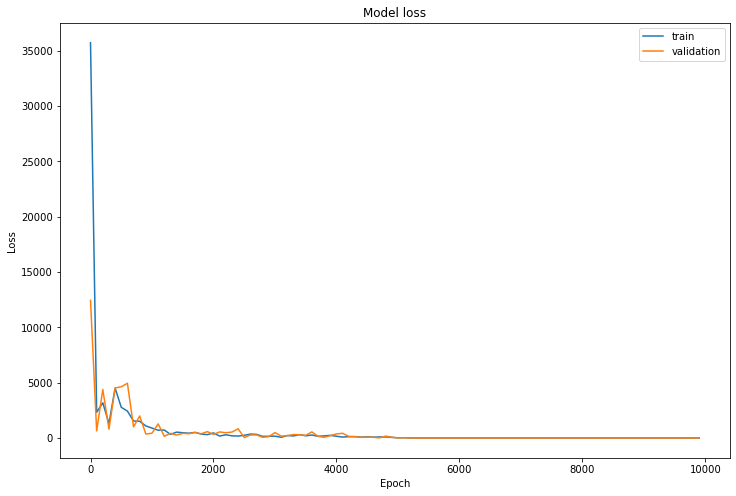

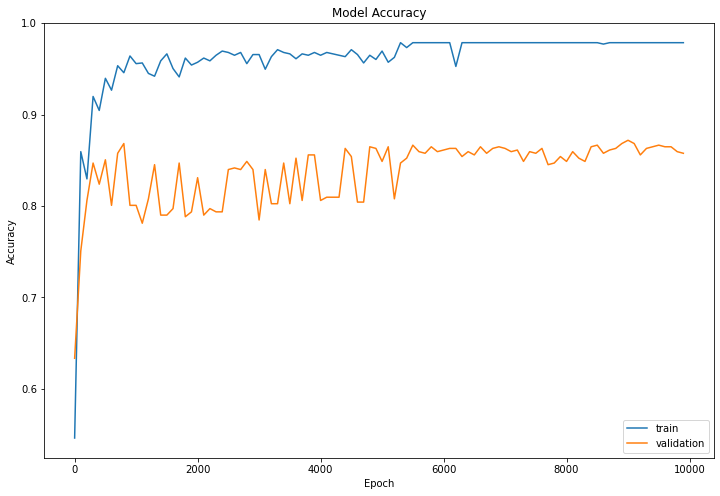

In [84]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']].iloc[::100, :]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].iloc[::100, :]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')